In [1]:
%run My_function.ipynb

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
print ("Librairies utilisées :")
print ("Pandas :", pd.__version__)
print ("Numpy :", np.__version__)
print ("Seaborn :", sns.__version__)

Librairies utilisées :
Pandas : 1.4.4
Numpy : 1.21.5
Seaborn : 0.11.2


# Introduction

<div class="oc-richContent root-0-2-1" data-videotitle="video" data-current-user-id="328418" data-project-id="862" data-codio-button-label="Accéder au code"><p>&nbsp;</p>

<p style="text-align:center;">Vous travaillez chez La poule qui chante, une entreprise française d’agroalimentaire. Elle souhaite se développer à l'international.</p>
<p><img src="https://user.oc-static.com/upload/2020/11/24/16062164030098_image2.png" alt=""></p>
<p>&nbsp;</p>
<p>L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !</p>
<p>Votre manager, Patrick, vous briefe par un e-mail :</p><br/>
<div class="oc-tableContainer"><table>
<tbody>
<tr>
<td style="text-align:left;"><strong>De</strong> : Patrick<br><strong>À </strong>: Moi<br><strong>Objet</strong> : Lancement mission data international</td>
</tr>
<tr>
<td style="font-size:13px;">
<p>Salut !</p>
<p>Comme on en a déjà brièvement parlé, je te fais ce mail pour te briefer sur la mission d’analyse pour le lancement à l’international.</p>
<p>Ton objectif sera de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter nos poulets. Nous approfondirons ensuite l'étude de marché.&nbsp;</p>
<p>Tu seras en totale autonomie sur ce projet, notamment sur le choix des données à analyser et même du langage à utiliser (R ou Python).&nbsp;</p>
<p>Pars des données de la FAO <em>(Food and Agriculture Organization)</em> que je te mets en pièce jointe pour faire ton analyse. Si tu veux aller plus loin, notamment avec les critères de l’analyse PESTEL, tu peux récupérer et utiliser toutes les données en <em>open data</em> que tu souhaites sur <a href="http://www.fao.org/faostat/fr/#data/">le site de la FAO</a>.</p>
<p>Pour la partie analyse, dans un premier temps j’aimerais que tu testes la classification ascendante hiérarchique, avec un dendrogramme comme visualisation. Ensuite tu pourras utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering. N'hésite pas à prendre le temps d’analyser les centroïdes de tes classes. Tu peux également réaliser une ACP afin de visualiser les résultats de ton analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus...</p>
<p>Voici ce que j’attends de toi :</p>
<ul style="text-align:left;">
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données ;</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées ;</li>
<li>une présentation qui récapitule les points suivants :&nbsp;</li>
<ul>
<li>le contexte du projet de data analyse ;</li>
<li>votre démarche (sans entrer dans les détails mathématiques, mais en vulgarisant les sujets abordés) ;</li>
<li>vos résultats et recommandations.</li>
</ul>
</ul>
<p>&nbsp;</p>
<p>Bon courage !</p>
<p>Patrick</p>
</td>
</tr>
<tr>
<td style="text-align:left;">
<p>Pièce jointe :</p>
<ul>
<li><a href="https://s3-eu-west-1.amazonaws.com/static.oc-static.com/prod/courses/files/parcours-data-analyst/DAN-P9-data.zip">Données New Food Balances (FAO)</a></li>
</ul>
</td>
</tr>
</tbody>
</table></div>
<p>&nbsp;</p>
<p>&nbsp;Vous avez toutes les cartes en main. À vous de jouer !</p>

<p><img src="https://user.oc-static.com/upload/2023/03/15/16788716972812_Banner-Livrables.png" alt="Bannière livrables"></p>

<ol>
<li>un notebook ou fichier R contenant la préparation, le nettoyage et l’analyse exploratoire des données.</li>
<li>un notebook ou fichier R contenant le/les clusterings effectués, et les différentes visualisations associées.</li>
<li>une présentation du travail réalisé (Powerpoint ou équivalent, maximum 20 slides).</li>
</ol>

</div>

In [4]:
# On importe nos données

# Fichier CSV contenant des données sur la disponibilité alimentaire par pays en 2017
df = pd.read_csv("Données/DisponibiliteAlimentaire_2017.csv")

indic_macro = pd.read_csv("Données/Indicateurs_macro.csv")

vie_saine = pd.read_csv("Données/Coût_et_abordabilité_d’une_alimentation_saine.csv")

series_temp = pd.read_csv("Données/Séries_temporelles_annuelles.csv")

prod_poulet = pd.read_csv("Données/production_poulet.csv")

pays_continent = pd.read_excel("Données/pays_continent.xlsx")

In [5]:
df

Code Domaine                      Domaine  Code zone         Zone  \
0               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
...             ...                          ...        ...          ...   
176595          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176596          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176597          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176598          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176599          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   

        Code Élément                                            Élément  \
0               5511                                         Production   
1               5611                            Importations - Quantité   
2               5072                                 Variation de stock   
3               5911                            Exportations - Quantité   
4               5301                           Disponibilité intérieure   
...              ...                                                ...   
176595          5142                                         Nourriture   
176596           645  Disponibilité alimentaire en quantité (kg/pers...   
176597           664     Disponibilité alimentaire (Kcal/personne/jour)   
176598           674  Disponibilité de protéines en quantité (g/pers...   
176599           684  Disponibilité de matière grasse en quantité (g...   

        Code Produit          Produit  Code année  Année               Unité  \
0               2511  Blé et produits        2017   2017  Milliers de tonnes   
1               2511  Blé et produits        2017   2017  Milliers de tonnes   
2               2511  Blé et produits        2017   2017  Milliers de tonnes   
3               2511  Blé et produits        2017   2017  Milliers de tonnes   
4               2511  Blé et produits        2017   2017  Milliers de tonnes   
...              ...              ...         ...    ...                 ...   
176595          2899     Miscellanees        2017   2017  Milliers de tonnes   
176596          2899     Miscellanees        2017   2017                  kg   
176597          2899     Miscellanees        2017   2017  Kcal/personne/jour   
176598          2899     Miscellanees        2017   2017     g/personne/jour   
176599          2899     Miscellanees        2017   2017     g/personne/jour   

         Valeur Symbole Description du Symbole  
0       4281.00       S  Données standardisées  
1       2302.00       S  Données standardisées  
2       -119.00       S  Données standardisées  
3          0.00       S  Données standardisées  
4       6701.00       S  Données standardisées  
...         ...     ...                    ...  
176595    19.00       S  Données standardisées  
176596     1.33      Fc        Donnée calculée  
176597     1.00      Fc        Donnée calculée  
176598     0.04      Fc        Donnée calculée  
176599     0.02      Fc        Donnée calculée  

[176600 rows x 14 columns]

Pour le premier fichier, on souhaite avoir une ligne par pays avec les informations nécessaire à l'analyse. 
Pour ce faire, nous commençons par réaliser un pivot de la colonne "Element" et par "Produit" en filtrant sur la colonne "Année". Ces données seront aggrégé sur la Zone.
Ce qui nous interesse ici ce sont les données concernant les volailles. 

In [6]:
df["Produit"].unique()

array(['Blé et produits', 'Riz et produits', 'Orge et produits',
       'Maïs et produits', 'Seigle et produits', 'Avoine',
       'Millet et produits', 'Sorgho et produits', 'Céréales, Autres',
       'Pommes de Terre et produits', 'Ignames', 'Racines nda',
       'Sucre, canne', 'Sucre, betterave', 'Sucre Eq Brut',
       'Edulcorants Autres', 'Miel', 'Haricots', 'Pois',
       'Légumineuses Autres et produits', 'Noix et produits', 'Soja',
       'Arachides Decortiquees', 'Graines de tournesol',
       'Graines Colza/Moutarde', 'Graines de coton', 'Coco (Incl Coprah)',
       'Sésame', 'Olives', 'Plantes Oleiferes, Autre', 'Huile de Soja',
       "Huile d'Arachide", 'Huile de Tournesol',
       'Huile de Colza&Moutarde', 'Huile Graines de Coton',
       'Huile de Palmistes', 'Huile de Palme', 'Huile de Coco',
       'Huile de Sésame', "Huile d'Olive", 'Huile de Son de Riz',
       'Huile de Germe de Maïs', 'Huil Plantes Oleif Autr',
       'Tomates et produits', 'Oignons', 'Légumes, 

In [7]:
# On filtre sur l'année 2017

df = df.loc[df["Année"]==2017]

# Ce qui nous interesse, se sont les information sur la "Viande de Volailles". On filtre
df = df.loc[df["Produit"]=="Viande de Volailles"]
df.head()

Code Domaine                      Domaine  Code zone         Zone  \
651          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
652          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
653          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
654          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
655          FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   

     Code Élément                   Élément  Code Produit  \
651          5511                Production          2734   
652          5611   Importations - Quantité          2734   
653          5072        Variation de stock          2734   
654          5301  Disponibilité intérieure          2734   
655          5123                    Pertes          2734   

                 Produit  Code année  Année               Unité  Valeur  \
651  Viande de Volailles        2017   2017  Milliers de tonnes    28.0   
652  Viande de Volailles        2017   2017  Milliers de tonnes    29.0   
653  Viande de Volailles        2017   2017  Milliers de tonnes     0.0   
654  Viande de Volailles        2017   2017  Milliers de tonnes    57.0   
655  Viande de Volailles        2017   2017  Milliers de tonnes     2.0   

    Symbole Description du Symbole  
651       S  Données standardisées  
652       S  Données standardisées  
653       S  Données standardisées  
654       S  Données standardisées  
655       S  Données standardisées

In [8]:
df.shape

(2061, 14)

Grâce à ces filtres, on passe d'une table avec 176600 lignes à une table de 2061 lignes. 

Pour terminer de mettre en forme notre tableau, on fait un pivot. On souhaite que :
- Notre index soit les pays
- Nos colonnes soient les Eléments
- Nos valeurs soient les valeurs attaché aux éléments.

In [9]:
df = df.pivot(index="Zone",columns="Élément", values="Valeur")

In [10]:
df

Élément                Alimentation pour touristes  Aliments pour animaux  \
Zone                                                                        
Afghanistan                                    NaN                    NaN   
Afrique du Sud                                 0.0                    NaN   
Albanie                                        NaN                    NaN   
Algérie                                        0.0                    NaN   
Allemagne                                      NaN                    NaN   
...                                            ...                    ...   
Émirats arabes unis                            NaN                    NaN   
Équateur                                       0.0                    NaN   
États-Unis d'Amérique                          NaN                    NaN   
Éthiopie                                       0.0                    NaN   
Îles Salomon                                  -0.0                    NaN   

Élément                Autres utilisations (non alimentaire)  \
Zone                                                           
Afghanistan                                              NaN   
Afrique du Sud                                           NaN   
Albanie                                                  NaN   
Algérie                                                  NaN   
Allemagne                                                NaN   
...                                                      ...   
Émirats arabes unis                                      NaN   
Équateur                                                 NaN   
États-Unis d'Amérique                                   89.0   
Éthiopie                                                 NaN   
Îles Salomon                                             NaN   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                       5.0   
Afrique du Sud                                                  143.0   
Albanie                                                          85.0   
Algérie                                                          22.0   
Allemagne                                                        71.0   
...                                                               ...   
Émirats arabes unis                                             147.0   
Équateur                                                         83.0   
États-Unis d'Amérique                                           219.0   
Éthiopie                                                          0.0   
Îles Salomon                                                     18.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Algérie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
Émirats arabes unis                                                43.47        
Équateur                                                           19.31        
États-Unis d'Amérique                                              55.68        
Éthiopie                                                            0.13        
Îles Salomon                                                        4.45        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Zone                                                                     

Désormais nous avons une table avec 172 pays et 17 variables. 

Nous pouvons passer à l'analyse de notre table

# Analyse Exploratoire de nos données

## Table Disponibilité Intérieure

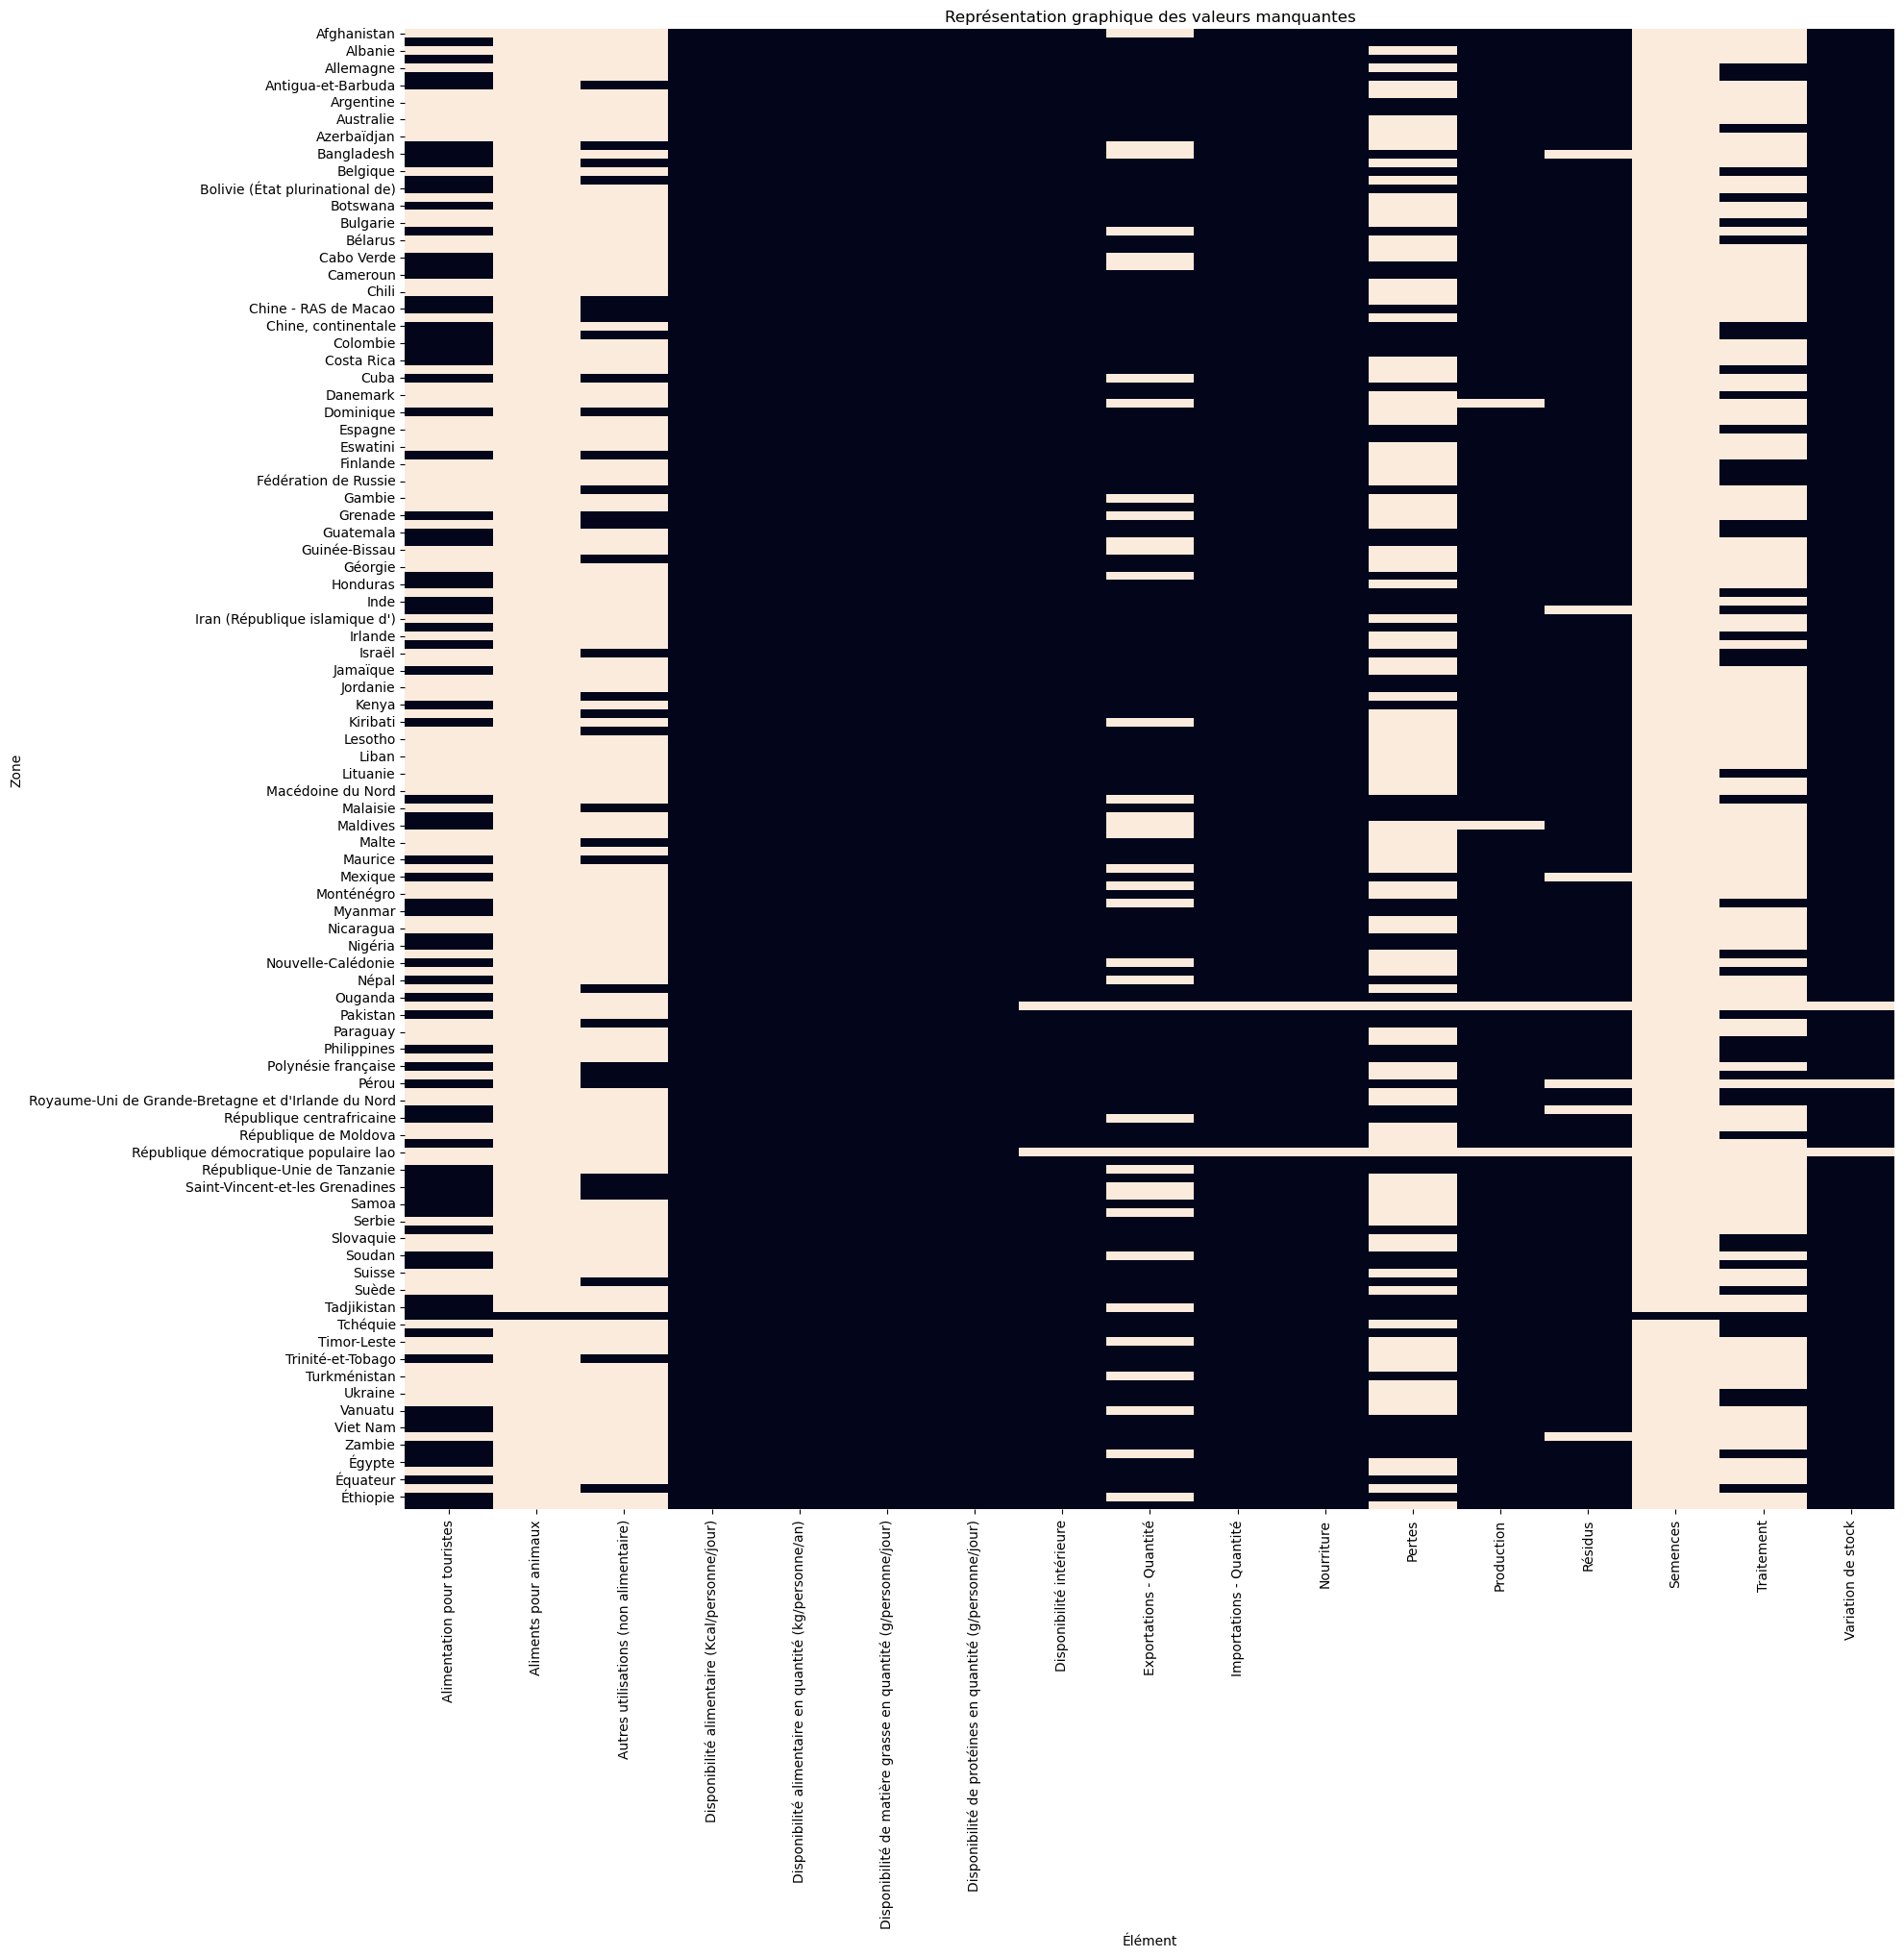

observations  variables  \
Élément                                                                       
Aliments pour animaux                                        172         17   
Semences                                                     172         17   
Autres utilisations (non alimentaire)                        172         17   
Traitement                                                   172         17   
Pertes                                                       172         17   
Alimentation pour touristes                                  172         17   
Exportations - Quantité                                      172         17   
Résidus                                                      172         17   
Production                                                   172         17   
Variation de stock                                           172         17   
Disponibilité intérieure                                     172         17   
Importations - Quantité                                      172         17   
Nourriture                                                   172         17   
Disponibilité de protéines en quantité (g/perso...           172         17   
Disponibilité de matière grasse en quantité (g/...           172         17   
Disponibilité alimentaire en quantité (kg/perso...           172         17   
Disponibilité alimentaire (Kcal/personne/jour)               172         17   

                                                      moyennes  medianes  \
Élément                                                                    
Aliments pour animaux                                 0.000000     0.000   
Semences                                              0.000000     0.000   
Autres utilisations (non alimentaire)                44.117647     2.000   
Traitement                                           26.282609     4.000   
Pertes                                               43.582090     4.000   
Alimentation pour touristes                           0.217949     0.000   
Exportations - Quantité                             132.185185     3.000   
Résidus                                              -2.835366     0.000   
Production                                          725.190476    70.000   
Variation de stock                                   13.668639     0.000   
Disponibilité intérieure                            687.594118   100.000   
Importations - Quantité                              89.529412    16.000   
Nourriture                                          657.047059    99.500   
Disponibilité de protéines en quantité (g/perso...    7.121279     6.505   
Disponibilité de matière grasse en quantité (g/...    4.898430     3.745   
Disponibilité alimentaire en quantité (kg/perso...   20.213372    18.090   
Disponibilité alimentaire (Kcal/personne/jour)       74.558140    64.000   

                                                    ecart_types     min  \
Élément                                                                   
Aliments pour animaux                                       NaN    0.00   
Semences                                                    NaN    0.00   
Autres utilisations (non alimentaire)                142.433135    0.00   
Traitement                                            55.020668    0.00   
Pertes                                               120.818816    0.00   
Alimentation pour touristes                            2.399391  -18.00   
Exportations - Quantité                              513.784440    0.00   
Résidus                                               13.579702 -125.00   
Production                                          2501.457125    0.00   
Variation de stock                                    75.364884 -119.00   
Disponibilité intérieure                            2187.184747    2.00   
Importations - Quantité                              186.669983    0.00   
Nourriture                                          213

In [11]:
# On utilise la fonction my_first_analyse()
my_first_analyse(df).sort_values("%_valeurs_manquantes", ascending=False)

On découvre qu'il y a plusieurs variables dont les valeurs sont manquantes. Je décide de supprimer les variables :
- Aliments pour animaux
- Semences
- Autres utilisations (non alimentaire)
- Traitement

On supprime également des colonnes qui ne nous seront pas utile dans notre analyse:
- Disponibilité alimentaire (Kcal/personne/jour)
- Disponibilité alimentaire en quantité (kg/personne/an)
- Disponibilité de matière grasse en quantité (g/personne/jour)
- Disponibilité de protéines en quantité (g/personne/jour)

In [12]:
# On supprime les colonnes souhaitées
df = df.drop(["Aliments pour animaux","Semences","Autres utilisations (non alimentaire)","Traitement","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Disponibilité de matière grasse en quantité (g/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)"], axis=1)
df

Élément                Alimentation pour touristes  Disponibilité intérieure  \
Zone                                                                           
Afghanistan                                    NaN                      57.0   
Afrique du Sud                                 0.0                    2118.0   
Albanie                                        NaN                      47.0   
Algérie                                        0.0                     277.0   
Allemagne                                      NaN                    1739.0   
...                                            ...                       ...   
Émirats arabes unis                            NaN                     412.0   
Équateur                                       0.0                     341.0   
États-Unis d'Amérique                          NaN                   18266.0   
Éthiopie                                       0.0                      14.0   
Îles Salomon                                  -0.0                       3.0   

Élément                Exportations - Quantité  Importations - Quantité  \
Zone                                                                      
Afghanistan                                NaN                     29.0   
Afrique du Sud                            63.0                    514.0   
Albanie                                    0.0                     38.0   
Algérie                                    0.0                      2.0   
Allemagne                                646.0                    842.0   
...                                        ...                      ...   
Émirats arabes unis                       94.0                    433.0   
Équateur                                   0.0                      0.0   
États-Unis d'Amérique                   3692.0                    123.0   
Éthiopie                                   NaN                      1.0   
Îles Salomon                               0.0                      6.0   

Élément                Nourriture  Pertes  Production  Résidus  \
Zone                                                             
Afghanistan                  55.0     2.0        28.0      0.0   
Afrique du Sud             2035.0    83.0      1667.0      0.0   
Albanie                      47.0     NaN        13.0      0.0   
Algérie                     264.0    13.0       275.0      0.0   
Allemagne                  1609.0     NaN      1514.0    -38.0   
...                           ...     ...         ...      ...   
Émirats arabes unis         412.0     NaN        48.0     -0.0   
Équateur                    324.0    17.0       340.0      0.0   
États-Unis d'Amérique     18100.0     NaN     21914.0     -0.0   
Éthiopie                     14.0     1.0        14.0      0.0   
Îles Salomon                  3.0     NaN         0.0      0.0   

Élément                Variation de stock  
Zone                                       
Afghanistan                           0.0  
Afrique du Sud                       -0.0  
Albanie                               4.0  
Algérie                               0.0  
Allemagne                           -29.0  
...                                   ...  
Émirats arabes unis                 -26.0  
Équateur                             -1.0  
États-Unis d'Amérique                80.0  
Éthiopie                              0.0  
Îles Salomon                          3.0  

[172 rows x 9 columns]

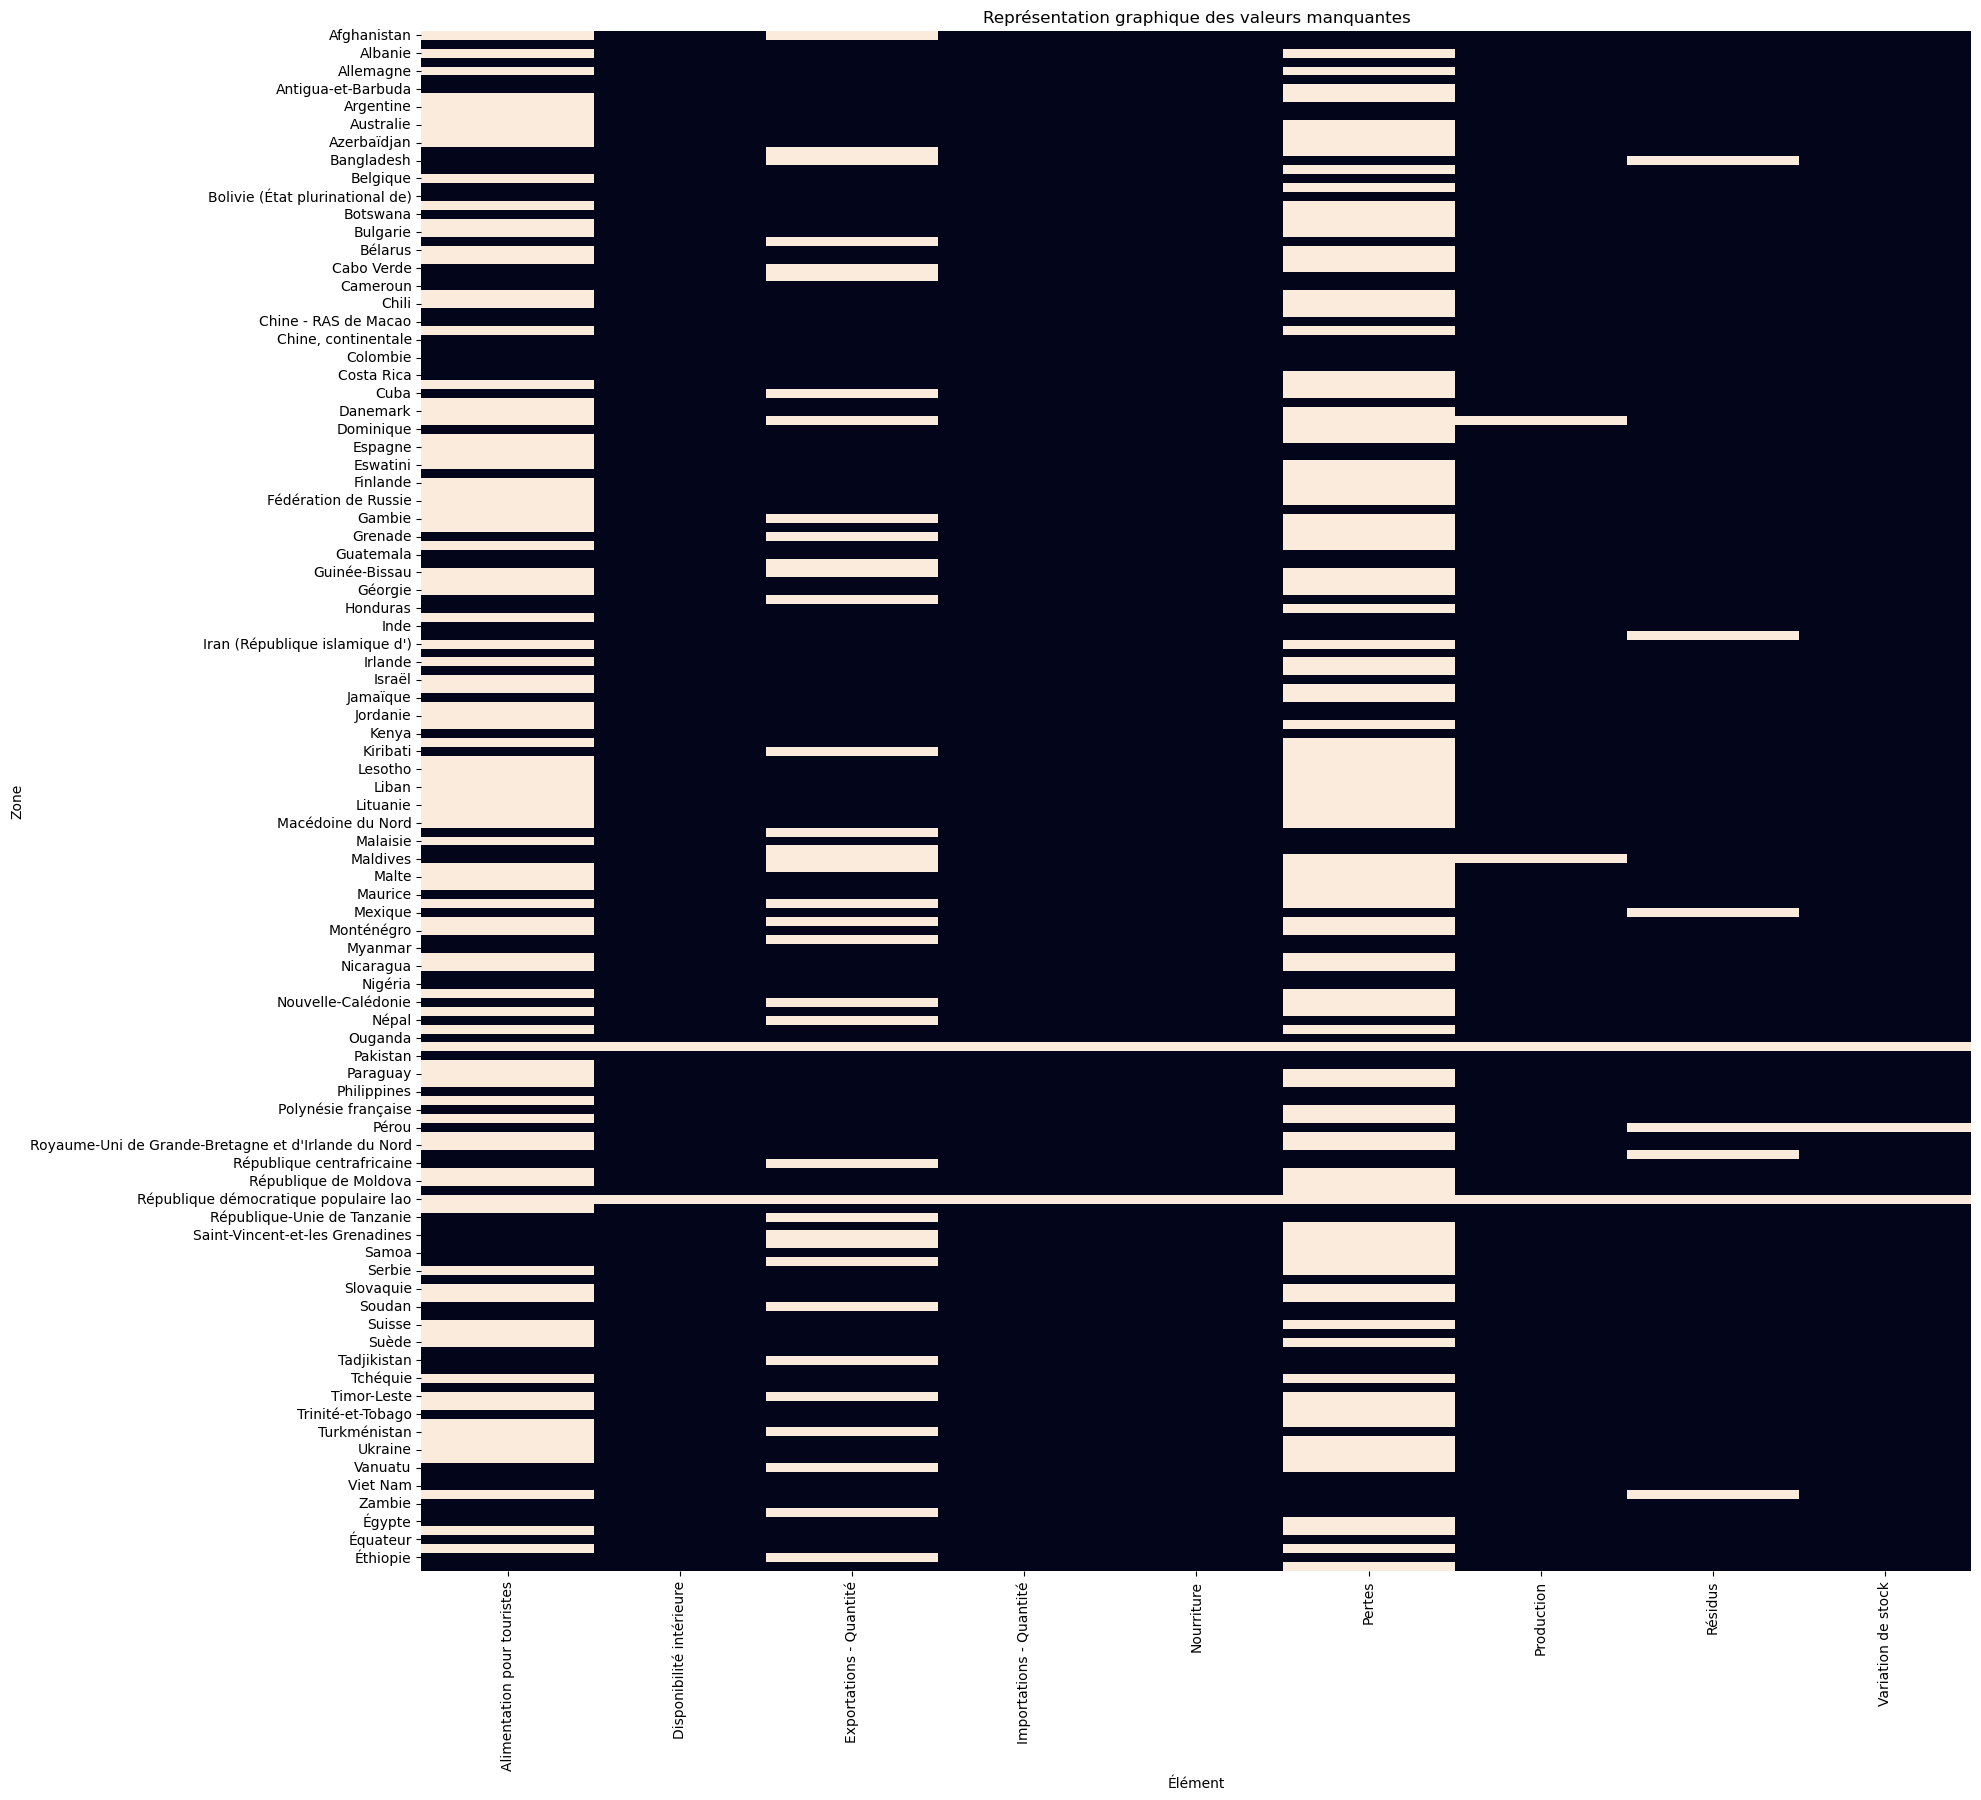

observations  variables    moyennes  medianes  \
Élément                                                                      
Pertes                                172          9   43.582090       4.0   
Alimentation pour touristes           172          9    0.217949       0.0   
Exportations - Quantité               172          9  132.185185       3.0   
Résidus                               172          9   -2.835366       0.0   
Production                            172          9  725.190476      70.0   
Variation de stock                    172          9   13.668639       0.0   
Disponibilité intérieure              172          9  687.594118     100.0   
Importations - Quantité               172          9   89.529412      16.0   
Nourriture                            172          9  657.047059      99.5   

                             ecart_types    min      max  \
Élément                                                    
Pertes                        120.818816    0.0    695.0   
Alimentation pour touristes     2.399391  -18.0      5.0   
Exportations - Quantité       513.784440    0.0   4223.0   
Résidus                        13.579702 -125.0      0.0   
Production                   2501.457125    0.0  21914.0   
Variation de stock             75.364884 -119.0    859.0   
Disponibilité intérieure     2187.184747    2.0  18266.0   
Importations - Quantité       186.669983    0.0   1069.0   
Nourriture                   2136.545796    2.0  18100.0   

                             nb_valeurs_manquantes  %_valeurs_manquantes  
Élément                                                                   
Pertes                                         105                 61.05  
Alimentation pour touristes                     94                 54.65  
Exportations - Quantité                         37                 21.51  
Résidus                                          8                  4.65  
Production                                       4                  2.33  
Variation de stock                               3                  1.74  
Disponibilité intérieure                         2                  1.16  
Importations - Quantité                          2                  1.16  
Nourriture                                       2                  1.16

In [13]:
my_first_analyse(df).sort_values("%_valeurs_manquantes", ascending=False)

On constate graphiquement qu'il y a deux pays qui semblent ne pas avoir beaucoup de données. Nous allons vérifier. 

In [14]:
df.loc[df["Disponibilité intérieure"].isna()]

Élément                                Alimentation pour touristes  \
Zone                                                                 
Ouzbékistan                                                    NaN   
République démocratique populaire lao                          NaN   

Élément                                Disponibilité intérieure  \
Zone                                                              
Ouzbékistan                                                 NaN   
République démocratique populaire lao                       NaN   

Élément                                Exportations - Quantité  \
Zone                                                             
Ouzbékistan                                                NaN   
République démocratique populaire lao                      NaN   

Élément                                Importations - Quantité  Nourriture  \
Zone                                                                         
Ouzbékistan                                                NaN         NaN   
République démocratique populaire lao                      NaN         NaN   

Élément                                Pertes  Production  Résidus  \
Zone                                                                 
Ouzbékistan                               NaN         NaN      NaN   
République démocratique populaire lao     NaN         NaN      NaN   

Élément                                Variation de stock  
Zone                                                       
Ouzbékistan                                           NaN  
République démocratique populaire lao                 NaN

Au vue du peu de données que nous avons, je décide de supprimer ces deux pays. 

In [15]:
df = df.drop(["Ouzbékistan","République démocratique populaire lao"], axis=0)

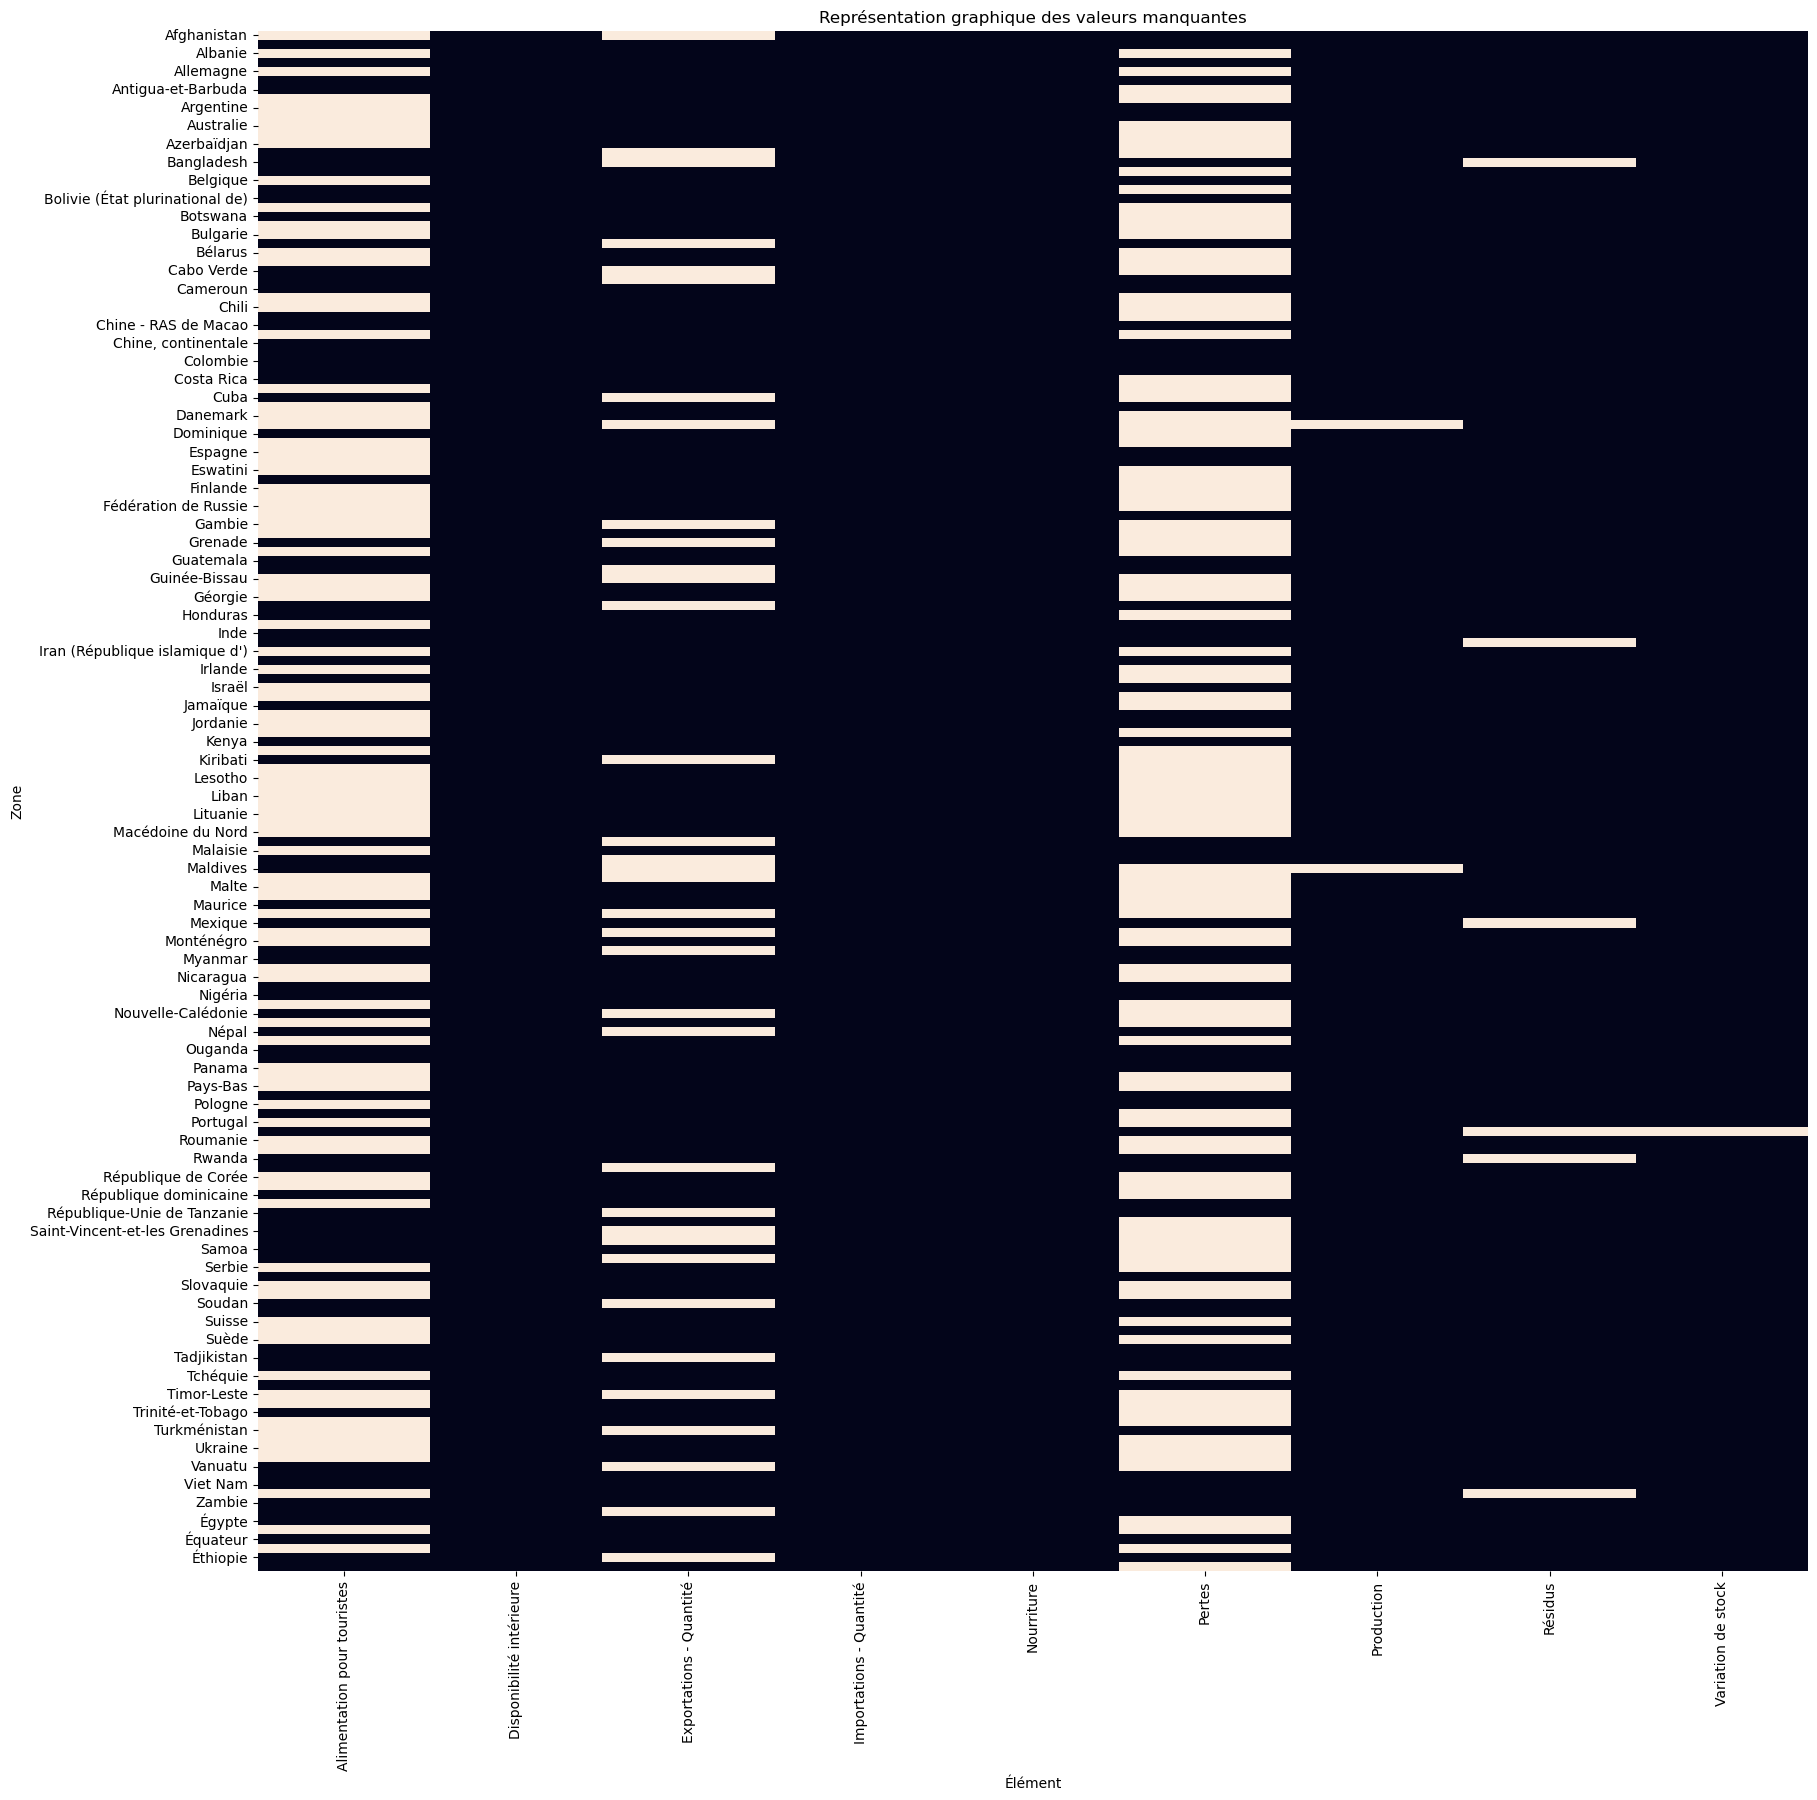

observations  variables    moyennes  medianes  \
Élément                                                                      
Alimentation pour touristes           170          9    0.217949       0.0   
Disponibilité intérieure              170          9  687.594118     100.0   
Exportations - Quantité               170          9  132.185185       3.0   
Importations - Quantité               170          9   89.529412      16.0   
Nourriture                            170          9  657.047059      99.5   
Pertes                                170          9   43.582090       4.0   
Production                            170          9  725.190476      70.0   
Résidus                               170          9   -2.835366       0.0   
Variation de stock                    170          9   13.668639       0.0   

                             ecart_types    min      max  \
Élément                                                    
Alimentation pour touristes     2.399391  -18.0      5.0   
Disponibilité intérieure     2187.184747    2.0  18266.0   
Exportations - Quantité       513.784440    0.0   4223.0   
Importations - Quantité       186.669983    0.0   1069.0   
Nourriture                   2136.545796    2.0  18100.0   
Pertes                        120.818816    0.0    695.0   
Production                   2501.457125    0.0  21914.0   
Résidus                        13.579702 -125.0      0.0   
Variation de stock             75.364884 -119.0    859.0   

                             nb_valeurs_manquantes  %_valeurs_manquantes  
Élément                                                                   
Alimentation pour touristes                     92                 54.12  
Disponibilité intérieure                         0                  0.00  
Exportations - Quantité                         35                 20.59  
Importations - Quantité                          0                  0.00  
Nourriture                                       0                  0.00  
Pertes                                         103                 60.59  
Production                                       2                  1.18  
Résidus                                          6                  3.53  
Variation de stock                               1                  0.59

In [16]:
my_first_analyse(df)

On peut désormais s'attaquer aux valeurs manquantes 

In [17]:
df = my_missing_values(df, apply_all=True)

Choisissez une stratégie de traitement pour toutes les colonnes contenant des données manquantes:
 - 'supprimer' : supprime les lignes contenant des données manquantes
 - 'remplacer_par_moyenne' : remplace les données manquantes par la moyenne de la colonne
 - 'remplacer_par_mediane' : remplace les données manquantes par la médiane de la colonne
 - 'valeur_plus_frequente' : remplace les données manquantes par la valeur la plus fréquente de la colonne
 - 'valeur_constante' : remplace les données manquantes par une valeur constante
valeur_constante
Entrez une valeur constante pour remplacer les données manquantes : 0


On vérifie que les données manquantes ont bien été complétée

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_686/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_686/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_686/3125733484.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mini = data.min()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h000

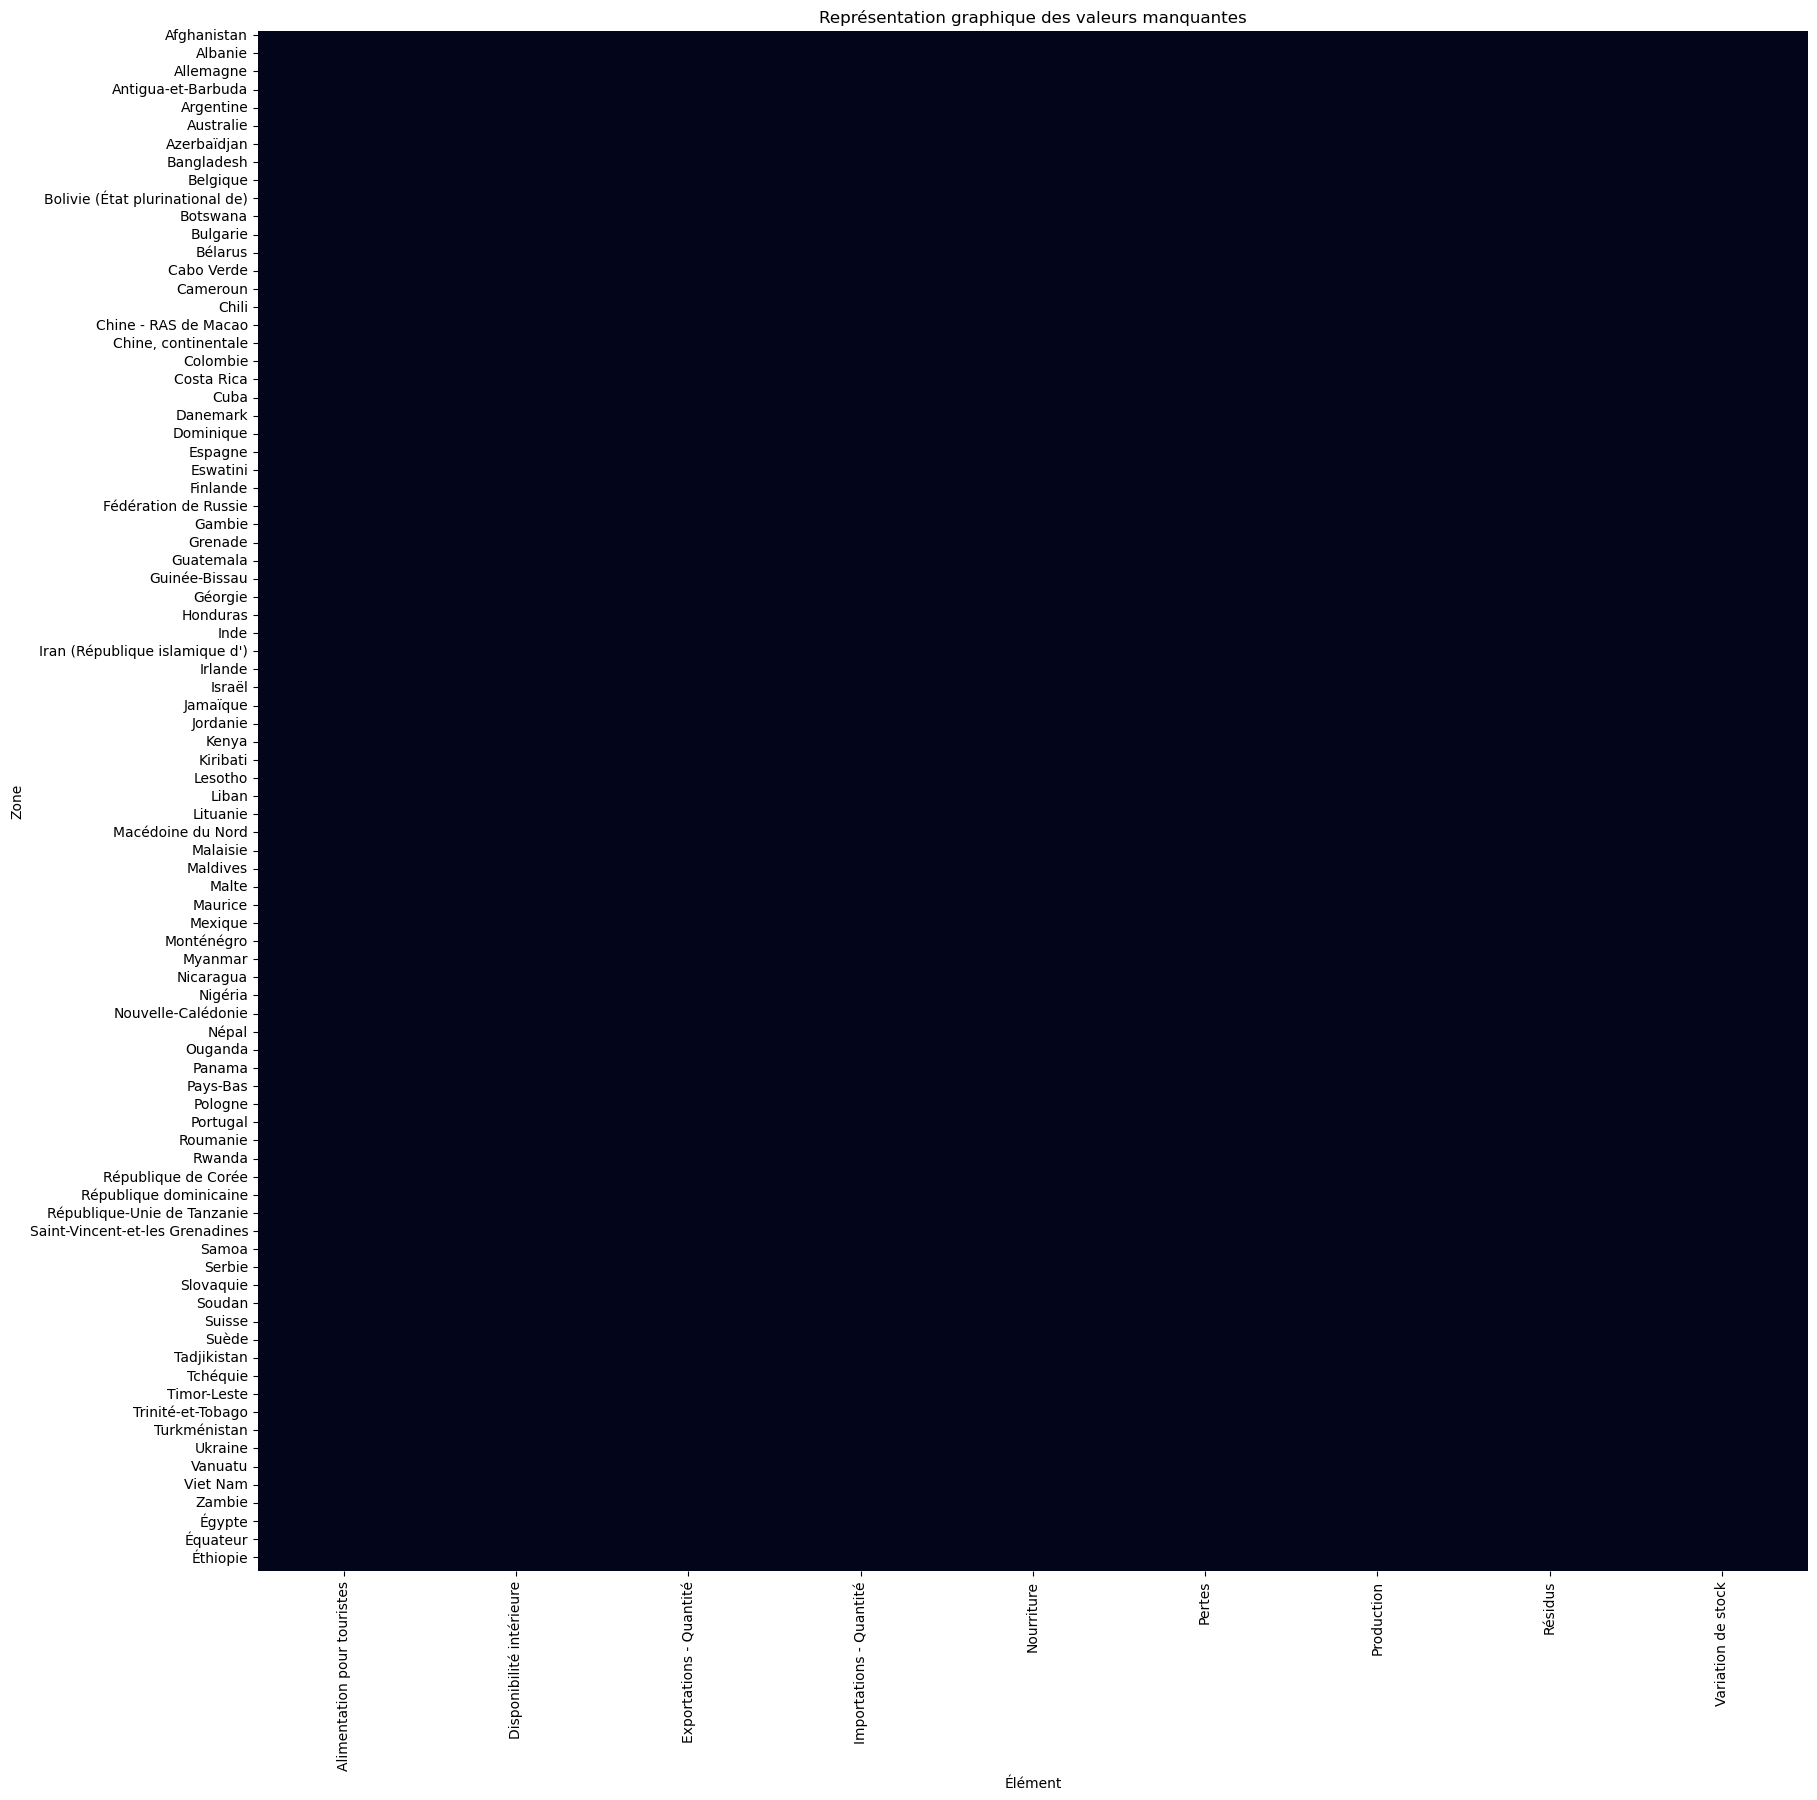

observations  variables    moyennes  medianes  \
Élément                                                                      
Alimentation pour touristes           170          9         NaN       0.0   
Disponibilité intérieure              170          9  687.594118     100.0   
Exportations - Quantité               170          9         NaN       0.0   
Importations - Quantité               170          9   89.529412      16.0   
Nourriture                            170          9  657.047059      99.5   
Pertes                                170          9         NaN       0.0   
Production                            170          9         NaN      68.0   
Résidus                               170          9         NaN       0.0   
Variation de stock                    170          9         NaN       0.0   

                             ecart_types  min      max  nb_valeurs_manquantes  \
Élément                                                                         
Alimentation pour touristes          NaN  NaN      NaN                      0   
Disponibilité intérieure     2187.184747  2.0  18266.0                      0   
Exportations - Quantité              NaN  NaN      NaN                      0   
Importations - Quantité       186.669983  0.0   1069.0                      0   
Nourriture                   2136.545796  2.0  18100.0                      0   
Pertes                               NaN  NaN      NaN                      0   
Production                           NaN  NaN      NaN                      0   
Résidus                              NaN  NaN      NaN                      0   
Variation de stock                   NaN  NaN      NaN                      0   

                             %_valeurs_manquantes  
Élément                                            
Alimentation pour touristes                   0.0  
Disponibilité intérieure                      0.0  
Exportations - Quantité                       0.0  
Importations - Quantité                       0.0  
Nourriture                                    0.0  
Pertes                                        0.0  
Production                                    0.0  
Résidus                                       0.0  
Variation de stock                            0.0

In [18]:
my_first_analyse(df)

Notre table n'a désormais plus de valeurs manquantes. Nous pouvons donc passer à la table Population

On procède de la même façon pour notre table population que pour notre table Disponibilité Intérieure :
- On procéde à un filtre pour l'année 2017
- On réalise un pivot :
    - Index : Zone
    - Colonne : Element
    - Values : Valeur

## Table Indicateur Macro (PIB/PNB)

In [19]:
indic_macro2017 = indic_macro.loc[indic_macro["Année"]==2017]
indic_macro2017 = indic_macro2017[["Zone","Élément","Produit","Année","Unité","Valeur"]]
indic_macro2017

Zone                                     Élément  \
60      Afghanistan                     Valeur en devise locale   
61      Afghanistan                                 Valeur US $   
62      Afghanistan                    Valeur US $ par habitant   
63      Afghanistan   Valeur en devise locale, aux prix de 2015   
64      Afghanistan  Valeur US $ par habitant, aux prix du 2015   
...             ...                                         ...   
121299     Zimbabwe                                 Valeur US $   
121300     Zimbabwe                    Valeur US $ par habitant   
121301     Zimbabwe        Croissance annuelle en devise locale   
121302     Zimbabwe                     Croissance annuelle US$   
121303     Zimbabwe        Croissance annuelle US$ par habitant   

                       Produit  Année     Unité        Valeur  
60      Produit Intérieur Brut   2017  millions  1.285460e+06  
61      Produit Intérieur Brut   2017  millions  1.889635e+04  
62      Produit Intérieur Brut   2017       US$  5.206164e+02  
63      Produit Intérieur Brut   2017  millions  1.192655e+06  
64      Produit Intérieur Brut   2017       US$  5.370000e+02  
...                        ...    ...       ...           ...  
121299    Revenu national brut   2017  millions  2.007960e+04  
121300    Revenu national brut   2017       US$  1.410421e+03  
121301    Revenu national brut   2017         %  6.960250e+00  
121302    Revenu national brut   2017         %  6.960250e+00  
121303    Revenu national brut   2017         %  5.410578e+00  

[13711 rows x 6 columns]

In [20]:
indic_macro2017 = indic_macro2017.loc[(indic_macro2017["Élément"]=="Valeur US $") | (indic_macro2017["Élément"]=="Valeur US $ par habitant")]
indic_macro2017 = indic_macro2017.loc[(indic_macro2017["Produit"]=="Produit Intérieur Brut") | (indic_macro2017["Produit"]=="Revenu national brut")]
indic_macro2017

Zone                   Élément                 Produit  \
61         Afghanistan               Valeur US $  Produit Intérieur Brut   
62         Afghanistan  Valeur US $ par habitant  Produit Intérieur Brut   
481        Afghanistan               Valeur US $    Revenu national brut   
482        Afghanistan  Valeur US $ par habitant    Revenu national brut   
565     Afrique du Sud               Valeur US $  Produit Intérieur Brut   
...                ...                       ...                     ...   
120616          Zambie  Valeur US $ par habitant    Revenu national brut   
120811        Zimbabwe               Valeur US $  Produit Intérieur Brut   
120812        Zimbabwe  Valeur US $ par habitant  Produit Intérieur Brut   
121299        Zimbabwe               Valeur US $    Revenu national brut   
121300        Zimbabwe  Valeur US $ par habitant    Revenu national brut   

        Année     Unité         Valeur  
61       2017  millions   18896.352021  
62       2017       US$     520.616409  
481      2017  millions   19145.017021  
482      2017       US$     527.467418  
565      2017  millions  349006.689642  
...       ...       ...            ...  
120616   2017       US$    1486.687747  
120811   2017  millions   22040.902301  
120812   2017       US$    1548.186368  
121299   2017  millions   20079.596788  
121300   2017       US$    1410.421297  

[844 rows x 6 columns]

In [21]:
indic_macro2017 = indic_macro2017.pivot(index="Zone", columns=["Élément","Produit","Unité"], values="Valeur")

In [22]:
indic_macro2017

Élément                              Valeur US $ Valeur US $ par habitant  \
Produit                   Produit Intérieur Brut   Produit Intérieur Brut   
Unité                                   millions                      US$   
Zone                                                                        
Afghanistan                         1.889635e+04               520.616409   
Afrique du Sud                      3.490067e+05              6121.876572   
Albanie                             1.301973e+04              4514.204908   
Algérie                             1.700970e+05              4109.696001   
Allemagne                           3.690849e+06             44651.829102   
...                                          ...                      ...   
Îles Cook                           3.456090e+02             19741.188968   
Îles Marshall                       2.130616e+02              3669.806573   
Îles Salomon                        1.483799e+03              2332.873855   
Îles Turques-et-Caïques             1.022365e+03             27545.870942   
Îles Vierges britanniques           1.306770e+03             44181.965717   

Élément                            Valeur US $ Valeur US $ par habitant  
Produit                   Revenu national brut     Revenu national brut  
Unité                                 millions                      US$  
Zone                                                                     
Afghanistan                       1.914502e+04               527.467418  
Afrique du Sud                    3.385397e+05              5938.277421  
Albanie                           1.305152e+04              4525.226241  
Algérie                           1.679101e+05              4056.859597  
Allemagne                         3.778789e+06             45715.726076  
...                                        ...                      ...  
Îles Cook                         3.456090e+02             19741.188968  
Îles Marshall                     2.739382e+02              4718.353887  
Îles Salomon                      1.454103e+03              2286.184603  
Îles Turques-et-Caïques           1.118672e+03             30140.691796  
Îles Vierges britanniques         1.192275e+03             40310.872705  

[211 rows x 4 columns]

In [23]:
indic_macro2017 = indic_macro2017.droplevel(["Unité","Élément"], axis=1)

In [24]:
indic_macro2017

Produit                    Produit Intérieur Brut  Produit Intérieur Brut  \
Zone                                                                        
Afghanistan                          1.889635e+04              520.616409   
Afrique du Sud                       3.490067e+05             6121.876572   
Albanie                              1.301973e+04             4514.204908   
Algérie                              1.700970e+05             4109.696001   
Allemagne                            3.690849e+06            44651.829102   
...                                           ...                     ...   
Îles Cook                            3.456090e+02            19741.188968   
Îles Marshall                        2.130616e+02             3669.806573   
Îles Salomon                         1.483799e+03             2332.873855   
Îles Turques-et-Caïques              1.022365e+03            27545.870942   
Îles Vierges britanniques            1.306770e+03            44181.965717   

Produit                    Revenu national brut  Revenu national brut  
Zone                                                                   
Afghanistan                        1.914502e+04            527.467418  
Afrique du Sud                     3.385397e+05           5938.277421  
Albanie                            1.305152e+04           4525.226241  
Algérie                            1.679101e+05           4056.859597  
Allemagne                          3.778789e+06          45715.726076  
...                                         ...                   ...  
Îles Cook                          3.456090e+02          19741.188968  
Îles Marshall                      2.739382e+02           4718.353887  
Îles Salomon                       1.454103e+03           2286.184603  
Îles Turques-et-Caïques            1.118672e+03          30140.691796  
Îles Vierges britanniques          1.192275e+03          40310.872705  

[211 rows x 4 columns]

In [25]:
indic_macro2017.columns.values[0]='Valeur US $ du PIB (en millions)'
indic_macro2017.columns.values[1]='Valeur US $ par habitant du PIB (en US dol)'
indic_macro2017.columns.values[2]='Valeur US $ du RNB (en millions)'
indic_macro2017.columns.values[3]='Valeur US $ par habitant du RNB (en US dol)'
indic_macro2017

Produit                    Valeur US $ du PIB (en millions)  \
Zone                                                          
Afghanistan                                    1.889635e+04   
Afrique du Sud                                 3.490067e+05   
Albanie                                        1.301973e+04   
Algérie                                        1.700970e+05   
Allemagne                                      3.690849e+06   
...                                                     ...   
Îles Cook                                      3.456090e+02   
Îles Marshall                                  2.130616e+02   
Îles Salomon                                   1.483799e+03   
Îles Turques-et-Caïques                        1.022365e+03   
Îles Vierges britanniques                      1.306770e+03   

Produit                    Valeur US $ par habitant du PIB (en US dol)  \
Zone                                                                     
Afghanistan                                                 520.616409   
Afrique du Sud                                             6121.876572   
Albanie                                                    4514.204908   
Algérie                                                    4109.696001   
Allemagne                                                 44651.829102   
...                                                                ...   
Îles Cook                                                 19741.188968   
Îles Marshall                                              3669.806573   
Îles Salomon                                               2332.873855   
Îles Turques-et-Caïques                                   27545.870942   
Îles Vierges britanniques                                 44181.965717   

Produit                    Valeur US $ du RNB (en millions)  \
Zone                                                          
Afghanistan                                    1.914502e+04   
Afrique du Sud                                 3.385397e+05   
Albanie                                        1.305152e+04   
Algérie                                        1.679101e+05   
Allemagne                                      3.778789e+06   
...                                                     ...   
Îles Cook                                      3.456090e+02   
Îles Marshall                                  2.739382e+02   
Îles Salomon                                   1.454103e+03   
Îles Turques-et-Caïques                        1.118672e+03   
Îles Vierges britanniques                      1.192275e+03   

Produit                    Valeur US $ par habitant du RNB (en US dol)  
Zone                                                                    
Afghanistan                                                 527.467418  
Afrique du Sud                                             5938.277421  
Albanie                                                    4525.226241  
Algérie                                                    4056.859597  
Allemagne                                                 45715.726076  
...                                                                ...  
Îles Cook                                                 19741.188968  
Îles Marshall                                              4718.353887  
Îles Salomon                                               2286.184603  
Îles Turques-et-Caïques                                   30140.691796  
Îles Vierges britanniques                                 40310.872705  

[211 rows x 4 columns]

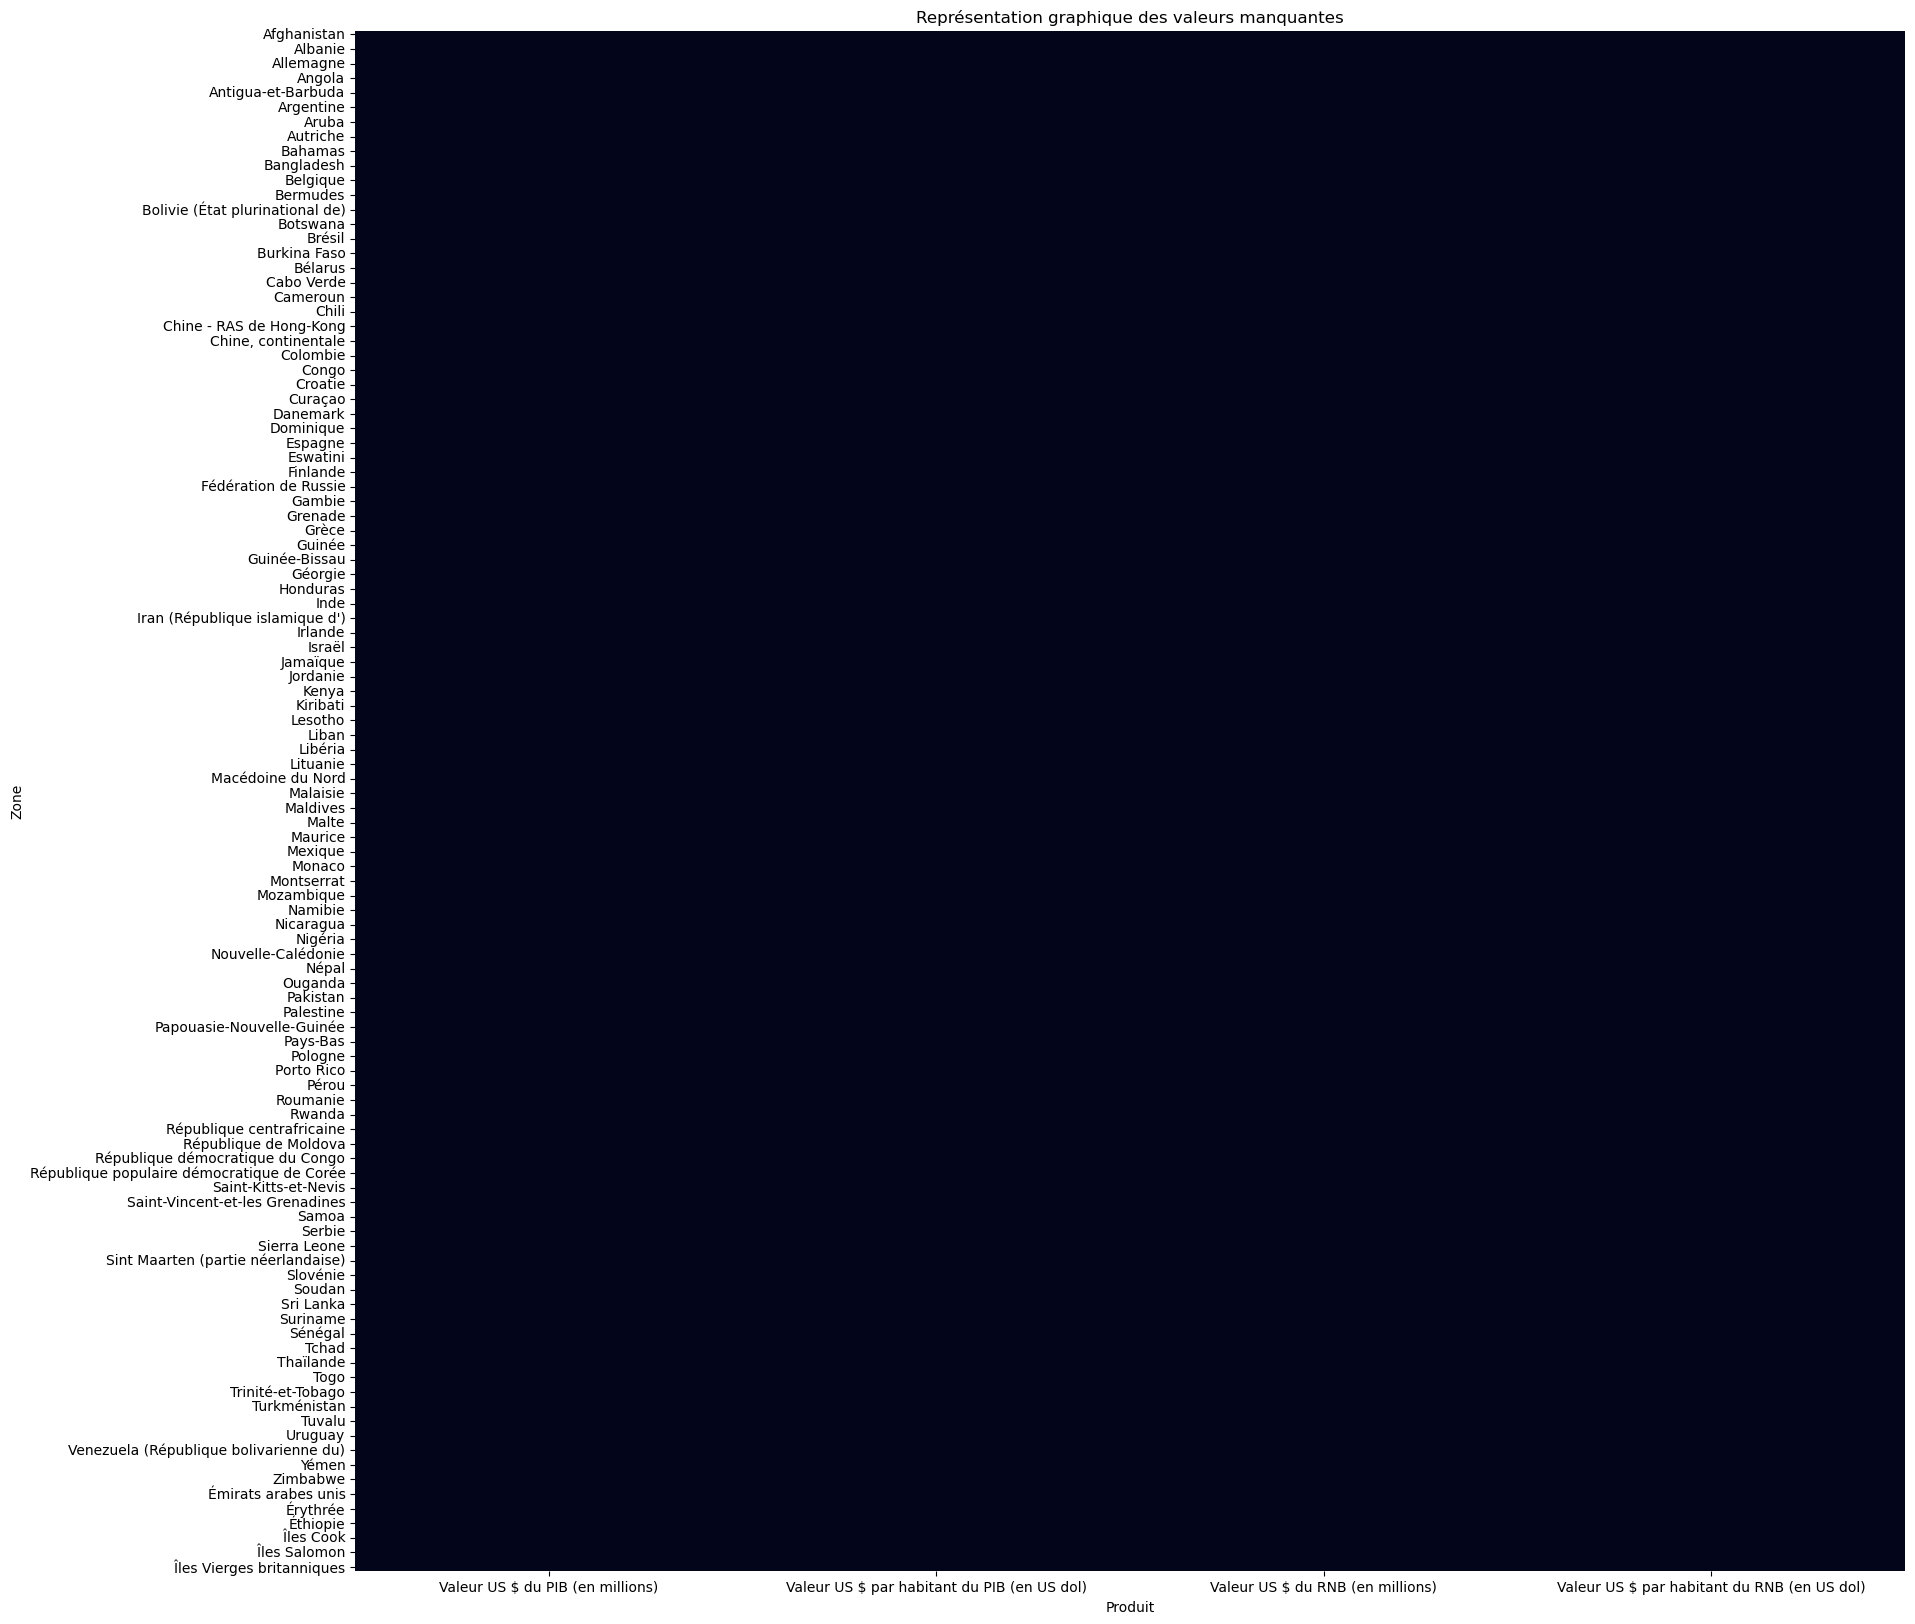

observations  variables  \
Produit                                                                
Valeur US $ du PIB (en millions)                      211          4   
Valeur US $ par habitant du PIB (en US dol)           211          4   
Valeur US $ du RNB (en millions)                      211          4   
Valeur US $ par habitant du RNB (en US dol)           211          4   

                                                  moyennes      medianes  \
Produit                                                                    
Valeur US $ du PIB (en millions)             442348.585027  24979.190000   
Valeur US $ par habitant du PIB (en US dol)   16934.384856   6376.707362   
Valeur US $ du RNB (en millions)             442482.191765  24848.957647   
Valeur US $ par habitant du RNB (en US dol)   16363.528992   6313.717989   

                                              ecart_types         min  \
Produit                                                                 
Valeur US $ du PIB (en millions)             1.875628e+06   45.276606   
Valeur US $ par habitant du PIB (en US dol)  2.549498e+04  111.048078   
Valeur US $ du RNB (en millions)             1.897097e+06   60.473788   
Valeur US $ par habitant du RNB (en US dol)  2.461917e+04  110.246133   

                                                      max  \
Produit                                                     
Valeur US $ du PIB (en millions)             1.947962e+07   
Valeur US $ par habitant du PIB (en US dol)  1.712781e+05   
Valeur US $ du RNB (en millions)             1.989307e+07   
Valeur US $ par habitant du RNB (en US dol)  1.785373e+05   

                                             nb_valeurs_manquantes  \
Produit                                                              
Valeur US $ du PIB (en millions)                                 0   
Valeur US $ par habitant du PIB (en US dol)                      0   
Valeur US $ du RNB (en millions)                                 0   
Valeur US $ par habitant du RNB (en US dol)                      0   

                                             %_valeurs_manquantes  
Produit                                                            
Valeur US $ du PIB (en millions)                              0.0  
Valeur US $ par habitant du PIB (en US dol)                   0.0  
Valeur US $ du RNB (en millions)                              0.0  
Valeur US $ par habitant du RNB (en US dol)                   0.0

In [26]:
my_first_analyse(indic_macro2017)

In [27]:
indic_macro2017

Produit                    Valeur US $ du PIB (en millions)  \
Zone                                                          
Afghanistan                                    1.889635e+04   
Afrique du Sud                                 3.490067e+05   
Albanie                                        1.301973e+04   
Algérie                                        1.700970e+05   
Allemagne                                      3.690849e+06   
...                                                     ...   
Îles Cook                                      3.456090e+02   
Îles Marshall                                  2.130616e+02   
Îles Salomon                                   1.483799e+03   
Îles Turques-et-Caïques                        1.022365e+03   
Îles Vierges britanniques                      1.306770e+03   

Produit                    Valeur US $ par habitant du PIB (en US dol)  \
Zone                                                                     
Afghanistan                                                 520.616409   
Afrique du Sud                                             6121.876572   
Albanie                                                    4514.204908   
Algérie                                                    4109.696001   
Allemagne                                                 44651.829102   
...                                                                ...   
Îles Cook                                                 19741.188968   
Îles Marshall                                              3669.806573   
Îles Salomon                                               2332.873855   
Îles Turques-et-Caïques                                   27545.870942   
Îles Vierges britanniques                                 44181.965717   

Produit                    Valeur US $ du RNB (en millions)  \
Zone                                                          
Afghanistan                                    1.914502e+04   
Afrique du Sud                                 3.385397e+05   
Albanie                                        1.305152e+04   
Algérie                                        1.679101e+05   
Allemagne                                      3.778789e+06   
...                                                     ...   
Îles Cook                                      3.456090e+02   
Îles Marshall                                  2.739382e+02   
Îles Salomon                                   1.454103e+03   
Îles Turques-et-Caïques                        1.118672e+03   
Îles Vierges britanniques                      1.192275e+03   

Produit                    Valeur US $ par habitant du RNB (en US dol)  
Zone                                                                    
Afghanistan                                                 527.467418  
Afrique du Sud                                             5938.277421  
Albanie                                                    4525.226241  
Algérie                                                    4056.859597  
Allemagne                                                 45715.726076  
...                                                                ...  
Îles Cook                                                 19741.188968  
Îles Marshall                                              4718.353887  
Îles Salomon                                               2286.184603  
Îles Turques-et-Caïques                                   30140.691796  
Îles Vierges britanniques                                 40310.872705  

[211 rows x 4 columns]

In [28]:
indic_macro2017.reset_index()

Produit                       Zone  Valeur US $ du PIB (en millions)  \
0                      Afghanistan                      1.889635e+04   
1                   Afrique du Sud                      3.490067e+05   
2                          Albanie                      1.301973e+04   
3                          Algérie                      1.700970e+05   
4                        Allemagne                      3.690849e+06   
..                             ...                               ...   
206                      Îles Cook                      3.456090e+02   
207                  Îles Marshall                      2.130616e+02   
208                   Îles Salomon                      1.483799e+03   
209        Îles Turques-et-Caïques                      1.022365e+03   
210      Îles Vierges britanniques                      1.306770e+03   

Produit  Valeur US $ par habitant du PIB (en US dol)  \
0                                         520.616409   
1                                        6121.876572   
2                                        4514.204908   
3                                        4109.696001   
4                                       44651.829102   
..                                               ...   
206                                     19741.188968   
207                                      3669.806573   
208                                      2332.873855   
209                                     27545.870942   
210                                     44181.965717   

Produit  Valeur US $ du RNB (en millions)  \
0                            1.914502e+04   
1                            3.385397e+05   
2                            1.305152e+04   
3                            1.679101e+05   
4                            3.778789e+06   
..                                    ...   
206                          3.456090e+02   
207                          2.739382e+02   
208                          1.454103e+03   
209                          1.118672e+03   
210                          1.192275e+03   

Produit  Valeur US $ par habitant du RNB (en US dol)  
0                                         527.467418  
1                                        5938.277421  
2                                        4525.226241  
3                                        4056.859597  
4                                       45715.726076  
..                                               ...  
206                                     19741.188968  
207                                      4718.353887  
208                                      2286.184603  
209                                     30140.691796  
210                                     40310.872705  

[211 rows x 5 columns]

## Table Vie Saine

In [29]:
vie_saine.head()

Code Domaine                                            Domaine  \
0         CAHD  Coût et abordabilité d’une alimentation saine\...   
1         CAHD  Coût et abordabilité d’une alimentation saine\...   
2         CAHD  Coût et abordabilité d’une alimentation saine\...   
3         CAHD  Coût et abordabilité d’une alimentation saine\...   
4         CAHD  Coût et abordabilité d’une alimentation saine\...   

   Code zone (M49)            Zone  Code Élément Élément  Code Produit  \
0              710  Afrique du Sud          6226  Valeur          7004   
1              710  Afrique du Sud          6226  Valeur          7004   
2              710  Afrique du Sud          6226  Valeur          7004   
3              710  Afrique du Sud          6226  Valeur          7004   
4              710  Afrique du Sud          6226  Valeur          7007   

                                             Produit  Code année  Année  \
0  Cost of a healthy diet (PPP dollar per person ...        2017   2017   
1  Cost of a healthy diet (PPP dollar per person ...        2018   2018   
2  Cost of a healthy diet (PPP dollar per person ...        2019   2019   
3  Cost of a healthy diet (PPP dollar per person ...        2020   2020   
4                            Cost of starchy staples        2017   2017   

                           Unité  Valeur Symbole Description du Symbole  
0  PPP dollar per person per day   4.102       E         Valeur estimée  
1  PPP dollar per person per day   4.146       E         Valeur estimée  
2  PPP dollar per person per day   4.198       E         Valeur estimée  
3  PPP dollar per person per day   4.298       E         Valeur estimée  
4  PPP dollar per person per day   0.633       E         Valeur estimée

In [30]:
vie_saine.shape

(3042, 14)

In [31]:
# On filtre sur l'année 2017
vie_saine_2017 = vie_saine.loc[vie_saine["Année"]==2017]
display(vie_saine_2017.head())
print(vie_saine.shape)

Code Domaine                                            Domaine  \
0         CAHD  Coût et abordabilité d’une alimentation saine\...   
4         CAHD  Coût et abordabilité d’une alimentation saine\...   
5         CAHD  Coût et abordabilité d’une alimentation saine\...   
6         CAHD  Coût et abordabilité d’une alimentation saine\...   
7         CAHD  Coût et abordabilité d’une alimentation saine\...   

   Code zone (M49)            Zone  Code Élément Élément  Code Produit  \
0              710  Afrique du Sud          6226  Valeur          7004   
4              710  Afrique du Sud          6226  Valeur          7007   
5              710  Afrique du Sud          6226  Valeur          7008   
6              710  Afrique du Sud          6226  Valeur          7009   
7              710  Afrique du Sud          6226  Valeur          7010   

                                             Produit  Code année  Année  \
0  Cost of a healthy diet (PPP dollar per person ...        2017   2017   
4                            Cost of starchy staples        2017   2017   
5                        Cost of animal source foods        2017   2017   
6                    Cost of legumes, nuts and seeds        2017   2017   
7                                 Cost of vegetables        2017   2017   

                           Unité  Valeur Symbole Description du Symbole  
0  PPP dollar per person per day   4.102       E         Valeur estimée  
4  PPP dollar per person per day   0.633       E         Valeur estimée  
5  PPP dollar per person per day   1.059       E         Valeur estimée  
6  PPP dollar per person per day   0.852       E         Valeur estimée  
7  PPP dollar per person per day   0.702       E         Valeur estimée

(3042, 14)


In [32]:
vie_saine_2017["Domaine"].unique()

array(['Coût et abordabilité d’une alimentation saine\r\n (CoAHD)'],
      dtype=object)

In [33]:
vie_saine_2017["Produit"].unique()

array(['Cost of a healthy diet (PPP dollar per person per day)',
       'Cost of starchy staples', 'Cost of animal source foods',
       'Cost of legumes, nuts and seeds', 'Cost of vegetables',
       'Cost of fruits', 'Cost of oils and fats',
       'Percentage of the population unable to afford a healthy diet (percent)',
       'Number of people unable to afford a healthy diet (million)'],
      dtype=object)

In [34]:
vie_saine_2017["Unité"].unique()

array(['PPP dollar per person per day', '%', 'millions'], dtype=object)

In [35]:
# On selectionne les variables qui nous interessent
vie_saine_2017 = vie_saine_2017[["Zone","Produit","Unité","Valeur"]]
display(vie_saine_2017.head())
print(vie_saine_2017.shape)

Zone                                            Produit  \
0  Afrique du Sud  Cost of a healthy diet (PPP dollar per person ...   
4  Afrique du Sud                            Cost of starchy staples   
5  Afrique du Sud                        Cost of animal source foods   
6  Afrique du Sud                    Cost of legumes, nuts and seeds   
7  Afrique du Sud                                 Cost of vegetables   

                           Unité  Valeur  
0  PPP dollar per person per day   4.102  
4  PPP dollar per person per day   0.633  
5  PPP dollar per person per day   1.059  
6  PPP dollar per person per day   0.852  
7  PPP dollar per person per day   0.702

(1521, 4)


In [36]:
# On pivot notre table
vie_saine_2017 = vie_saine_2017.pivot(index="Zone", columns=["Produit"], values="Valeur")
vie_saine_2017.head()

Produit         Cost of a healthy diet (PPP dollar per person per day)  \
Zone                                                                     
Afrique du Sud                                              4.102        
Albanie                                                     3.952        
Algérie                                                     3.763        
Allemagne                                                   2.786        
Angola                                                      4.327        

Produit         Cost of animal source foods  Cost of fruits  \
Zone                                                          
Afrique du Sud                        1.059           0.727   
Albanie                               1.204           0.911   
Algérie                               0.964           0.979   
Allemagne                             0.666           0.714   
Angola                                1.011           0.717   

Produit         Cost of legumes, nuts and seeds  Cost of oils and fats  \
Zone                                                                     
Afrique du Sud                            0.852                  0.129   
Albanie                                   0.441                  0.089   
Algérie                                   0.493                  0.132   
Allemagne                                 0.301                  0.052   
Angola                                    0.395                  0.166   

Produit         Cost of starchy staples  Cost of vegetables  \
Zone                                                          
Afrique du Sud                    0.633               0.702   
Albanie                           0.599               0.707   
Algérie                           0.496               0.699   
Allemagne                         0.235               0.816   
Angola                            0.839               1.199   

Produit         Number of people unable to afford a healthy diet (million)  \
Zone                                                                         
Afrique du Sud                                               37.2            
Albanie                                                       1.1            
Algérie                                                      14.6            
Allemagne                                                     0.2            
Angola                                                       27.7            

Produit         Percentage of the population unable to afford a healthy diet (percent)  
Zone                                                                                    
Afrique du Sud                                               65.2                       
Albanie                                                      37.8                       
Algérie                                                      35.2                       
Allemagne                                                     0.2                       
Angola                                                       92.9

In [37]:
# On supprime les colonnes qui ne nous interessent pas
vie_saine_2017 = vie_saine_2017.drop(["Number of people unable to afford a healthy diet (million)","Percentage of the population unable to afford a healthy diet (percent)"], axis=1)

In [38]:
vie_saine_2017.rename(columns={
    "Cost of a healthy diet (PPP dollar per person per day)":"Coût d'une alimentation équilibré (PPP dollar par personne par jour)",
    "Cost of animal source foods" : "Coût des aliments d'origine animale",
    "Cost of fruits" : "Coût des fruits",
    "Cost of legumes, nuts and seeds" : "Coût en légumineuses, noix et graines",
    "Cost of oils and fats" : "Coût en huile et graisse",
    "Cost of starchy staples":"Coût des féculents",
    "Cost of vegetables" : "Coût des légumes",
    "Number of people unable to afford a healthy diet (million)" : "Nombre de personnes n'ayant pas les moyens de manger équilibré (en millions)",
    "Percentage of the population unable to afford a healthy diet (percent)" : "Pourcentage de la population n'ayant pas les moyens de manger équilibré (en %)"
}, inplace=True)

In [39]:
vie_saine_2017

Produit                    Coût d'une alimentation équilibré (PPP dollar par personne par jour)  \
Zone                                                                                              
Afrique du Sud                                                         4.102                      
Albanie                                                                3.952                      
Algérie                                                                3.763                      
Allemagne                                                              2.786                      
Angola                                                                 4.327                      
...                                                                      ...                      
États-Unis d'Amérique                                                  3.225                      
Éthiopie                                                               3.108                      
Îles Caïmanes                                                          2.928                      
Îles Turques-et-Caïques                                                2.809                      
Îles Vierges britanniques                                              3.235                      

Produit                    Coût des aliments d'origine animale  \
Zone                                                             
Afrique du Sud                                           1.059   
Albanie                                                  1.204   
Algérie                                                  0.964   
Allemagne                                                0.666   
Angola                                                   1.011   
...                                                        ...   
États-Unis d'Amérique                                    0.557   
Éthiopie                                                 0.882   
Îles Caïmanes                                            0.585   
Îles Turques-et-Caïques                                  0.645   
Îles Vierges britanniques                                0.828   

Produit                    Coût des fruits  \
Zone                                         
Afrique du Sud                       0.727   
Albanie                              0.911   
Algérie                              0.979   
Allemagne                            0.714   
Angola                               0.717   
...                                    ...   
États-Unis d'Amérique                0.610   
Éthiopie                             0.777   
Îles Caïmanes                        0.654   
Îles Turques-et-Caïques              0.556   
Îles Vierges britanniques            0.425   

Produit                    Coût en légumineuses, noix et graines  \
Zone                                                               
Afrique du Sud                                             0.852   
Albanie                                                    0.441   
Algérie                                                    0.493   
Allemagne                                                  0.301   
Angola                                                     0.395   
...                                                          ...   
États-Unis d'Amérique                                      0.285   
Éthiopie                                                   0.271   
Îles Caïmanes                                              0.257   
Îles Turques-et-Caïques                                    0.296   
Îles Vierges britanniques                                  0.237   

Produit                    Coût en huile et graisse  Coût des féculents  \
Zone                                                                      
Afrique du Sud                                0.129               0.633   
Albanie                                       0.089               0.599   
Algérie                                       0.132               0.4

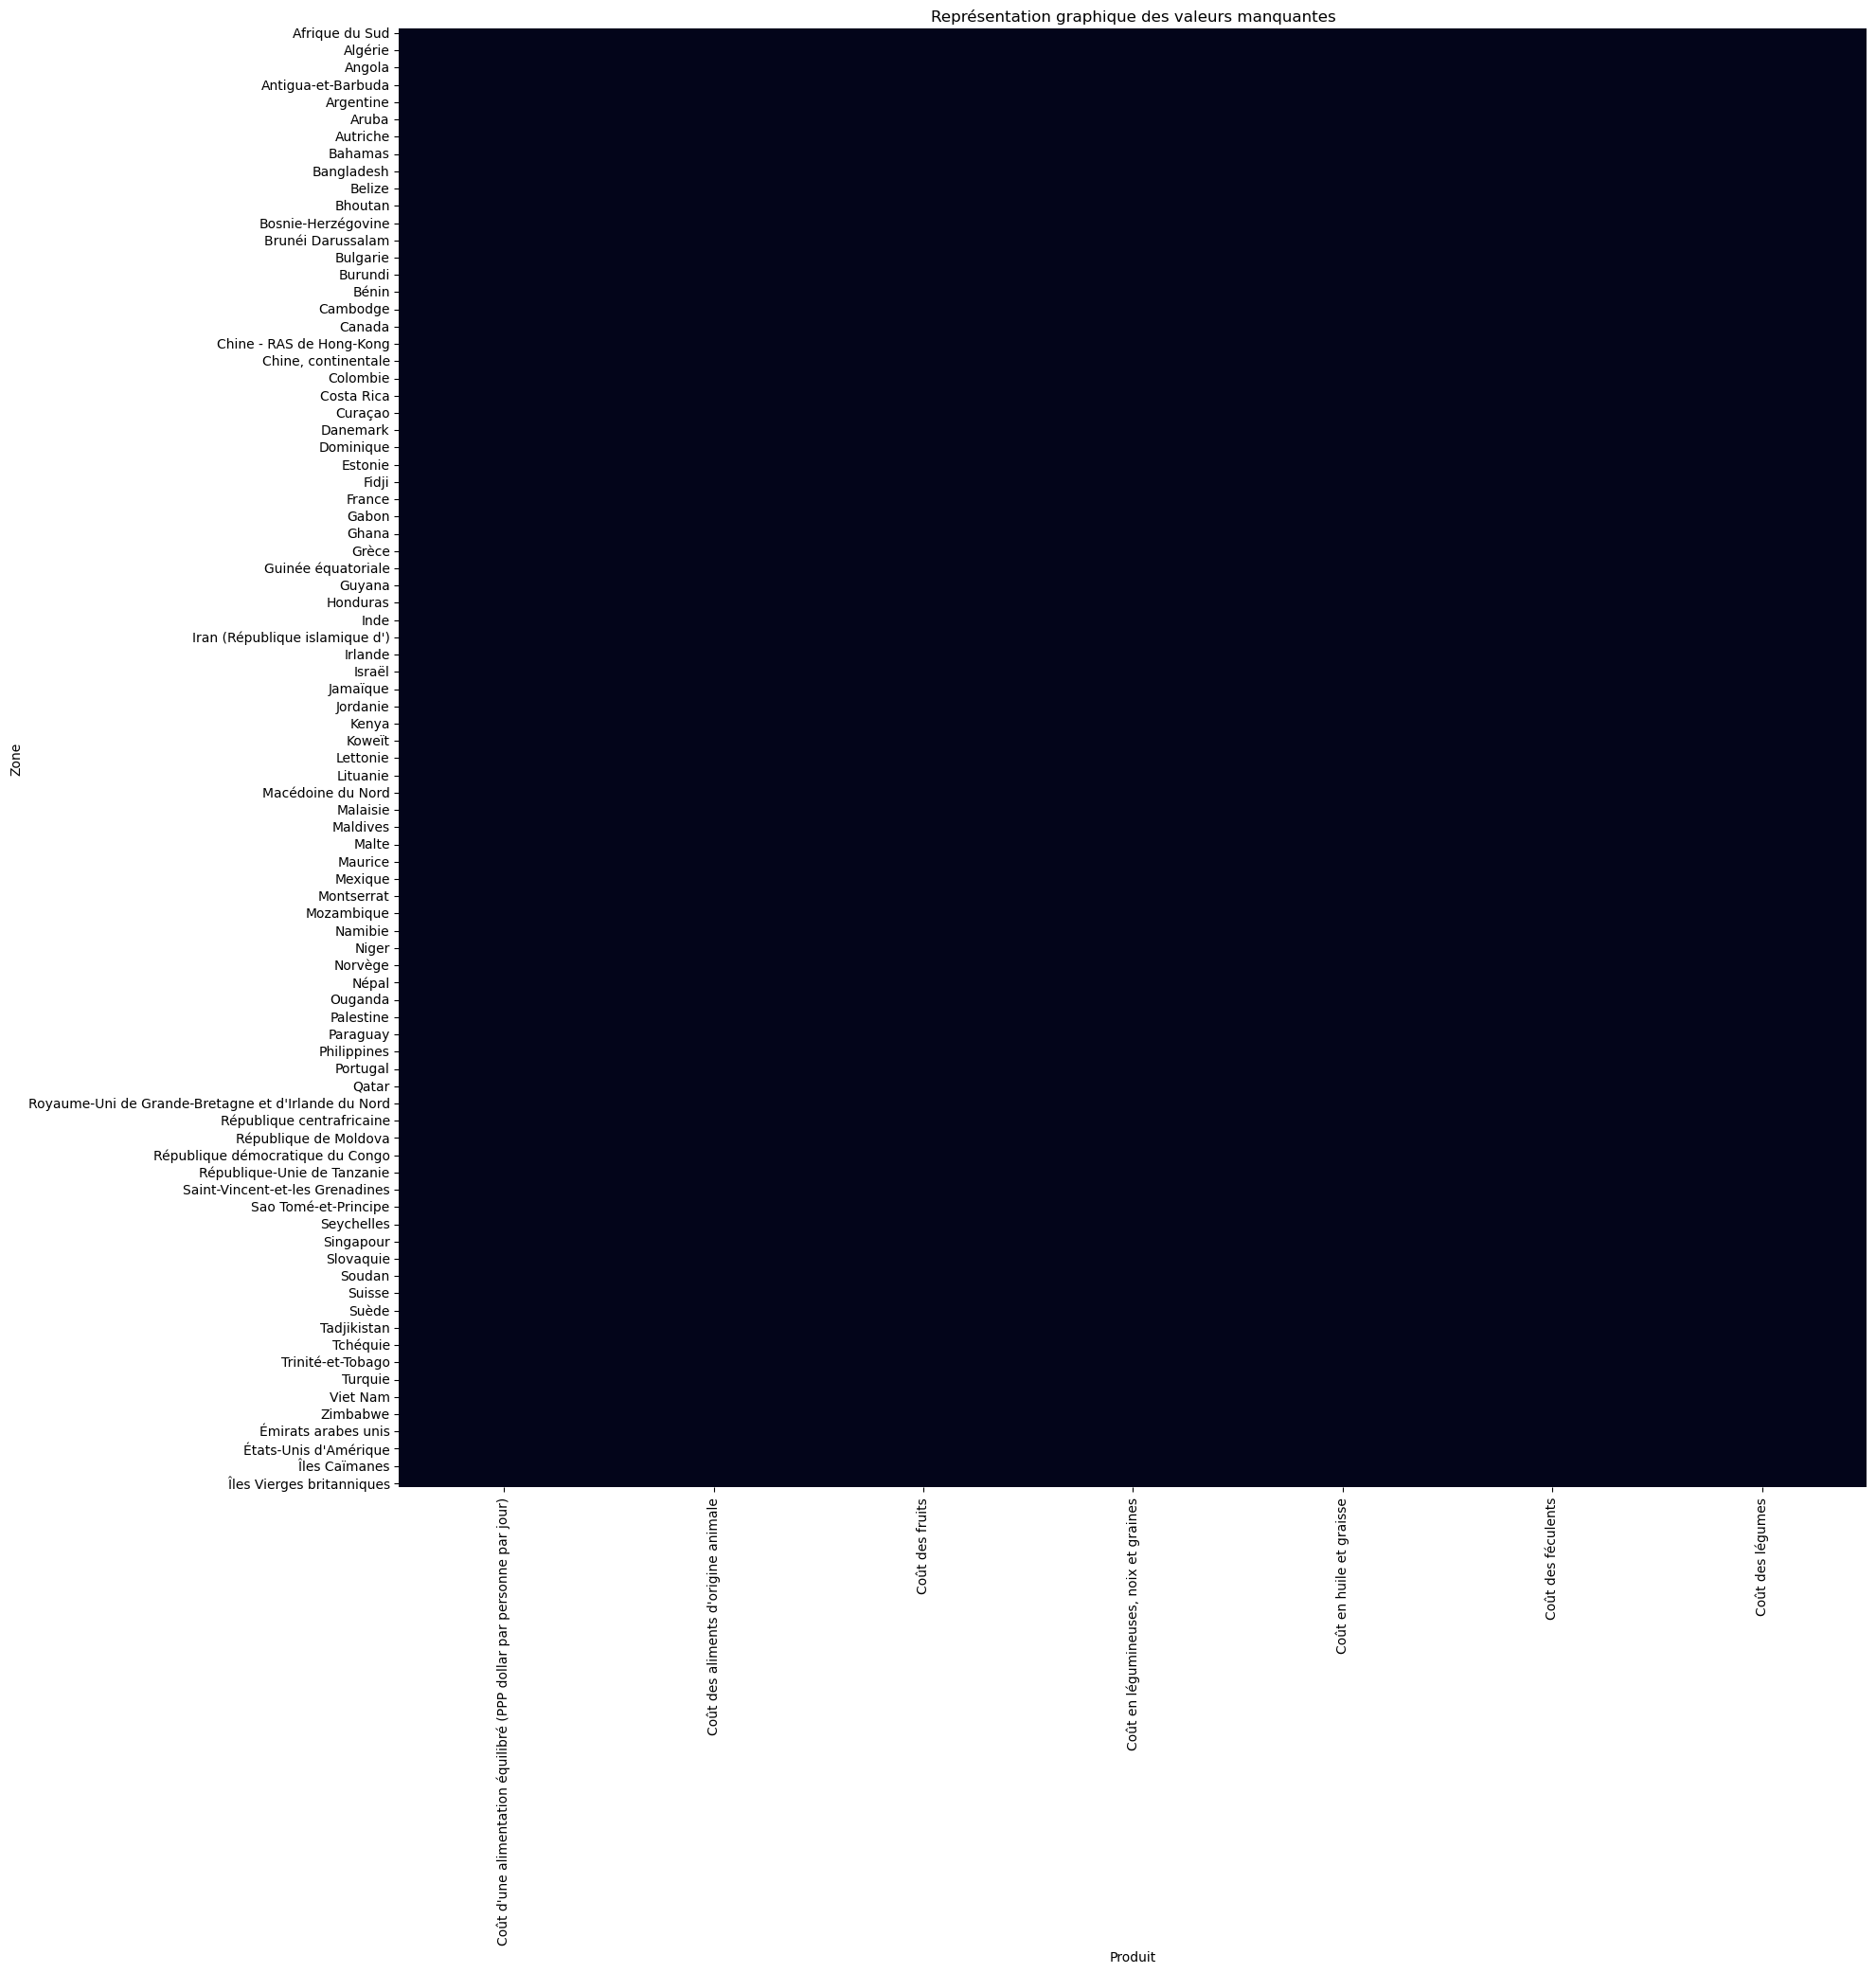

observations  variables  \
Produit                                                                       
Coût d'une alimentation équilibré (PPP dollar p...           169          7   
Coût des aliments d'origine animale                          169          7   
Coût des fruits                                              169          7   
Coût en légumineuses, noix et graines                        169          7   
Coût en huile et graisse                                     169          7   
Coût des féculents                                           169          7   
Coût des légumes                                             169          7   

                                                    moyennes  medianes  \
Produit                                                                  
Coût d'une alimentation équilibré (PPP dollar p...  3.313834     3.235   
Coût des aliments d'origine animale                 0.873213     0.848   
Coût des fruits                                     0.661657     0.621   
Coût en légumineuses, noix et graines               0.347604     0.328   
Coût en huile et graisse                            0.130391     0.128   
Coût des féculents                                  0.508166     0.495   
Coût des légumes                                    0.792840     0.750   

                                                    ecart_types    min    max  \
Produit                                                                         
Coût d'une alimentation équilibré (PPP dollar p...     0.656710  1.822  5.975   
Coût des aliments d'origine animale                    0.214233  0.377  1.583   
Coût des fruits                                        0.249221  0.162  1.997   
Coût en légumineuses, noix et graines                  0.150028  0.069  0.875   
Coût en huile et graisse                               0.053685  0.052  0.453   
Coût des féculents                                     0.191031  0.147  1.477   
Coût des légumes                                       0.277072  0.303  1.785   

                                                    nb_valeurs_manquantes  \
Produit                                                                     
Coût d'une alimentation équilibré (PPP dollar p...                      0   
Coût des aliments d'origine animale                                     0   
Coût des fruits                                                         0   
Coût en légumineuses, noix et graines                                   0   
Coût en huile et graisse                                                0   
Coût des féculents                                                      0   
Coût des légumes                                                        0   

                                                    %_valeurs_manquantes  
Produit                                                                   
Coût d'une alimentation équilibré (PPP dollar p...                   0.0  
Coût des aliments d'origine animale                                  0.0  
Coût des fruits                                                      0.0  
Coût en légumineuses, noix et graines                                0.0  
Coût en huile et graisse                                             0.0  
Coût des féculents                                                   0.0  
Coût des légumes                                                     0.0

In [40]:
my_first_analyse(vie_saine_2017)

## Table Série Temporelle

In [41]:
series_temp

Code Domaine                       Domaine  Code zone (M49)         Zone  \
0              OA  Séries temporelles annuelles                4  Afghanistan   
1              OA  Séries temporelles annuelles                4  Afghanistan   
2              OA  Séries temporelles annuelles                4  Afghanistan   
3              OA  Séries temporelles annuelles                4  Afghanistan   
4              OA  Séries temporelles annuelles                4  Afghanistan   
...           ...                           ...              ...          ...   
1168           OA  Séries temporelles annuelles              716     Zimbabwe   
1169           OA  Séries temporelles annuelles              716     Zimbabwe   
1170           OA  Séries temporelles annuelles              716     Zimbabwe   
1171           OA  Séries temporelles annuelles              716     Zimbabwe   
1172           OA  Séries temporelles annuelles              716     Zimbabwe   

      Code Élément             Élément  Code Produit                 Produit  \
0              511   Population totale          3010  Population-Estimations   
1              512              Hommes          3010  Population-Estimations   
2              513              Femmes          3010  Population-Estimations   
3              551   Population rurale          3010  Population-Estimations   
4              561  Population urbaine          3010  Population-Estimations   
...            ...                 ...           ...                     ...   
1168           511   Population totale          3010  Population-Estimations   
1169           512              Hommes          3010  Population-Estimations   
1170           513              Femmes          3010  Population-Estimations   
1171           551   Population rurale          3010  Population-Estimations   
1172           561  Population urbaine          3010  Population-Estimations   

      Code année  Année           Unité     Valeur Symbole  \
0           2017   2017  1000 personnes  35643.418       X   
1           2017   2017  1000 personnes  18028.696       X   
2           2017   2017  1000 personnes  17614.722       X   
3           2017   2017  1000 personnes  26558.609       X   
4           2017   2017  1000 personnes   8971.472       X   
...          ...    ...             ...        ...     ...   
1168        2017   2017  1000 personnes  14751.101       X   
1169        2017   2017  1000 personnes   6940.631       X   
1170        2017   2017  1000 personnes   7810.471       X   
1171        2017   2017  1000 personnes  11201.138       X   
1172        2017   2017  1000 personnes   5328.766       X   

                 Description du Symbole  Note  
0     Ciffre de sources internationales   NaN  
1     Ciffre de sources internationales   NaN  
2     Ciffre de sources internationales   NaN  
3     Ciffre de sources internationales   NaN  
4     Ciffre de sources internationales   NaN  
...                                 ...   ...  
1168  Ciffre de sources internationales   NaN  
1169  Ciffre de sources internationales   NaN  
1170  Ciffre de sources internationales   NaN  
1171  Ciffre de sources internationales   NaN  
1172  Ciffre de sources internationales   NaN  

[1173 rows x 15 columns]

In [42]:
series_temp = series_temp.pivot(index="Zone", columns="Élément", values="Valeur")

In [43]:
series_temp

Élément                       Femmes     Hommes  Population rurale  \
Zone                                                                 
Afghanistan                17614.722  18028.696          26558.609   
Afrique du Sud             29175.940  27465.269          19369.002   
Albanie                     1436.180   1443.175           1190.155   
Algérie                    20175.233  20961.313          11547.532   
Allemagne                  41873.558  40750.817          18672.100   
...                              ...        ...                ...   
Îles Salomon                 314.498    329.135            468.983   
Îles Turques-et-Caïques       19.707     20.137              2.546   
Îles Vierges américaines      53.661     48.190              4.612   
Îles Vierges britanniques     15.482     14.578             16.429   
Îles Wallis-et-Futuna          6.167      5.769             11.773   

Élément                    Population totale  Population urbaine  
Zone                                                              
Afghanistan                        35643.418            8971.472  
Afrique du Sud                     56641.209           37348.154  
Albanie                             2879.355            1740.032  
Algérie                            41136.546           29770.610  
Allemagne                          82624.374           63442.124  
...                                      ...                 ...  
Îles Salomon                         643.634             142.360  
Îles Turques-et-Caïques               39.844              32.900  
Îles Vierges américaines             101.851             100.289  
Îles Vierges britanniques             30.060              14.767  
Îles Wallis-et-Futuna                 11.936               0.000  

[236 rows x 5 columns]

## Production Poulet

In [44]:
display(prod_poulet.head())
print(prod_poulet.shape)

Code Domaine                       Domaine  Code zone (M49)         Zone  \
0          QCL  Cultures et produits animaux                4  Afghanistan   
1          QCL  Cultures et produits animaux                4  Afghanistan   
2          QCL  Cultures et produits animaux                4  Afghanistan   
3          QCL  Cultures et produits animaux                4  Afghanistan   
4          QCL  Cultures et produits animaux                4  Afghanistan   

   Code Élément   Élément  Code Produit (CPC)  Produit  Code année  Année  \
0          5112  Réserves                2151  Poulets        1961   1961   
1          5112  Réserves                2151  Poulets        1962   1962   
2          5112  Réserves                2151  Poulets        1963   1963   
3          5112  Réserves                2151  Poulets        1964   1964   
4          5112  Réserves                2151  Poulets        1965   1965   

        Unité  Valeur Symbole Description du Symbole  
0  1000 têtes  4700.0       E         Valeur estimée  
1  1000 têtes  4900.0       E         Valeur estimée  
2  1000 têtes  5000.0       E         Valeur estimée  
3  1000 têtes  5300.0       E         Valeur estimée  
4  1000 têtes  5500.0       E         Valeur estimée

(45201, 14)


In [45]:
prod_poulet["Domaine"].unique()

array(['Cultures et produits animaux'], dtype=object)

In [46]:
prod_poulet["Élément"].unique()

array(['Réserves', 'Rendement/Poids Carcasse', 'Production',
       'Animaux Producteurs/Abattus'], dtype=object)

In [47]:
prod_poulet["Produit"].unique()

array(['Poulets', 'Viande, poulet, fraîche ou réfrigérée'], dtype=object)

In [48]:
prod_poulet["Unité"].unique()

array(['1000 têtes', '0.1g/An', 'tonnes'], dtype=object)

In [49]:
prod_poulet_2017 = prod_poulet.loc[(prod_poulet["Année"]==2017)&(prod_poulet["Unité"]=="1000 têtes")]

In [50]:
prod_poulet_2017.pivot(index="Zone", columns=["Élément","Produit","Unité"], values="Valeur")

Élément                 Réserves           Animaux Producteurs/Abattus
Produit                  Poulets Viande, poulet, fraîche ou réfrigérée
Unité                 1000 têtes                            1000 têtes
Zone                                                                  
Afghanistan              13573.0                               34547.0
Afrique du Sud          167033.0                              927147.0
Albanie                   7835.0                               11826.0
Algérie                 134827.0                              259963.0
Allemagne               160000.0                              631000.0
...                          ...                                   ...
Érythrée                  1315.0                                1901.0
États-Unis d'Amérique  1486000.0                             9050702.0
Éthiopie                 56056.0                               84228.0
Îles Cook                   19.0                                  24.0
Îles Salomon               243.0                                 355.0

[196 rows x 2 columns]

## Jointure

In [51]:
pays_continent

Zone Continent
0        Afghanistan       Asie
1     Afrique du Sud    Afrique
2    Åland (les Îles)    Europe
3            Albanie     Europe
4            Algérie    Afrique
..                ...       ...
244         Viet Nam       Asie
245  Wallis-et-Futuna   Océanie
246            Yémen       Asie
247           Zambie    Afrique
248         Zimbabwe    Afrique

[249 rows x 2 columns]

df = df.merge(indic_macro2017, how="inner", on="Zone")
df = df.merge(vie_saine_2017, how="inner", on="Zone")
df = df.merge(series_temp, how="inner", on="Zone")
df_all = df.merge(pays_continent, how="inner", on="Zone")
df_all

In [52]:
df = df.merge(indic_macro2017, how="inner", on="Zone")
df

Alimentation pour touristes  Disponibilité intérieure  \
Zone                                                                          
Afghanistan                                     0                      57.0   
Afrique du Sud                                0.0                    2118.0   
Albanie                                         0                      47.0   
Algérie                                       0.0                     277.0   
Allemagne                                       0                    1739.0   
...                                           ...                       ...   
Émirats arabes unis                             0                     412.0   
Équateur                                      0.0                     341.0   
États-Unis d'Amérique                           0                   18266.0   
Éthiopie                                      0.0                      14.0   
Îles Salomon                                 -0.0                       3.0   

                      Exportations - Quantité  Importations - Quantité  \
Zone                                                                     
Afghanistan                                 0                     29.0   
Afrique du Sud                           63.0                    514.0   
Albanie                                   0.0                     38.0   
Algérie                                   0.0                      2.0   
Allemagne                               646.0                    842.0   
...                                       ...                      ...   
Émirats arabes unis                      94.0                    433.0   
Équateur                                  0.0                      0.0   
États-Unis d'Amérique                  3692.0                    123.0   
Éthiopie                                    0                      1.0   
Îles Salomon                              0.0                      6.0   

                       Nourriture Pertes Production Résidus  \
Zone                                                          
Afghanistan                  55.0    2.0       28.0     0.0   
Afrique du Sud             2035.0   83.0     1667.0     0.0   
Albanie                      47.0      0       13.0     0.0   
Algérie                     264.0   13.0      275.0     0.0   
Allemagne                  1609.0      0     1514.0   -38.0   
...                           ...    ...        ...     ...   
Émirats arabes unis         412.0      0       48.0    -0.0   
Équateur                    324.0   17.0      340.0     0.0   
États-Unis d'Amérique     18100.0      0    21914.0    -0.0   
Éthiopie                     14.0    1.0       14.0     0.0   
Îles Salomon                  3.0      0        0.0     0.0   

                      Variation de stock  Valeur US $ du PIB (en millions)  \
Zone                                                                         
Afghanistan                          0.0                      1.889635e+04   
Afrique du Sud                      -0.0                      3.490067e+05   
Albanie                              4.0                      1.301973e+04   
Algérie                              0.0                      1.700970e+05   
Allemagne                          -29.0                      3.690849e+06   
...                                  ...                               ...   
Émirats arabes unis                -26.0                      3.856055e+05   
Équateur                            -1.0                      1.042959e+05   
États-Unis d'Amérique               80.0                      1.947962e+07   
Éthiopie                             0.0                      7.679452e+04   
Îles Salomon                         3.0                      1.483799e+03   

                       Valeur US $ par habitant du PIB (en US dol)  \
Zone                                                                 
Afghanistan                                             

In [53]:
df = df.merge(vie_saine_2017, how="inner", on="Zone")
df

Alimentation pour touristes  Disponibilité intérieure  \
Zone                                                                          
Afrique du Sud                                0.0                    2118.0   
Albanie                                         0                      47.0   
Algérie                                       0.0                     277.0   
Allemagne                                       0                    1739.0   
Angola                                        0.0                     319.0   
...                                           ...                       ...   
Égypte                                        0.0                    1250.0   
Émirats arabes unis                             0                     412.0   
Équateur                                      0.0                     341.0   
États-Unis d'Amérique                           0                   18266.0   
Éthiopie                                      0.0                      14.0   

                      Exportations - Quantité  Importations - Quantité  \
Zone                                                                     
Afrique du Sud                           63.0                    514.0   
Albanie                                   0.0                     38.0   
Algérie                                   0.0                      2.0   
Allemagne                               646.0                    842.0   
Angola                                    0.0                    277.0   
...                                       ...                      ...   
Égypte                                    1.0                    110.0   
Émirats arabes unis                      94.0                    433.0   
Équateur                                  0.0                      0.0   
États-Unis d'Amérique                  3692.0                    123.0   
Éthiopie                                    0                      1.0   

                       Nourriture Pertes Production Résidus  \
Zone                                                          
Afrique du Sud             2035.0   83.0     1667.0     0.0   
Albanie                      47.0      0       13.0     0.0   
Algérie                     264.0   13.0      275.0     0.0   
Allemagne                  1609.0      0     1514.0   -38.0   
Angola                      315.0    2.0       42.0     0.0   
...                           ...    ...        ...     ...   
Égypte                     1250.0      0     1118.0    -1.0   
Émirats arabes unis         412.0      0       48.0    -0.0   
Équateur                    324.0   17.0      340.0     0.0   
États-Unis d'Amérique     18100.0      0    21914.0    -0.0   
Éthiopie                     14.0    1.0       14.0     0.0   

                      Variation de stock  Valeur US $ du PIB (en millions)  \
Zone                                                                         
Afrique du Sud                      -0.0                      3.490067e+05   
Albanie                              4.0                      1.301973e+04   
Algérie                              0.0                      1.700970e+05   
Allemagne                          -29.0                      3.690849e+06   
Angola                              -0.0                      1.221239e+05   
...                                  ...                               ...   
Égypte                             -23.0                      1.951353e+05   
Émirats arabes unis                -26.0                      3.856055e+05   
Équateur                            -1.0                      1.042959e+05   
États-Unis d'Amérique               80.0                      1.947962e+07   
Éthiopie                             0.0                      7.679452e+04   

                       Valeur US $ par habitant du PIB (en US dol)  \
Zone                                                                 
Afrique du Sud                                         6

In [54]:
df = df.merge(series_temp, how="inner", on="Zone")
df

Alimentation pour touristes  Disponibilité intérieure  \
Zone                                                                          
Afrique du Sud                                0.0                    2118.0   
Albanie                                         0                      47.0   
Algérie                                       0.0                     277.0   
Allemagne                                       0                    1739.0   
Angola                                        0.0                     319.0   
...                                           ...                       ...   
Égypte                                        0.0                    1250.0   
Émirats arabes unis                             0                     412.0   
Équateur                                      0.0                     341.0   
États-Unis d'Amérique                           0                   18266.0   
Éthiopie                                      0.0                      14.0   

                      Exportations - Quantité  Importations - Quantité  \
Zone                                                                     
Afrique du Sud                           63.0                    514.0   
Albanie                                   0.0                     38.0   
Algérie                                   0.0                      2.0   
Allemagne                               646.0                    842.0   
Angola                                    0.0                    277.0   
...                                       ...                      ...   
Égypte                                    1.0                    110.0   
Émirats arabes unis                      94.0                    433.0   
Équateur                                  0.0                      0.0   
États-Unis d'Amérique                  3692.0                    123.0   
Éthiopie                                    0                      1.0   

                       Nourriture Pertes Production Résidus  \
Zone                                                          
Afrique du Sud             2035.0   83.0     1667.0     0.0   
Albanie                      47.0      0       13.0     0.0   
Algérie                     264.0   13.0      275.0     0.0   
Allemagne                  1609.0      0     1514.0   -38.0   
Angola                      315.0    2.0       42.0     0.0   
...                           ...    ...        ...     ...   
Égypte                     1250.0      0     1118.0    -1.0   
Émirats arabes unis         412.0      0       48.0    -0.0   
Équateur                    324.0   17.0      340.0     0.0   
États-Unis d'Amérique     18100.0      0    21914.0    -0.0   
Éthiopie                     14.0    1.0       14.0     0.0   

                      Variation de stock  Valeur US $ du PIB (en millions)  \
Zone                                                                         
Afrique du Sud                      -0.0                      3.490067e+05   
Albanie                              4.0                      1.301973e+04   
Algérie                              0.0                      1.700970e+05   
Allemagne                          -29.0                      3.690849e+06   
Angola                              -0.0                      1.221239e+05   
...                                  ...                               ...   
Égypte                             -23.0                      1.951353e+05   
Émirats arabes unis                -26.0                      3.856055e+05   
Équateur                            -1.0                      1.042959e+05   
États-Unis d'Amérique               80.0                      1.947962e+07   
Éthiopie                             0.0                      7.679452e+04   

                       Valeur US $ par habitant du PIB (en US dol)  \
Zone                                                                 
Afrique du Sud                                         6

In [55]:
df.to_csv('df.csv')

In [56]:
df_all = df.merge(pays_continent, how="inner", on="Zone")
df_all

Zone Alimentation pour touristes  \
0                Antigua-et-Barbuda                         2.0   
1   Bolivie (État plurinational de)                         0.0   
2                        Cabo Verde                         0.0   
3                            Chypre                         2.0   
4                          Djibouti                           0   
5                             Haïti                         0.0   
6                            Israël                           0   
7                        Madagascar                         0.0   
8                             Malte                           0   
9                           Maurice                         1.0   
10                             Oman                           0   
11             Saint-Kitts-et-Nevis                         1.0   
12  Saint-Vincent-et-les Grenadines                         0.0   
13                     Sainte-Lucie                         0.0   
14             Sao Tomé-et-Principe                        -0.0   
15                        Sri Lanka                         0.0   

    Disponibilité intérieure Exportations - Quantité  Importations - Quantité  \
0                        7.0                     0.0                      7.0   
1                      429.0                     1.0                      1.0   
2                       10.0                       0                     12.0   
3                       38.0                     1.0                     14.0   
4                        3.0                       0                      3.0   
5                       98.0                       0                     89.0   
6                      636.0                     3.0                      0.0   
7                       82.0                       0                      0.0   
8                       14.0                     0.0                      9.0   
9                       49.0                     0.0                      2.0   
10                     114.0                    16.0                    126.0   
11                       4.0                     0.0                      4.0   
12                       8.0                       0                      9.0   
13                      11.0                       0                     10.0   
14                       2.0                       0                      2.0   
15                     192.0                     2.0                      0.0   

    Nourriture Pertes Production Résidus Variation de stock  \
0          5.0      0        0.0     0.0                0.0   
1        403.0   27.0      533.0     0.0              103.0   
2          9.0      0        1.0     0.0                4.0   
3         30.0    1.0       25.0    -0.0                0.0   
4          3.0      0          0     0.0                0.0   
5         98.0    0.0        9.0     0.0               -0.0   
6        556.0   29.0      629.0     0.0              -10.0   
7         73.0    2.0       81.0     0.0               -0.0   
8         12.0      0        4.0     0.0               -1.0   
9         48.0      0       48.0    -0.0                0.0   
10       101.0      0        7.0    -0.0                2.0   
11         3.0      0        0.0     0.0                0.0   
12         8.0      0        0.0     0.0                1.0   
13        10.0      0        1.0     0.0                0.0   
14         2.0      0        1.0     0.0                1.0   
15       164.0   10.0      192.0    -0.0               -1.0   

    Valeur US $ du PIB (en millions)  \
0                        1467.977778   
1                       37508.683068   
2                        1769.786532   
3                       22870.734322   
4                        2766.868072   
5                       15237.360994   
6                      355277.447980   
7                       13176.313594   
8                       13510.309062   
9                       13259.348214   
1

In [57]:
df = df_all.drop(["Continent"], axis=1)
df = df.set_index("Zone")
df

Alimentation pour touristes  \
Zone                                                          
Antigua-et-Barbuda                                      2.0   
Bolivie (État plurinational de)                         0.0   
Cabo Verde                                              0.0   
Chypre                                                  2.0   
Djibouti                                                  0   
Haïti                                                   0.0   
Israël                                                    0   
Madagascar                                              0.0   
Malte                                                     0   
Maurice                                                 1.0   
Oman                                                      0   
Saint-Kitts-et-Nevis                                    1.0   
Saint-Vincent-et-les Grenadines                         0.0   
Sainte-Lucie                                            0.0   
Sao Tomé-et-Principe                                   -0.0   
Sri Lanka                                               0.0   

                                 Disponibilité intérieure  \
Zone                                                        
Antigua-et-Barbuda                                    7.0   
Bolivie (État plurinational de)                     429.0   
Cabo Verde                                           10.0   
Chypre                                               38.0   
Djibouti                                              3.0   
Haïti                                                98.0   
Israël                                              636.0   
Madagascar                                           82.0   
Malte                                                14.0   
Maurice                                              49.0   
Oman                                                114.0   
Saint-Kitts-et-Nevis                                  4.0   
Saint-Vincent-et-les Grenadines                       8.0   
Sainte-Lucie                                         11.0   
Sao Tomé-et-Principe                                  2.0   
Sri Lanka                                           192.0   

                                Exportations - Quantité  \
Zone                                                      
Antigua-et-Barbuda                                  0.0   
Bolivie (État plurinational de)                     1.0   
Cabo Verde                                            0   
Chypre                                              1.0   
Djibouti                                              0   
Haïti                                                 0   
Israël                                              3.0   
Madagascar                                            0   
Malte                                               0.0   
Maurice                                             0.0   
Oman                                               16.0   
Saint-Kitts-et-Nevis                                0.0   
Saint-Vincent-et-les Grenadines                       0   
Sainte-Lucie                                          0   
Sao Tomé-et-Principe                                  0   
Sri Lanka                                           2.0   

                                 Importations - Quantité  Nourriture Pertes  \
Zone                                                                          
Antigua-et-Barbuda                                   7.0         5.0      0   
Bolivie (État plurinational de)                      1.0       403.0   27.0   
Cabo Verde                                          12.0         9.0      0   
Chypre                                              14.0        30.0    1.0   
Djibouti                                             3.0         3.0      0   
Haïti                                               89.0        98.0    0.0   
Israël                                               0.0       556.0   29.0   
Madagascar              

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_686/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_686/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_686/3125733484.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mini = data.min()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h000

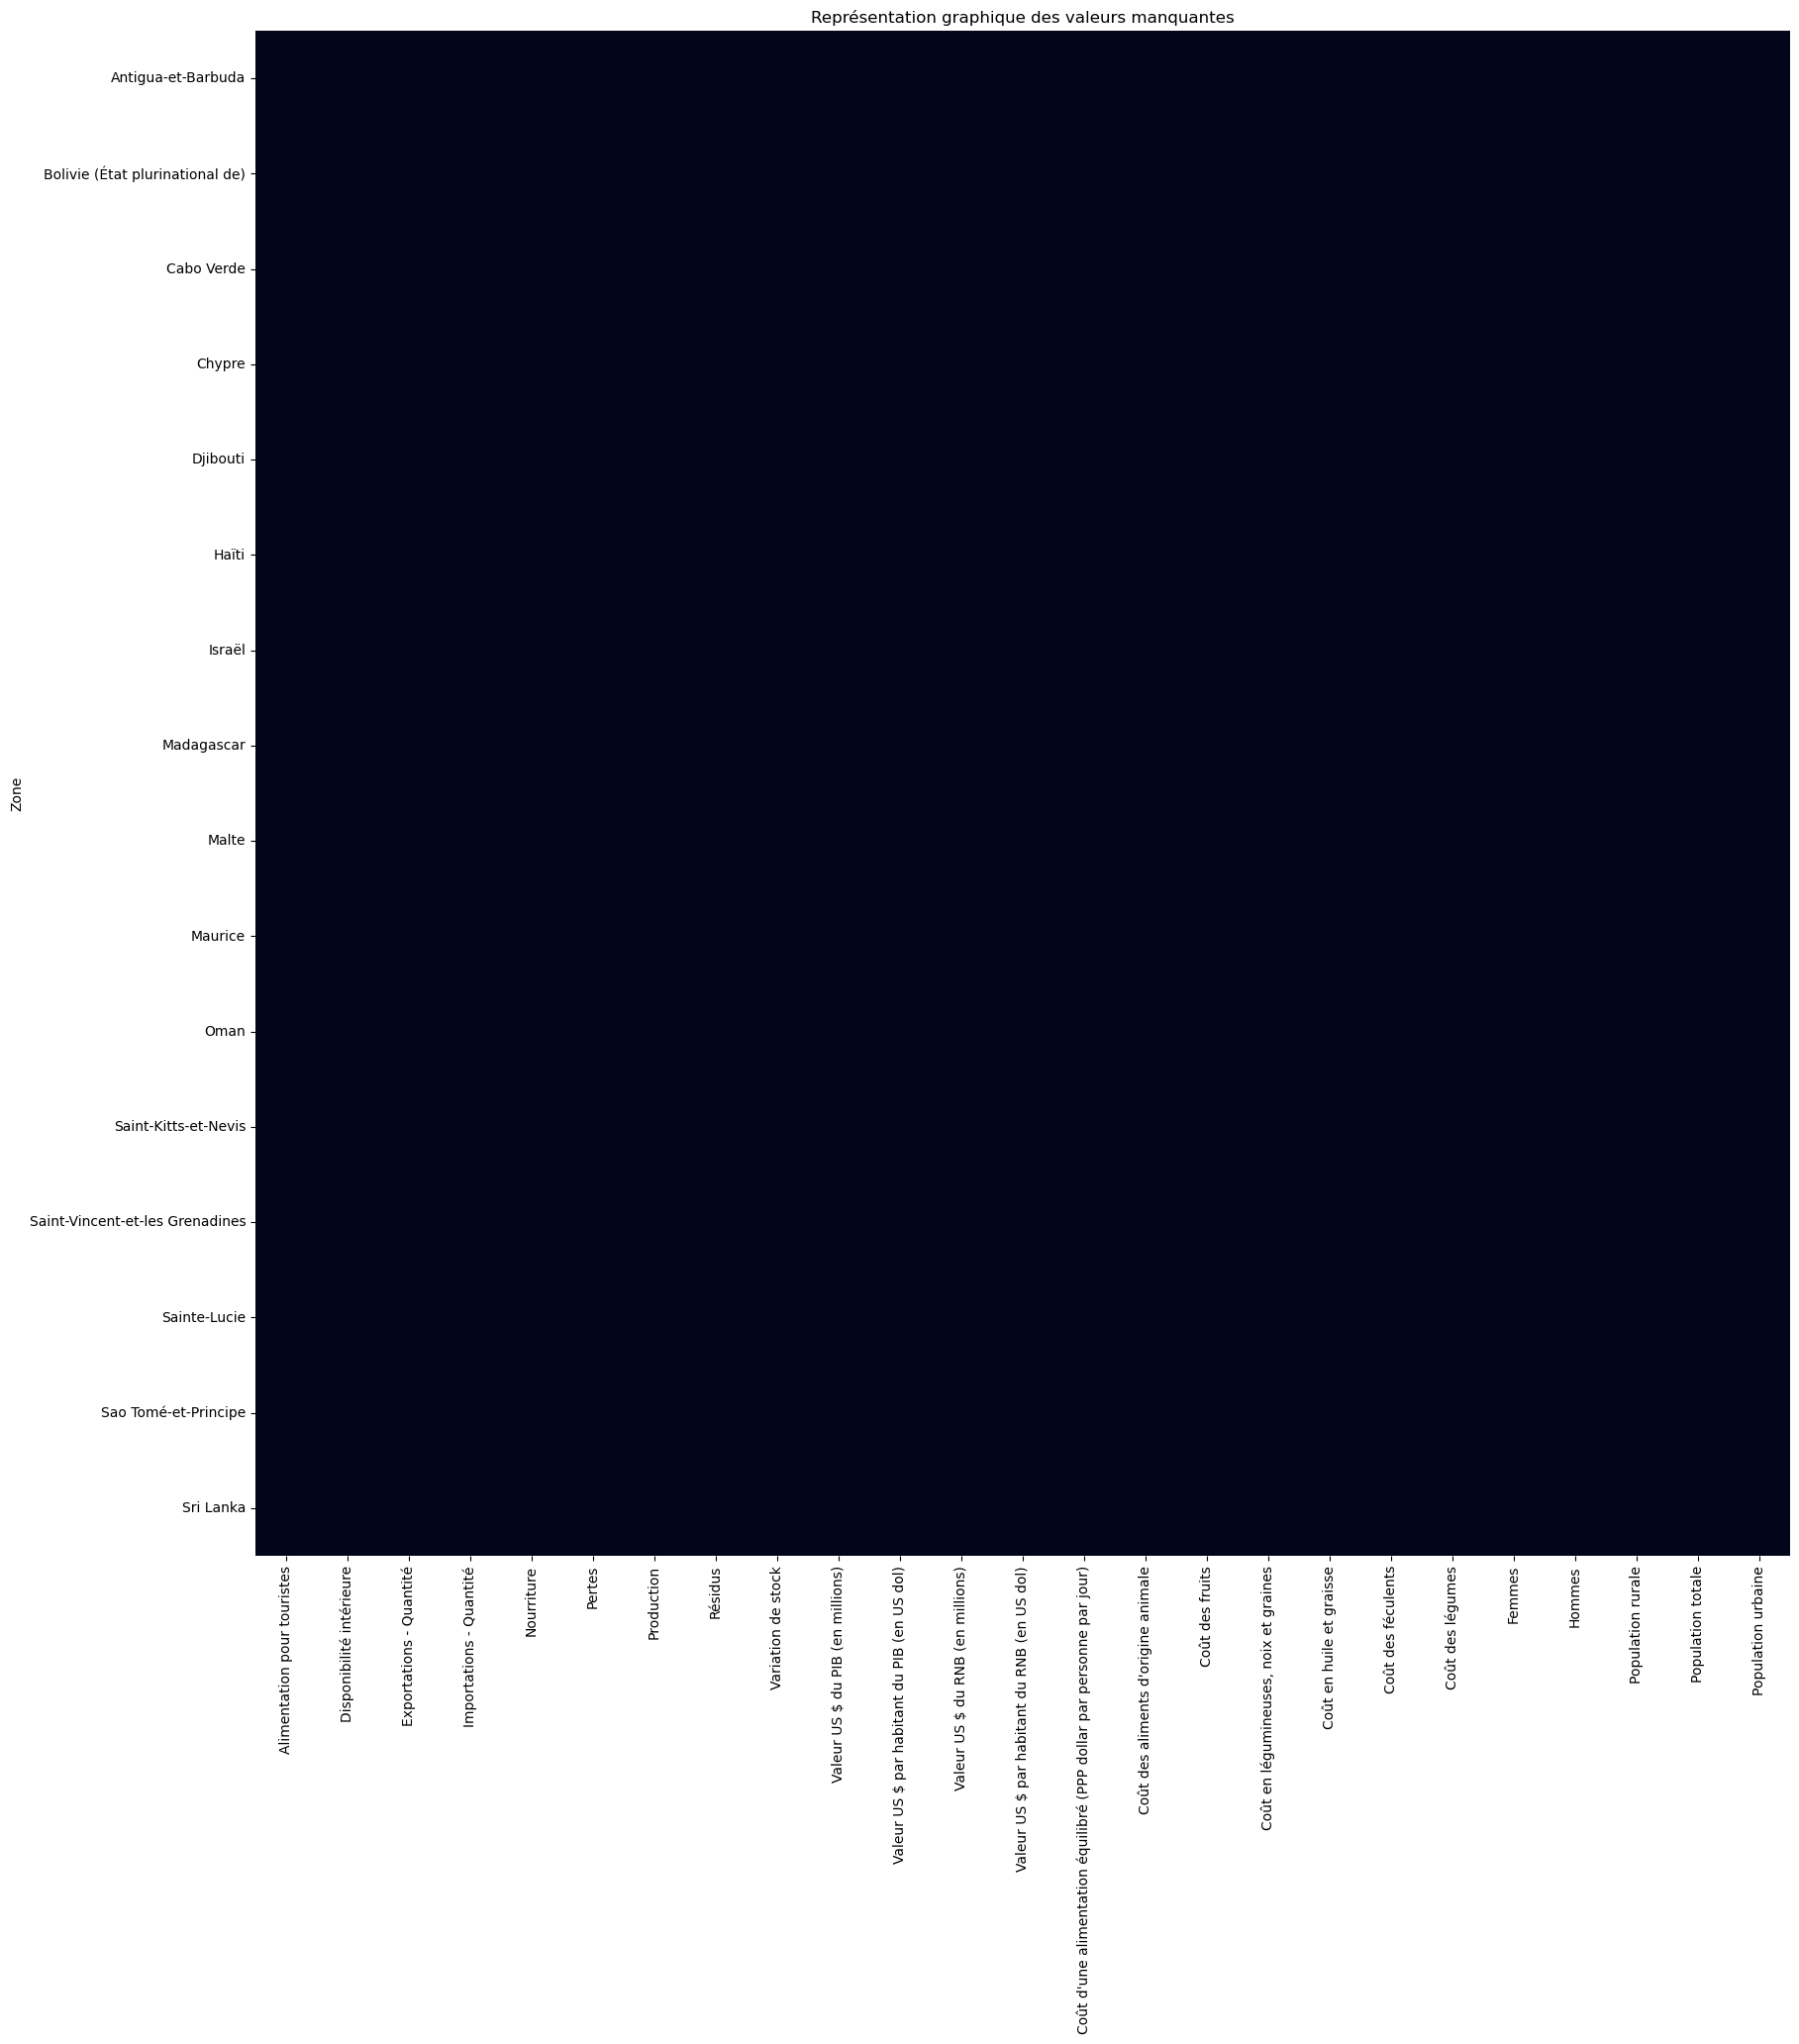

observations  variables  \
Alimentation pour touristes                                   16         25   
Coût d'une alimentation équilibré (PPP dollar p...            16         25   
Coût des aliments d'origine animale                           16         25   
Coût des fruits                                               16         25   
Coût des féculents                                            16         25   
Coût des légumes                                              16         25   
Coût en huile et graisse                                      16         25   
Coût en légumineuses, noix et graines                         16         25   
Disponibilité intérieure                                      16         25   
Exportations - Quantité                                       16         25   
Femmes                                                        16         25   
Hommes                                                        16         25   
Importations - Quantité                                       16         25   
Nourriture                                                    16         25   
Pertes                                                        16         25   
Population rurale                                             16         25   
Population totale                                             16         25   
Population urbaine                                            16         25   
Production                                                    16         25   
Résidus                                                       16         25   
Valeur US $ du PIB (en millions)                              16         25   
Valeur US $ du RNB (en millions)                              16         25   
Valeur US $ par habitant du PIB (en US dol)                   16         25   
Valeur US $ par habitant du RNB (en US dol)                   16         25   
Variation de stock                                            16         25   

                                                        moyennes  \
Alimentation pour touristes                                  NaN   
Coût d'une alimentation équilibré (PPP dollar p...      3.313812   
Coût des aliments d'origine animale                     0.906750   
Coût des fruits                                         0.599187   
Coût des féculents                                      0.517188   
Coût des légumes                                        0.802812   
Coût en huile et graisse                                0.142438   
Coût en légumineuses, noix et graines                   0.345687   
Disponibilité intérieure                              106.062500   
Exportations - Quantité                                      NaN   
Femmes                                               2731.094500   
Hommes                                               2771.664250   
Importations - Quantité                                18.000000   
Nourriture                                             95.312500   
Pertes                                                       NaN   
Population rurale                                    2814.941188   
Population totale                                    5502.758875   
Population urbaine                                   2589.296000   
Production                                                   NaN   
Résidus                                                 0.000000   
Valeur US $ du PIB (en millions)                    39939.716558   
Valeur US $ du RNB (en millions)                    39306.063495   
Valeur US $ par habitant du PIB (en US dol)         12284.257922   
Valeur US $ par habitant du RNB (en US dol)         11862.320502   
Variation de stock                                      6.187500   

                                                        medianes  \
Alimentation pour touristes                             0.000000   
Coût d'une alimentation équilibré (PPP dollar p...      3.300500   
Coût des aliments d'orig

In [58]:
my_first_analyse(df)

Notre jointure est réalisée et nous n'avons pas de valeurs manquantes.

In [59]:
df = df.reset_index()
df

Zone Alimentation pour touristes  \
0                Antigua-et-Barbuda                         2.0   
1   Bolivie (État plurinational de)                         0.0   
2                        Cabo Verde                         0.0   
3                            Chypre                         2.0   
4                          Djibouti                           0   
5                             Haïti                         0.0   
6                            Israël                           0   
7                        Madagascar                         0.0   
8                             Malte                           0   
9                           Maurice                         1.0   
10                             Oman                           0   
11             Saint-Kitts-et-Nevis                         1.0   
12  Saint-Vincent-et-les Grenadines                         0.0   
13                     Sainte-Lucie                         0.0   
14             Sao Tomé-et-Principe                        -0.0   
15                        Sri Lanka                         0.0   

    Disponibilité intérieure Exportations - Quantité  Importations - Quantité  \
0                        7.0                     0.0                      7.0   
1                      429.0                     1.0                      1.0   
2                       10.0                       0                     12.0   
3                       38.0                     1.0                     14.0   
4                        3.0                       0                      3.0   
5                       98.0                       0                     89.0   
6                      636.0                     3.0                      0.0   
7                       82.0                       0                      0.0   
8                       14.0                     0.0                      9.0   
9                       49.0                     0.0                      2.0   
10                     114.0                    16.0                    126.0   
11                       4.0                     0.0                      4.0   
12                       8.0                       0                      9.0   
13                      11.0                       0                     10.0   
14                       2.0                       0                      2.0   
15                     192.0                     2.0                      0.0   

    Nourriture Pertes Production Résidus Variation de stock  \
0          5.0      0        0.0     0.0                0.0   
1        403.0   27.0      533.0     0.0              103.0   
2          9.0      0        1.0     0.0                4.0   
3         30.0    1.0       25.0    -0.0                0.0   
4          3.0      0          0     0.0                0.0   
5         98.0    0.0        9.0     0.0               -0.0   
6        556.0   29.0      629.0     0.0              -10.0   
7         73.0    2.0       81.0     0.0               -0.0   
8         12.0      0        4.0     0.0               -1.0   
9         48.0      0       48.0    -0.0                0.0   
10       101.0      0        7.0    -0.0                2.0   
11         3.0      0        0.0     0.0                0.0   
12         8.0      0        0.0     0.0                1.0   
13        10.0      0        1.0     0.0                0.0   
14         2.0      0        1.0     0.0                1.0   
15       164.0   10.0      192.0    -0.0               -1.0   

    Valeur US $ du PIB (en millions)  \
0                        1467.977778   
1                       37508.683068   
2                        1769.786532   
3                       22870.734322   
4                        2766.868072   
5                       15237.360994   
6                      355277.447980   
7                       13176.313594   
8                       13510.309062   
9                       13259.348214   
1

In [60]:
# On supprime la France de notre table. En effet, l'objectif est d'exporter nos produits à l'international.
df.drop(df.loc[df["Zone"]=="France"].index, inplace=True)

# Analyse Univarié

In [61]:
my_first_analyse(df, graphique=False)

/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_686/3125733484.py:13: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  moyennes = data.mean()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_686/3125733484.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medianes = data.median()
/var/folders/hy/g05wz4ln30z1r5z3mv1rwd2h0000gn/T/ipykernel_686/3125733484.py:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ecart_types = data.std()
/var/folders/hy/g05wz4ln30z1r5z3mv1r

observations  variables  \
Alimentation pour touristes                                   16         26   
Coût d'une alimentation équilibré (PPP dollar p...            16         26   
Coût des aliments d'origine animale                           16         26   
Coût des fruits                                               16         26   
Coût des féculents                                            16         26   
Coût des légumes                                              16         26   
Coût en huile et graisse                                      16         26   
Coût en légumineuses, noix et graines                         16         26   
Disponibilité intérieure                                      16         26   
Exportations - Quantité                                       16         26   
Femmes                                                        16         26   
Hommes                                                        16         26   
Importations - Quantité                                       16         26   
Nourriture                                                    16         26   
Pertes                                                        16         26   
Population rurale                                             16         26   
Population totale                                             16         26   
Population urbaine                                            16         26   
Production                                                    16         26   
Résidus                                                       16         26   
Valeur US $ du PIB (en millions)                              16         26   
Valeur US $ du RNB (en millions)                              16         26   
Valeur US $ par habitant du PIB (en US dol)                   16         26   
Valeur US $ par habitant du RNB (en US dol)                   16         26   
Variation de stock                                            16         26   
Zone                                                          16         26   

                                                        moyennes  \
Alimentation pour touristes                                  NaN   
Coût d'une alimentation équilibré (PPP dollar p...      3.313812   
Coût des aliments d'origine animale                     0.906750   
Coût des fruits                                         0.599187   
Coût des féculents                                      0.517188   
Coût des légumes                                        0.802812   
Coût en huile et graisse                                0.142438   
Coût en légumineuses, noix et graines                   0.345687   
Disponibilité intérieure                              106.062500   
Exportations - Quantité                                      NaN   
Femmes                                               2731.094500   
Hommes                                               2771.664250   
Importations - Quantité                                18.000000   
Nourriture                                             95.312500   
Pertes                                                       NaN   
Population rurale                                    2814.941188   
Population totale                                    5502.758875   
Population urbaine                                   2589.296000   
Production                                                   NaN   
Résidus                                                 0.000000   
Valeur US $ du PIB (en millions)                    39939.716558   
Valeur US $ du RNB (en millions)                    39306.063495   
Valeur US $ par habitant du PIB (en US dol)         12284.257922   
Valeur US $ par habitant du RNB (en US dol)         11862.320502   
Variation de stock                                      6.187500   
Zone                                                         NaN   

                                                        medianes  \
Alimentation 

# Scaling des données

Nous allons pouvoir normaliser nos données

In [62]:
df_sans_scale = df

In [63]:
df_sans_scale = df_sans_scale.set_index("Zone")

In [64]:
df_sans_scale = df_sans_scale.astype(float)

In [65]:
df.set_index("Zone", inplace=True)

In [66]:
df = my_data_scaler(df,scaler_all=True)
display(df.head())
print(df.shape)

Alimentation pour touristes  \
Zone                                                           
Antigua-et-Barbuda                                  2.334869   
Bolivie (État plurinational de)                    -0.538816   
Cabo Verde                                         -0.538816   
Chypre                                              2.334869   
Djibouti                                           -0.538816   

                                 Disponibilité intérieure  \
Zone                                                        
Antigua-et-Barbuda                              -0.572450   
Bolivie (État plurinational de)                  1.866151   
Cabo Verde                                      -0.555114   
Chypre                                          -0.393311   
Djibouti                                        -0.595565   

                                 Exportations - Quantité  \
Zone                                                       
Antigua-et-Barbuda                             -0.372766   
Bolivie (État plurinational de)                -0.113451   
Cabo Verde                                     -0.372766   
Chypre                                         -0.113451   
Djibouti                                       -0.372766   

                                 Importations - Quantité  Nourriture  \
Zone                                                                   
Antigua-et-Barbuda                             -0.316735   -0.584593   
Bolivie (État plurinational de)                -0.489500    1.991663   
Cabo Verde                                     -0.172765   -0.558701   
Chypre                                         -0.115176   -0.422768   
Djibouti                                       -0.431912   -0.597539   

                                   Pertes  Production  Résidus  \
Zone                                                             
Antigua-et-Barbuda              -0.464786   -0.502690      0.0   
Bolivie (État plurinational de)  2.445179    2.297402      0.0   
Cabo Verde                      -0.464786   -0.497437      0.0   
Chypre                          -0.357010   -0.371354     -0.0   
Djibouti                        -0.464786   -0.502690      0.0   

                                 Variation de stock  \
Zone                                                  
Antigua-et-Barbuda                        -0.246023   
Bolivie (État plurinational de)            3.849389   
Cabo Verde                                -0.086978   
Chypre                                    -0.246023   
Djibouti                                  -0.246023   

                                 Valeur US $ du PIB (en millions)  \
Zone                                                                
Antigua-et-Barbuda                                      -0.451750   
Bolivie (État plurinational de)                         -0.028546   
Cabo Verde                                              -0.448206   
Chypre                                                  -0.200431   
Djibouti                                                -0.436498   

                                 Valeur US $ par habitant du PIB (en US dol)  \
Zone                                                                           
Antigua-et-Barbuda                                                  0.259619   
Bolivie (État plurinational de)                                    -0.748337   
Cabo Verde                                                         -0.753236   
Chypre                                                              1.212277   
Djibouti                                                           -0.783556   

                                 Valeur US $ du RNB (en millions)  \
Zone                                                                
Antigua-et-Barbuda                                      -0.447463   
Bolivie (État plurinational de)                         -0.031690   
Cabo Verde                                              -0.4

(16, 25)


# Analyse Bivraié

In [67]:
#sns.pairplot(df, corner=True)

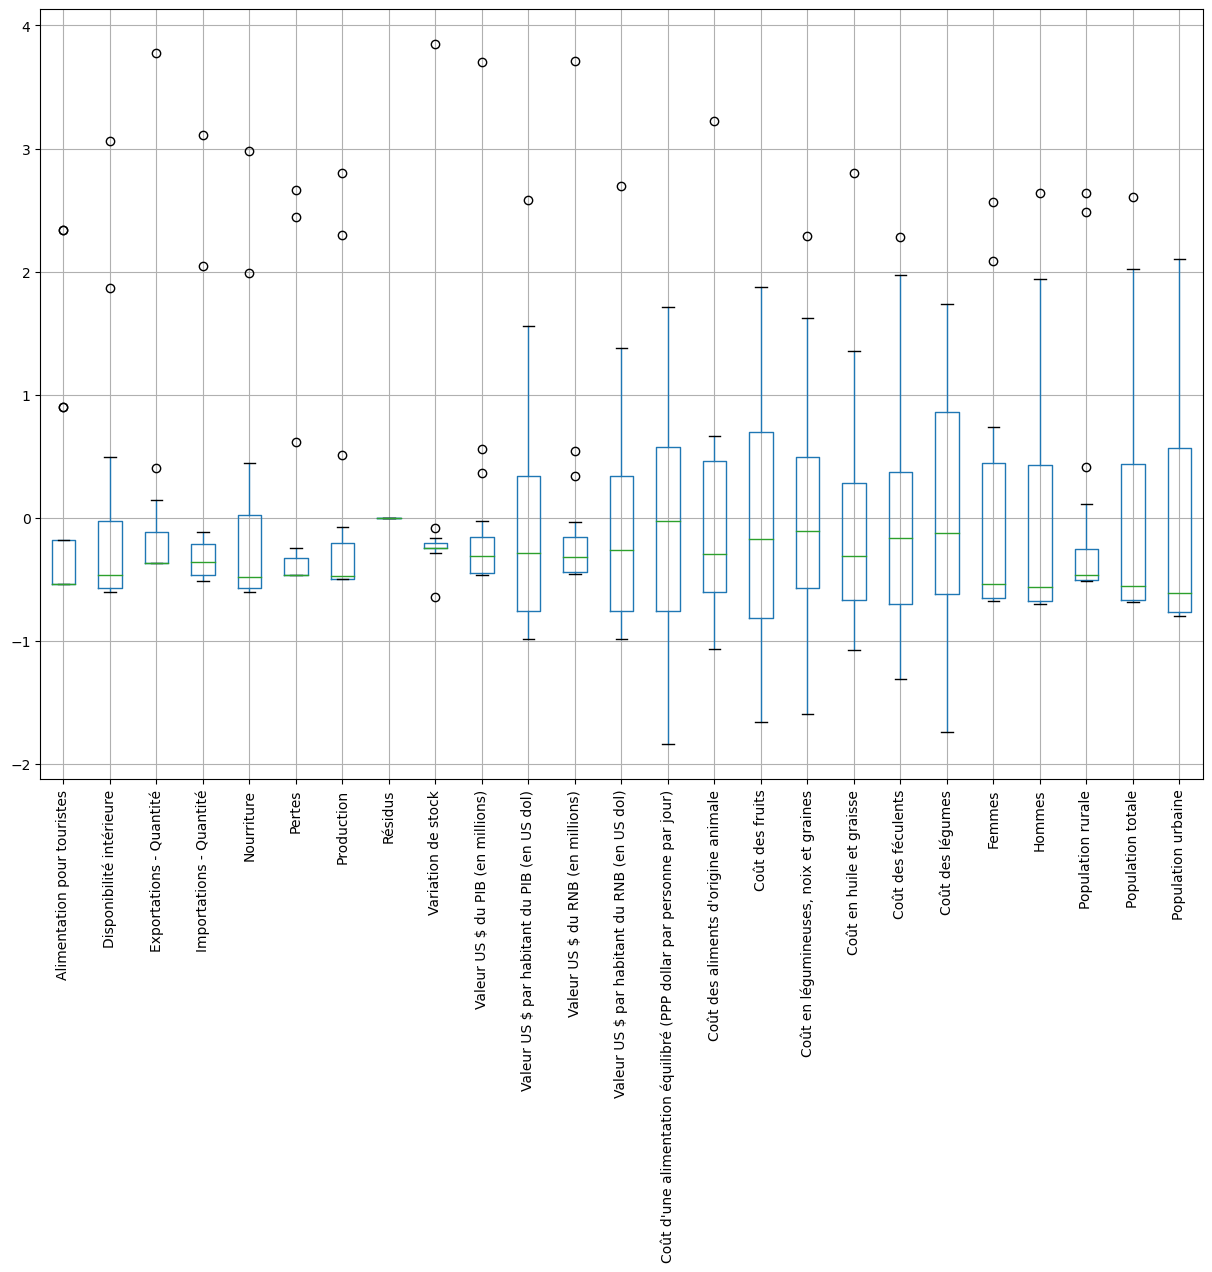

In [68]:
my_boxplots(df)

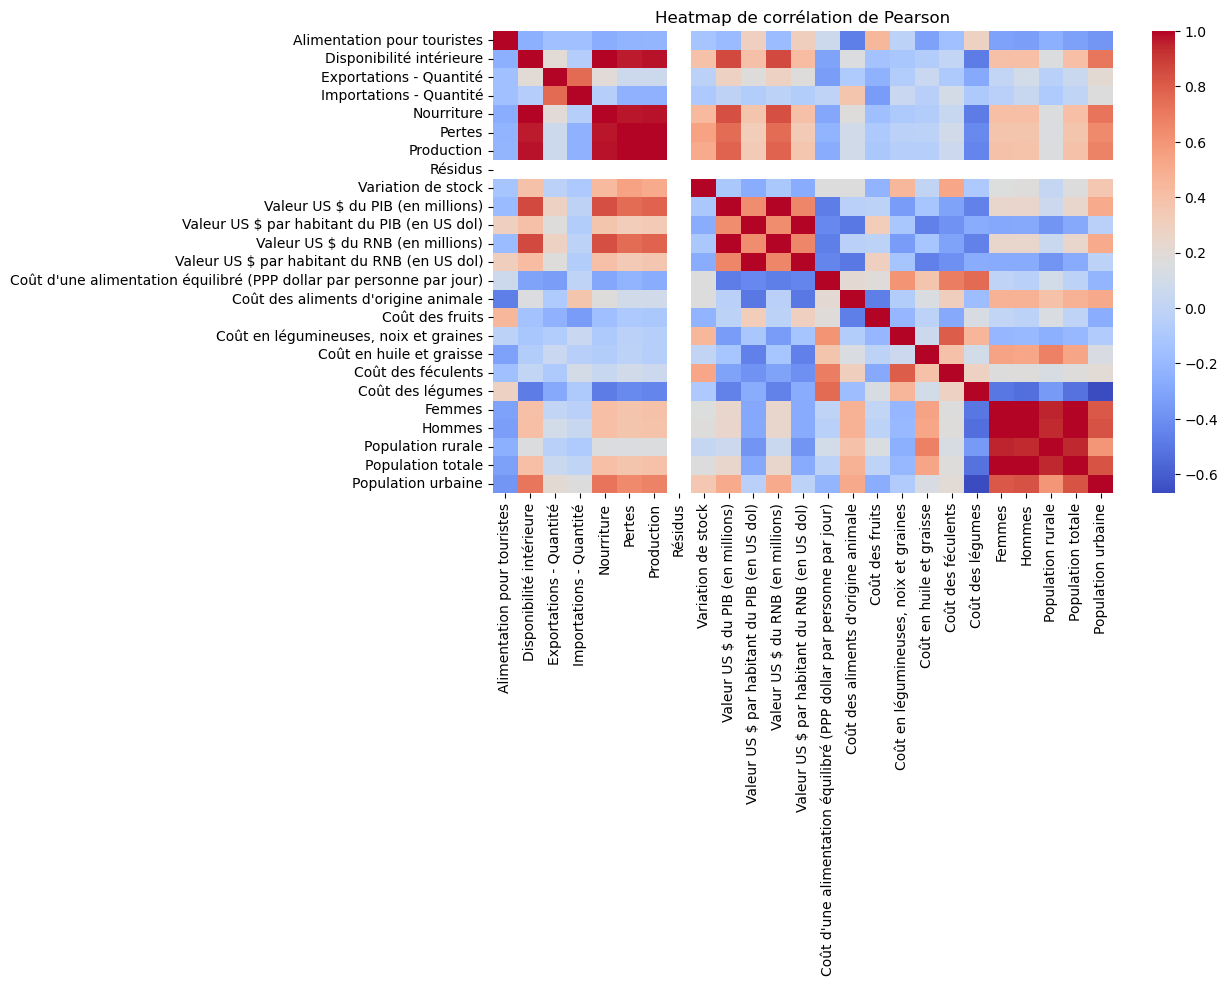

In [69]:
my_corr_heatmap(df, annot=False)

On constate des corrélations importantes entre les variables : 
- Nourriture et Disponibilité intérieure et Production
- Population totale et Pertes
- Production et Exportation - Quantité
- Exportation - Quantité et Disponibilité Intérieures
- Valeur US dol du PIB (en millions) et Disponibilité intérieure
- Valeur US dol du PIB (en millions) et Nourriture
- ...

# Clustering

Pour nos tests, nous allons utiliser plusieurs DataFrame : 
- Les données sans scaling, avec les outliers
- Les données avec scaling, sans les outliers
- Les données sans scaling, sans les outliers
- Les données avec scaling, avec les outliers

In [70]:
# On recherche les outliers avec le Z-Score
outliers = my_outliers_zscore(df)
df_avec_scaling_sans_outliers = df.drop(outliers.index, axis=0)

In [71]:
df_avec_scaling_sans_outliers

Alimentation pour touristes  \
Zone                                                           
Antigua-et-Barbuda                                  2.334869   
Cabo Verde                                         -0.538816   
Chypre                                              2.334869   
Djibouti                                           -0.538816   
Madagascar                                         -0.538816   
Malte                                              -0.538816   
Maurice                                             0.898027   
Saint-Kitts-et-Nevis                                0.898027   
Saint-Vincent-et-les Grenadines                    -0.538816   
Sainte-Lucie                                       -0.538816   
Sao Tomé-et-Principe                               -0.538816   
Sri Lanka                                          -0.538816   

                                 Disponibilité intérieure  \
Zone                                                        
Antigua-et-Barbuda                              -0.572450   
Cabo Verde                                      -0.555114   
Chypre                                          -0.393311   
Djibouti                                        -0.595565   
Madagascar                                      -0.139049   
Malte                                           -0.531999   
Maurice                                         -0.329746   
Saint-Kitts-et-Nevis                            -0.589786   
Saint-Vincent-et-les Grenadines                 -0.566671   
Sainte-Lucie                                    -0.549335   
Sao Tomé-et-Principe                            -0.601343   
Sri Lanka                                        0.496605   

                                 Exportations - Quantité  \
Zone                                                       
Antigua-et-Barbuda                             -0.372766   
Cabo Verde                                     -0.372766   
Chypre                                         -0.113451   
Djibouti                                       -0.372766   
Madagascar                                     -0.372766   
Malte                                          -0.372766   
Maurice                                        -0.372766   
Saint-Kitts-et-Nevis                           -0.372766   
Saint-Vincent-et-les Grenadines                -0.372766   
Sainte-Lucie                                   -0.372766   
Sao Tomé-et-Principe                           -0.372766   
Sri Lanka                                       0.145865   

                                 Importations - Quantité  Nourriture  \
Zone                                                                   
Antigua-et-Barbuda                             -0.316735   -0.584593   
Cabo Verde                                     -0.172765   -0.558701   
Chypre                                         -0.115176   -0.422768   
Djibouti                                       -0.431912   -0.597539   
Madagascar                                     -0.518294   -0.144429   
Malte                                          -0.259147   -0.539282   
Maurice                                        -0.460706   -0.306254   
Saint-Kitts-et-Nevis                           -0.403118   -0.597539   
Saint-Vincent-et-les Grenadines                -0.259147   -0.565174   
Sainte-Lucie                                   -0.230353   -0.552228   
Sao Tomé-et-Principe                           -0.460706   -0.604012   
Sri Lanka                                      -0.518294    0.444615   

                                   Pertes  Production  Résidus  \
Zone                                                             
Antigua-et-Barbuda              -0.464786   -0.502690      0.0   
Cabo Verde                      -0.464786   -0.497437      0.0   
Chypre                          -0.357010   -0.371354     -0.0   
Djibouti                        -0.464786   -0.502690      0.0   
Madagascar                      -0.

## Avec scaling, sans les outliers

### K-means

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

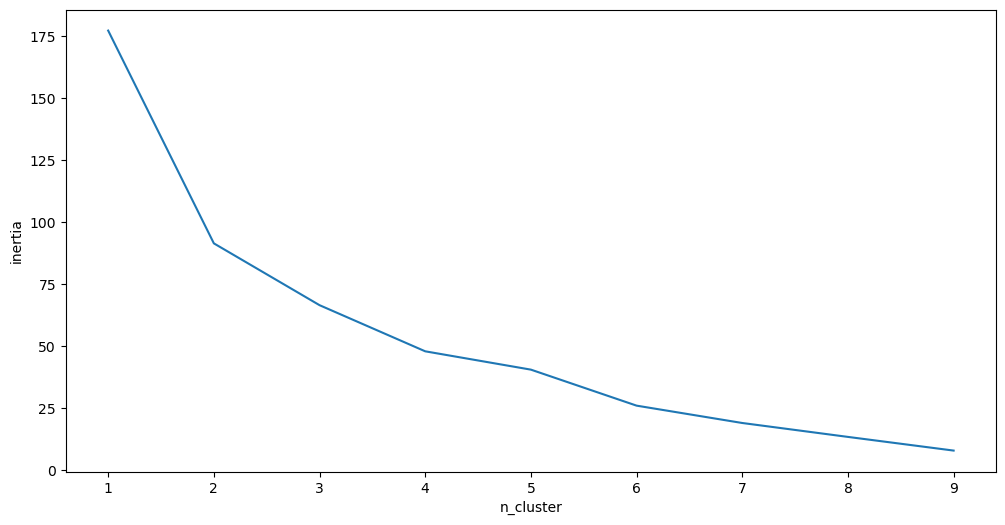

In [72]:
my_kmeans_coude(df_avec_scaling_sans_outliers)

### Silhouette

Le nombre optimal de cluster est : 2


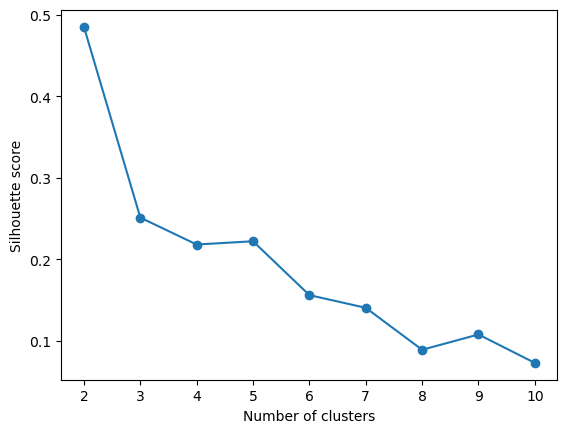

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [73]:
my_silhouette_method(df_avec_scaling_sans_outliers, 10)

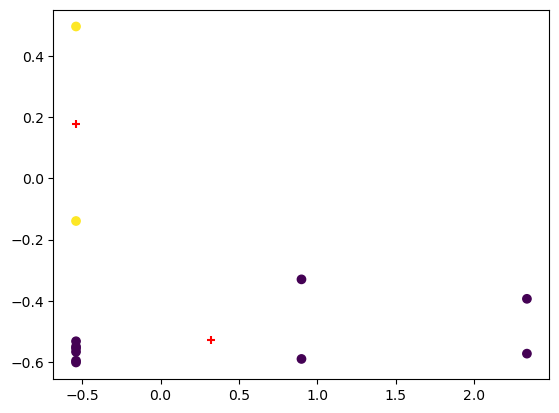

In [74]:
my_kmeans(df_avec_scaling_sans_outliers, 2, graphique=False)

### Boxplot par groupe

<AxesSubplot:xlabel='cluster', ylabel="Coût des aliments d'origine animale">

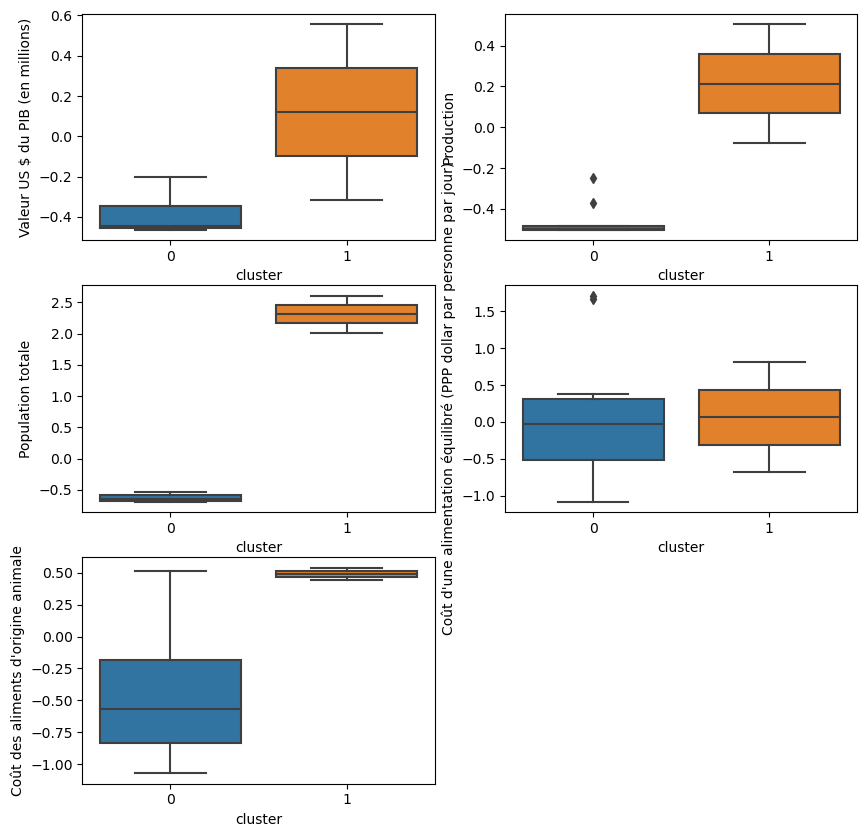

In [75]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.boxplot(data=df_avec_scaling_sans_outliers, x="cluster", y="Valeur US $ du PIB (en millions)")

plt.subplot(322)
sns.boxplot(data=df_avec_scaling_sans_outliers, x="cluster", y="Production")

plt.subplot(323)
sns.boxplot(data=df_avec_scaling_sans_outliers, x="cluster", y="Population totale")

plt.subplot(324)
sns.boxplot(data=df_avec_scaling_sans_outliers, x="cluster", y="Coût d'une alimentation équilibré (PPP dollar par personne par jour)")

plt.subplot(325)
sns.boxplot(data=df_avec_scaling_sans_outliers, x="cluster", y="Coût des aliments d'origine animale")

### ACP

Explained Variance Ratio : [50. 69. 83. 90. 94. 98.]


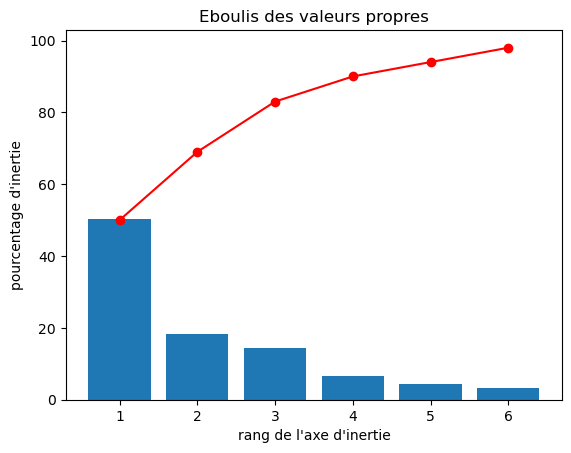

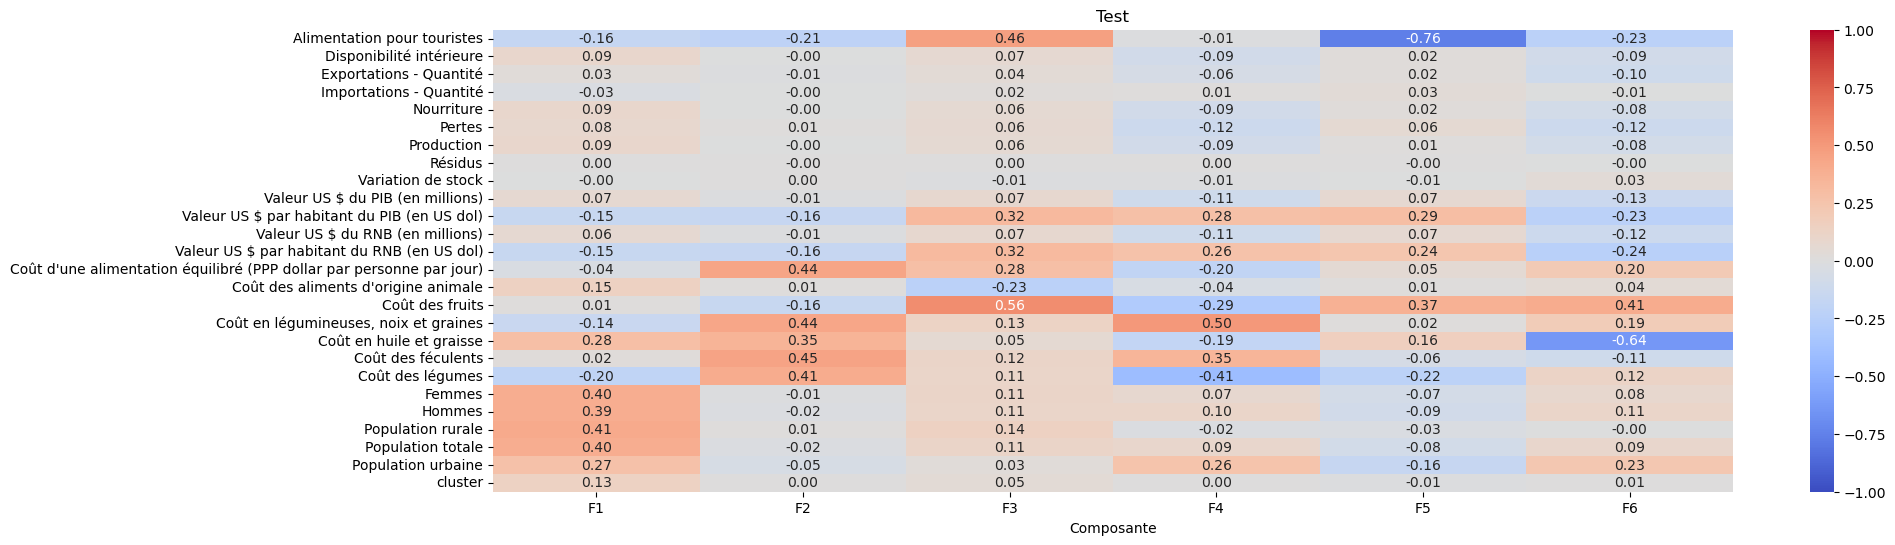

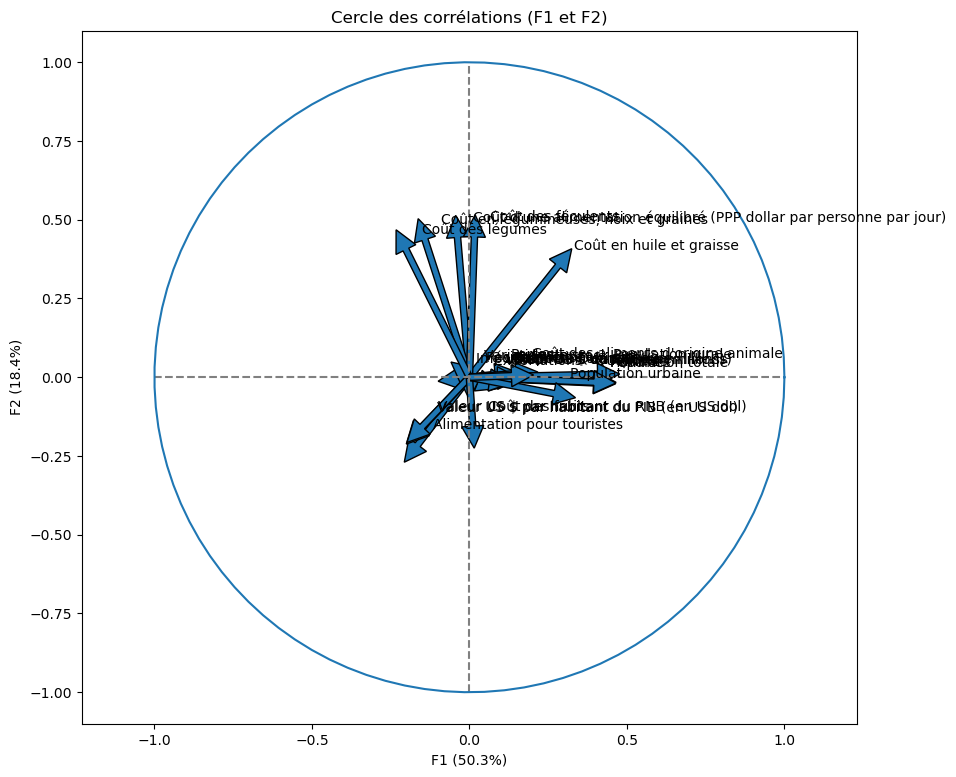

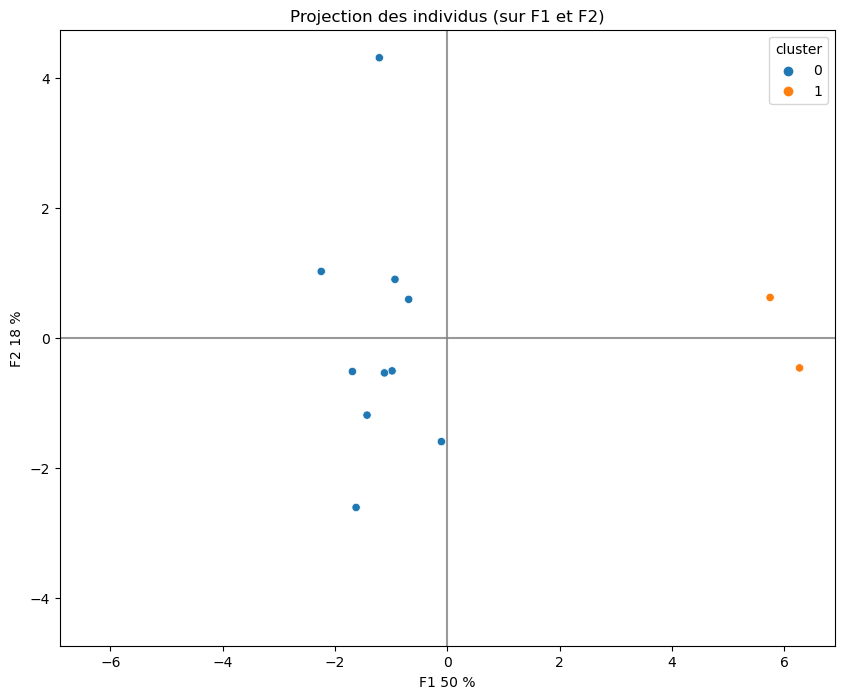

In [76]:
my_pca_proj(df_avec_scaling_sans_outliers, 6, (0,1), clusters=df_avec_scaling_sans_outliers["cluster"])

## Sans Scaling, Sans Outliers

In [77]:
df_sans_scale

Alimentation pour touristes  \
Zone                                                           
Antigua-et-Barbuda                                       2.0   
Bolivie (État plurinational de)                          0.0   
Cabo Verde                                               0.0   
Chypre                                                   2.0   
Djibouti                                                 0.0   
Haïti                                                    0.0   
Israël                                                   0.0   
Madagascar                                               0.0   
Malte                                                    0.0   
Maurice                                                  1.0   
Oman                                                     0.0   
Saint-Kitts-et-Nevis                                     1.0   
Saint-Vincent-et-les Grenadines                          0.0   
Sainte-Lucie                                             0.0   
Sao Tomé-et-Principe                                    -0.0   
Sri Lanka                                                0.0   

                                 Disponibilité intérieure  \
Zone                                                        
Antigua-et-Barbuda                                    7.0   
Bolivie (État plurinational de)                     429.0   
Cabo Verde                                           10.0   
Chypre                                               38.0   
Djibouti                                              3.0   
Haïti                                                98.0   
Israël                                              636.0   
Madagascar                                           82.0   
Malte                                                14.0   
Maurice                                              49.0   
Oman                                                114.0   
Saint-Kitts-et-Nevis                                  4.0   
Saint-Vincent-et-les Grenadines                       8.0   
Sainte-Lucie                                         11.0   
Sao Tomé-et-Principe                                  2.0   
Sri Lanka                                           192.0   

                                 Exportations - Quantité  \
Zone                                                       
Antigua-et-Barbuda                                   0.0   
Bolivie (État plurinational de)                      1.0   
Cabo Verde                                           0.0   
Chypre                                               1.0   
Djibouti                                             0.0   
Haïti                                                0.0   
Israël                                               3.0   
Madagascar                                           0.0   
Malte                                                0.0   
Maurice                                              0.0   
Oman                                                16.0   
Saint-Kitts-et-Nevis                                 0.0   
Saint-Vincent-et-les Grenadines                      0.0   
Sainte-Lucie                                         0.0   
Sao Tomé-et-Principe                                 0.0   
Sri Lanka                                            2.0   

                                 Importations - Quantité  Nourriture  Pertes  \
Zone                                                                           
Antigua-et-Barbuda                                   7.0         5.0     0.0   
Bolivie (État plurinational de)                      1.0       403.0    27.0   
Cabo Verde                                          12.0         9.0     0.0   
Chypre                                              14.0        30.0     1.0   
Djibouti                                             3.0         3.0     0.0   
Haïti                                               89.0        98.0     0.0   
Israël                                               0.0    

In [78]:
# On retire les outliers de notre DataFrame
df_sans_scaling_sans_outliers = df_sans_scale.drop(outliers.index, axis=0)

### K-Means

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

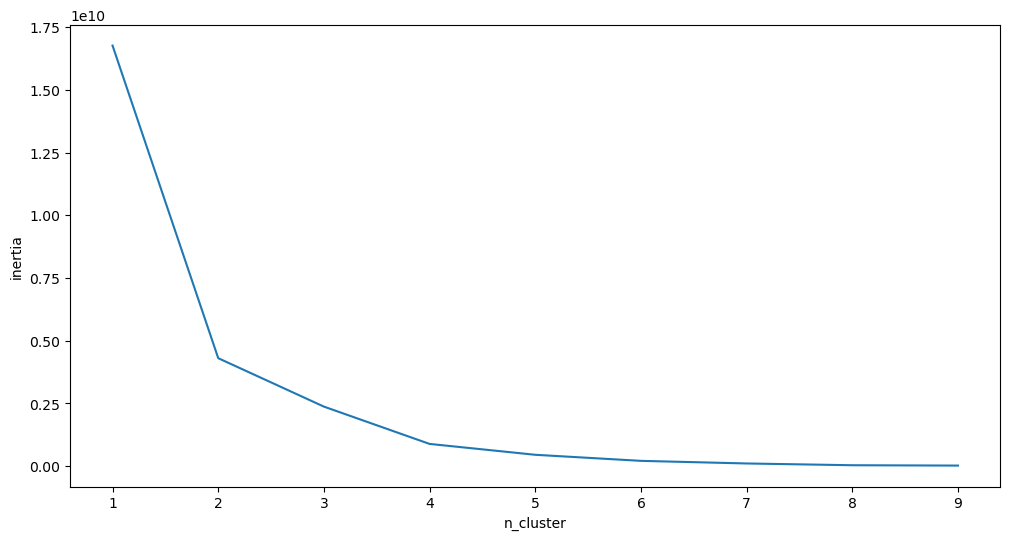

In [79]:
my_kmeans_coude(df_sans_scaling_sans_outliers)

### Silhouette

Le nombre optimal de cluster est : 2


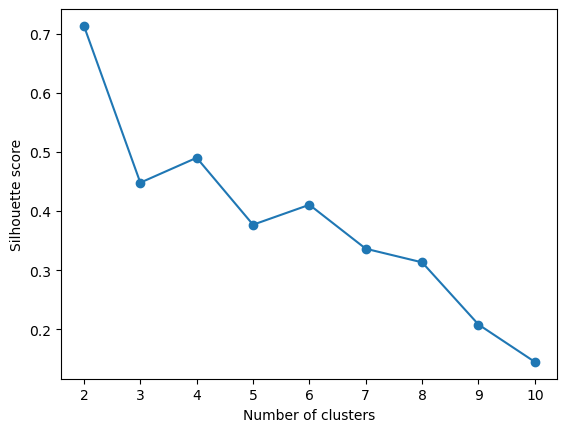

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [80]:
my_silhouette_method(df_sans_scaling_sans_outliers, 10)

In [81]:
df_sans_scaling_sans_outliers

Alimentation pour touristes  \
Zone                                                           
Antigua-et-Barbuda                                       2.0   
Cabo Verde                                               0.0   
Chypre                                                   2.0   
Djibouti                                                 0.0   
Madagascar                                               0.0   
Malte                                                    0.0   
Maurice                                                  1.0   
Saint-Kitts-et-Nevis                                     1.0   
Saint-Vincent-et-les Grenadines                          0.0   
Sainte-Lucie                                             0.0   
Sao Tomé-et-Principe                                    -0.0   
Sri Lanka                                                0.0   

                                 Disponibilité intérieure  \
Zone                                                        
Antigua-et-Barbuda                                    7.0   
Cabo Verde                                           10.0   
Chypre                                               38.0   
Djibouti                                              3.0   
Madagascar                                           82.0   
Malte                                                14.0   
Maurice                                              49.0   
Saint-Kitts-et-Nevis                                  4.0   
Saint-Vincent-et-les Grenadines                       8.0   
Sainte-Lucie                                         11.0   
Sao Tomé-et-Principe                                  2.0   
Sri Lanka                                           192.0   

                                 Exportations - Quantité  \
Zone                                                       
Antigua-et-Barbuda                                   0.0   
Cabo Verde                                           0.0   
Chypre                                               1.0   
Djibouti                                             0.0   
Madagascar                                           0.0   
Malte                                                0.0   
Maurice                                              0.0   
Saint-Kitts-et-Nevis                                 0.0   
Saint-Vincent-et-les Grenadines                      0.0   
Sainte-Lucie                                         0.0   
Sao Tomé-et-Principe                                 0.0   
Sri Lanka                                            2.0   

                                 Importations - Quantité  Nourriture  Pertes  \
Zone                                                                           
Antigua-et-Barbuda                                   7.0         5.0     0.0   
Cabo Verde                                          12.0         9.0     0.0   
Chypre                                              14.0        30.0     1.0   
Djibouti                                             3.0         3.0     0.0   
Madagascar                                           0.0        73.0     2.0   
Malte                                                9.0        12.0     0.0   
Maurice                                              2.0        48.0     0.0   
Saint-Kitts-et-Nevis                                 4.0         3.0     0.0   
Saint-Vincent-et-les Grenadines                      9.0         8.0     0.0   
Sainte-Lucie                                        10.0        10.0     0.0   
Sao Tomé-et-Principe                                 2.0         2.0     0.0   
Sri Lanka                                            0.0       164.0    10.0   

                                 Production  Résidus  Variation de stock  \
Zone                                                                       
Antigua-et-Barbuda                      0.0      0.0                 0.0   
Cabo Verde                              1.0      0.0                 4.0   
Chypre         

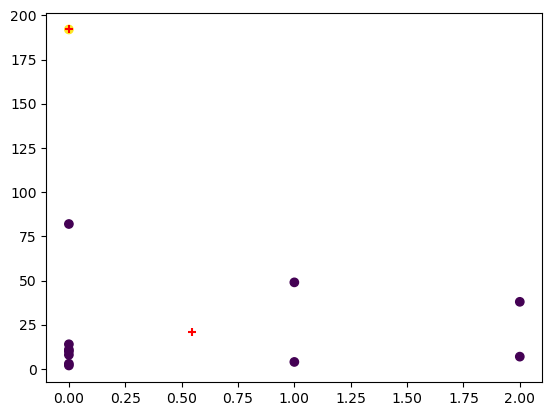

In [82]:
my_kmeans(df_sans_scaling_sans_outliers, 2, graphique=False)

### Boxplot par groupe

<AxesSubplot:xlabel='cluster', ylabel="Coût des aliments d'origine animale">

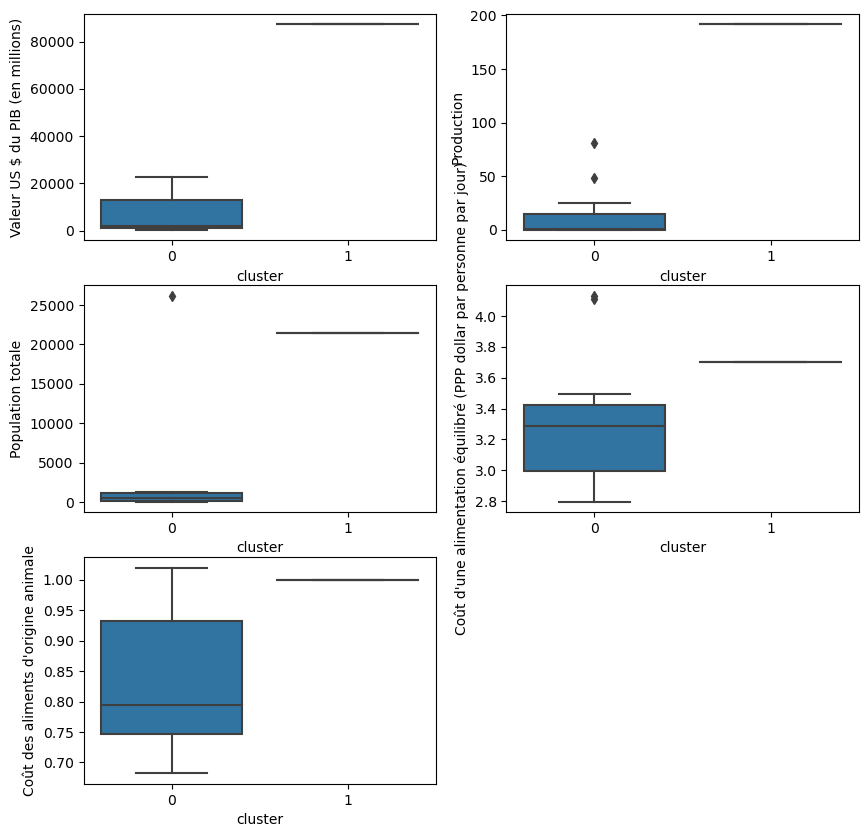

In [83]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Valeur US $ du PIB (en millions)")

plt.subplot(322)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Production")

plt.subplot(323)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Population totale")

plt.subplot(324)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Coût d'une alimentation équilibré (PPP dollar par personne par jour)")

plt.subplot(325)
sns.boxplot(data=df_sans_scaling_sans_outliers, x="cluster", y="Coût des aliments d'origine animale")

### ACP

Explained Variance Ratio : [ 82.  96. 100. 100. 100. 100.]


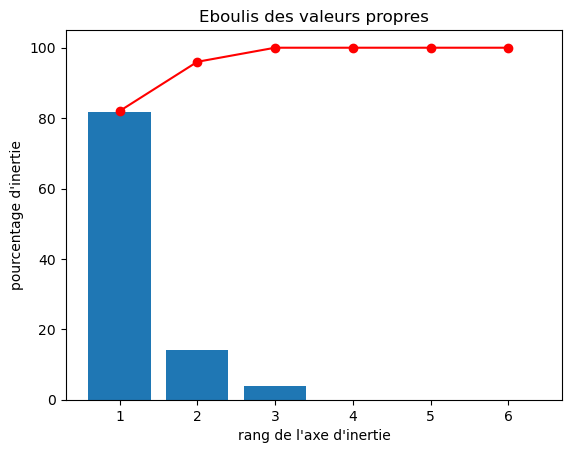

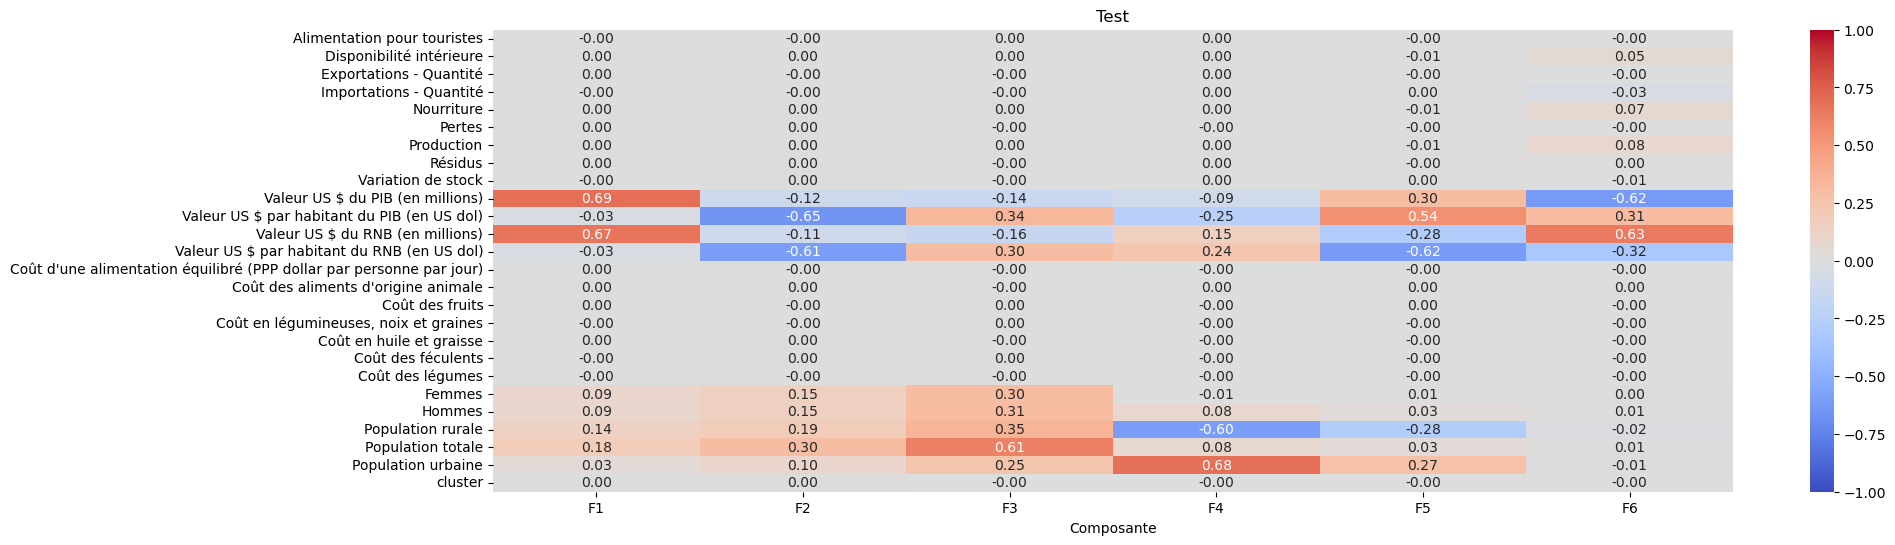

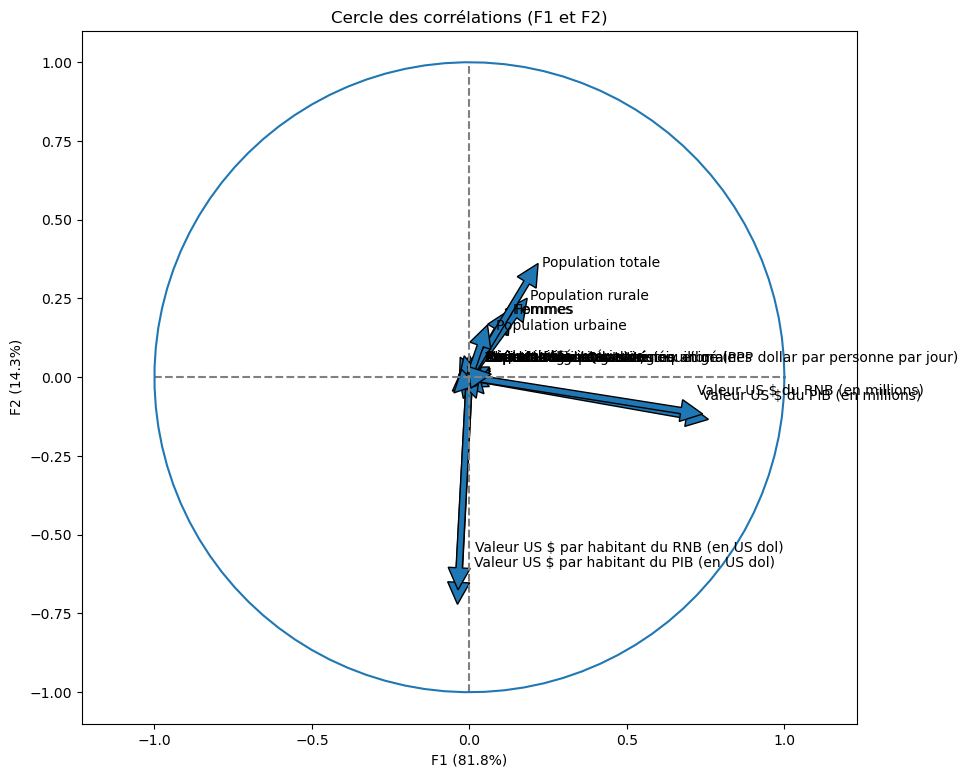

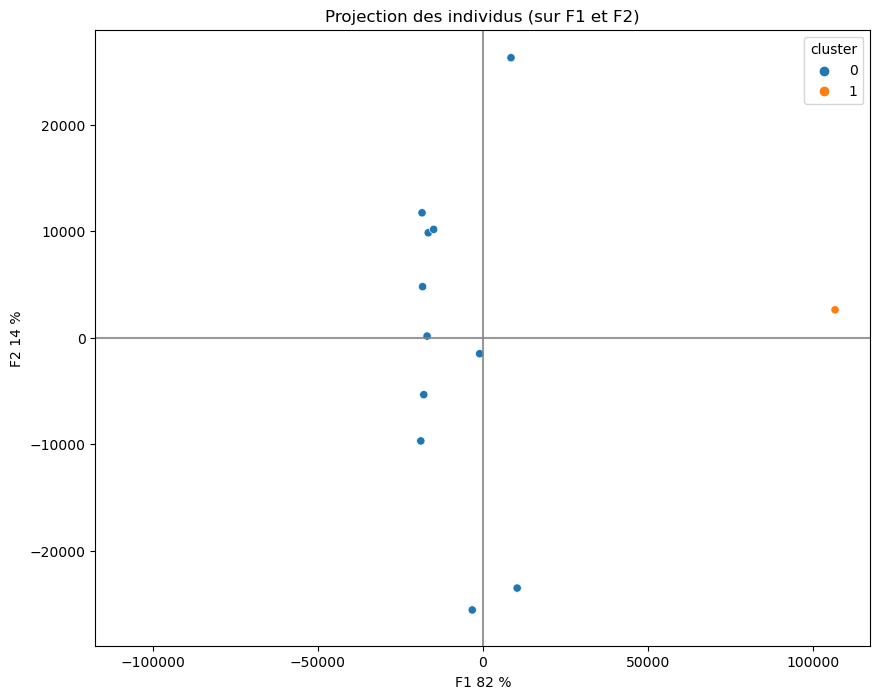

In [84]:
my_pca_proj(df_sans_scaling_sans_outliers, 6, (0,1), clusters=df_sans_scaling_sans_outliers["cluster"])

## Avec Scaling, avec ouliers

In [85]:
df

Alimentation pour touristes  \
Zone                                                           
Antigua-et-Barbuda                                  2.334869   
Bolivie (État plurinational de)                    -0.538816   
Cabo Verde                                         -0.538816   
Chypre                                              2.334869   
Djibouti                                           -0.538816   
Haïti                                              -0.538816   
Israël                                             -0.538816   
Madagascar                                         -0.538816   
Malte                                              -0.538816   
Maurice                                             0.898027   
Oman                                               -0.538816   
Saint-Kitts-et-Nevis                                0.898027   
Saint-Vincent-et-les Grenadines                    -0.538816   
Sainte-Lucie                                       -0.538816   
Sao Tomé-et-Principe                               -0.538816   
Sri Lanka                                          -0.538816   

                                 Disponibilité intérieure  \
Zone                                                        
Antigua-et-Barbuda                              -0.572450   
Bolivie (État plurinational de)                  1.866151   
Cabo Verde                                      -0.555114   
Chypre                                          -0.393311   
Djibouti                                        -0.595565   
Haïti                                           -0.046591   
Israël                                           3.062337   
Madagascar                                      -0.139049   
Malte                                           -0.531999   
Maurice                                         -0.329746   
Oman                                             0.045868   
Saint-Kitts-et-Nevis                            -0.589786   
Saint-Vincent-et-les Grenadines                 -0.566671   
Sainte-Lucie                                    -0.549335   
Sao Tomé-et-Principe                            -0.601343   
Sri Lanka                                        0.496605   

                                 Exportations - Quantité  \
Zone                                                       
Antigua-et-Barbuda                             -0.372766   
Bolivie (État plurinational de)                -0.113451   
Cabo Verde                                     -0.372766   
Chypre                                         -0.113451   
Djibouti                                       -0.372766   
Haïti                                          -0.372766   
Israël                                          0.405181   
Madagascar                                     -0.372766   
Malte                                          -0.372766   
Maurice                                        -0.372766   
Oman                                            3.776283   
Saint-Kitts-et-Nevis                           -0.372766   
Saint-Vincent-et-les Grenadines                -0.372766   
Sainte-Lucie                                   -0.372766   
Sao Tomé-et-Principe                           -0.372766   
Sri Lanka                                       0.145865   

                                 Importations - Quantité  Nourriture  \
Zone                                                                   
Antigua-et-Barbuda                             -0.316735   -0.584593   
Bolivie (État plurinational de)                -0.489500    1.991663   
Cabo Verde                                     -0.172765   -0.558701   
Chypre                                         -0.115176   -0.422768   
Djibouti                                       -0.431912   -0.597539   
Haïti                                           2.044383    0.017396   
Israël                                         -0.518294    2.982033   
Madagascar                                     -0.51

### K-Means

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

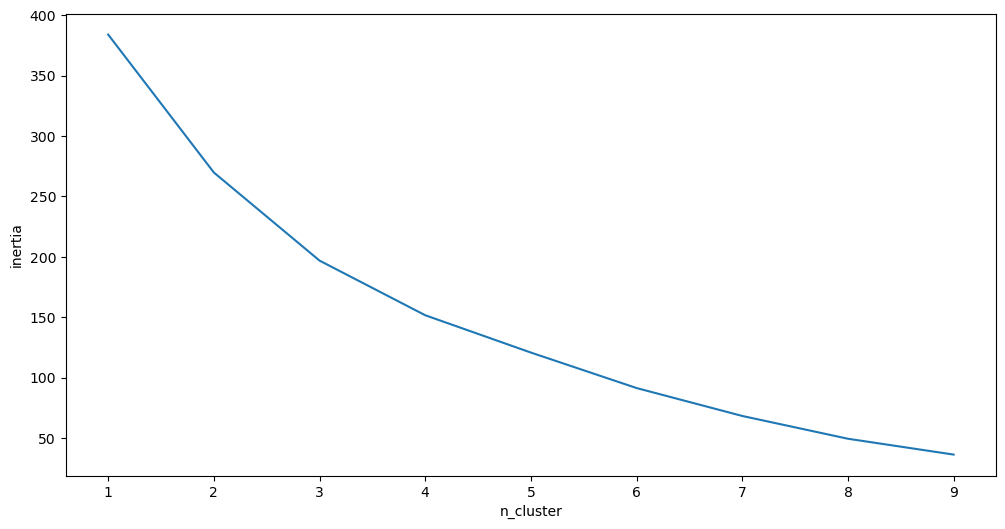

In [86]:
my_kmeans_coude(df)

### Silhouette

Le nombre optimal de cluster est : 3


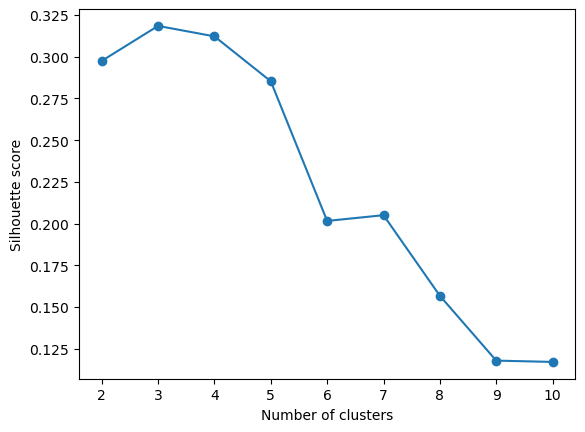

KMeans(max_iter=100, n_clusters=3, random_state=42)

In [87]:
my_silhouette_method(df, 10)

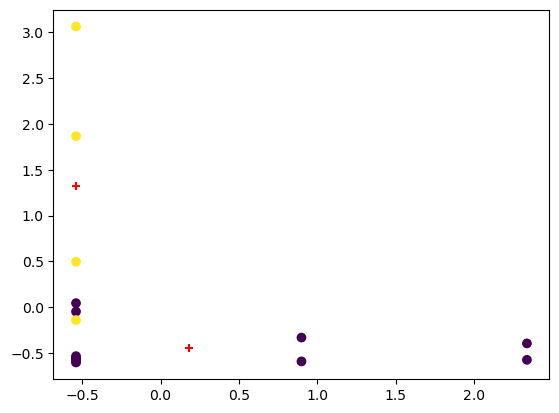

In [88]:
my_kmeans(df, 2)

### Boxplot par groupe

<AxesSubplot:xlabel='cluster', ylabel="Coût des aliments d'origine animale">

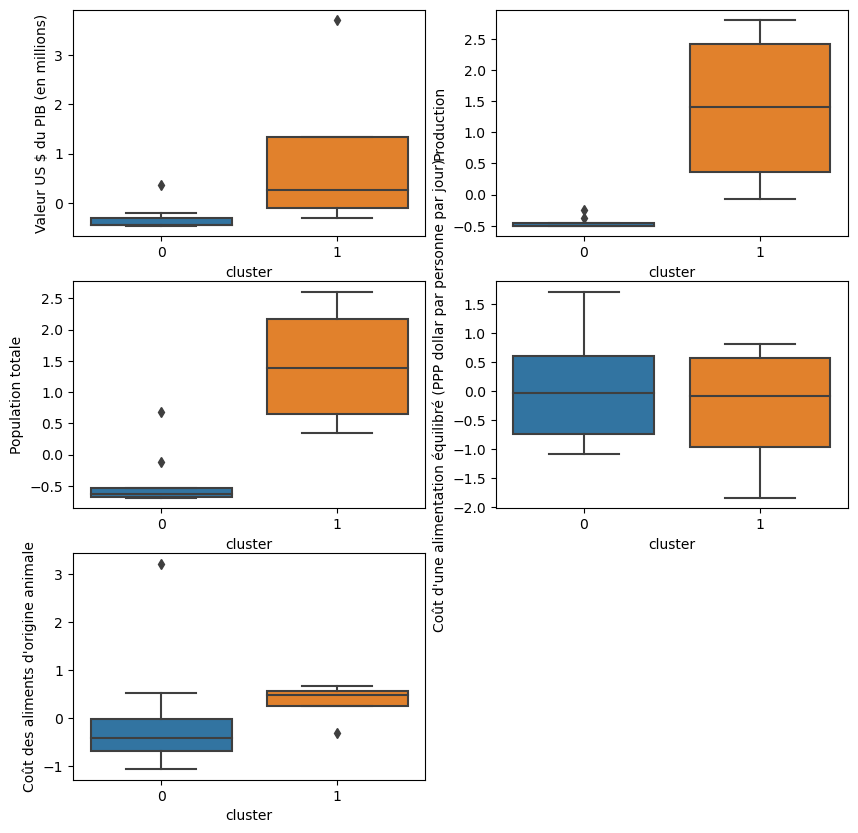

In [89]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.boxplot(data=df, x="cluster", y="Valeur US $ du PIB (en millions)")

plt.subplot(322)
sns.boxplot(data=df, x="cluster", y="Production")

plt.subplot(323)
sns.boxplot(data=df, x="cluster", y="Population totale")

plt.subplot(324)
sns.boxplot(data=df, x="cluster", y="Coût d'une alimentation équilibré (PPP dollar par personne par jour)")

plt.subplot(325)
sns.boxplot(data=df, x="cluster", y="Coût des aliments d'origine animale")

### ACP

Explained Variance Ratio : [34. 58. 70. 80. 86. 90.]


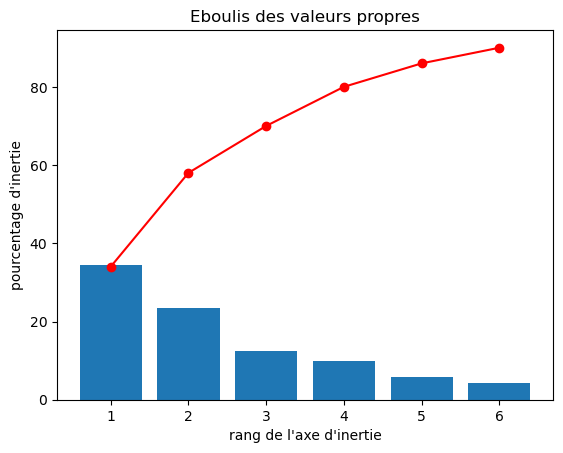

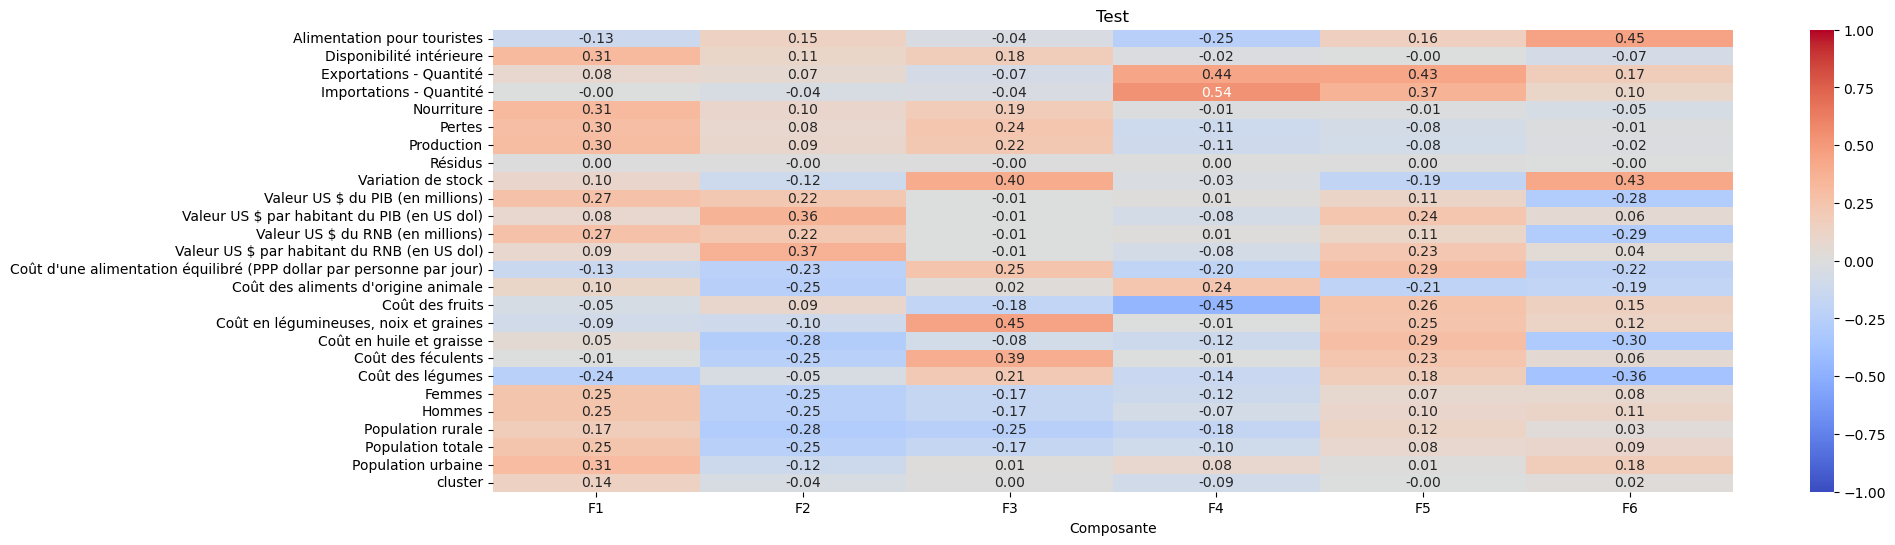

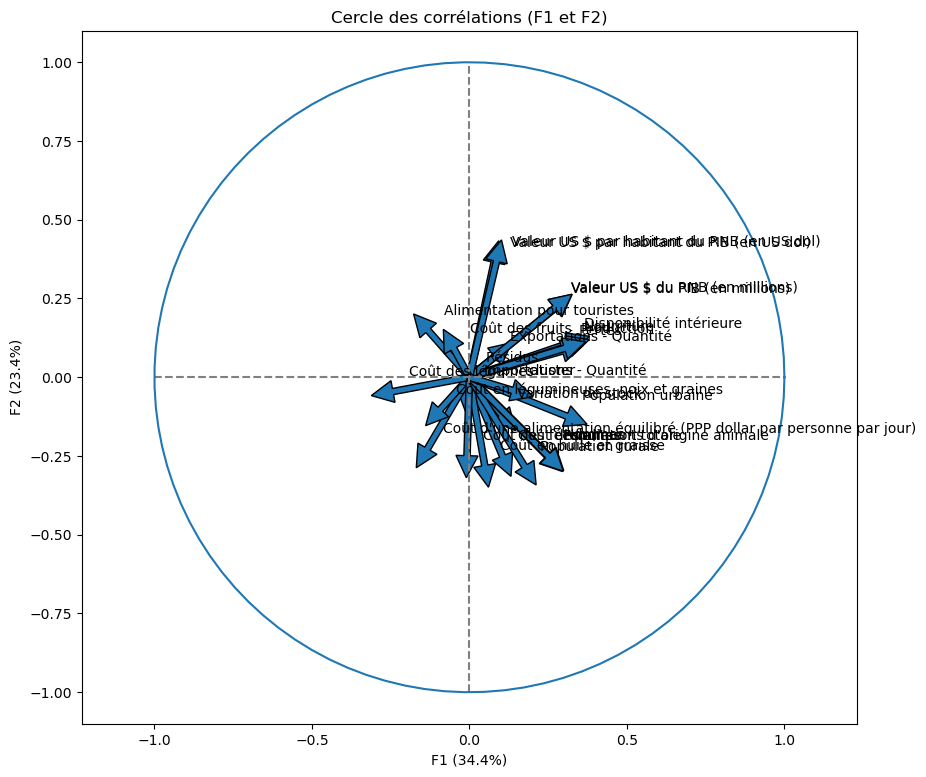

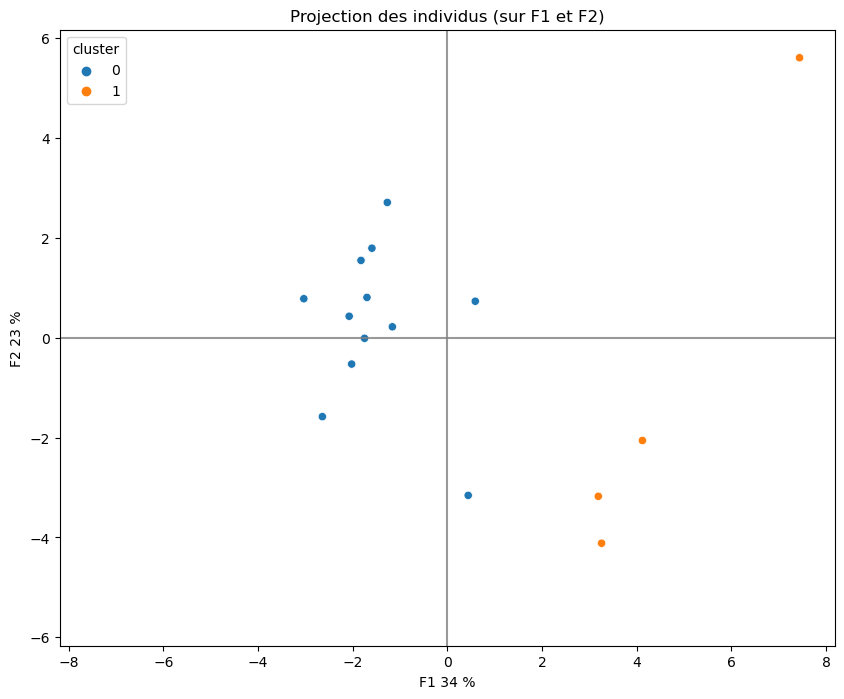

In [90]:
my_pca_proj(df, 6, (0,1), clusters=df["cluster"])

## Sans Scaling, Avec Ouliers

In [91]:
df_sans_scale

Alimentation pour touristes  \
Zone                                                           
Antigua-et-Barbuda                                       2.0   
Bolivie (État plurinational de)                          0.0   
Cabo Verde                                               0.0   
Chypre                                                   2.0   
Djibouti                                                 0.0   
Haïti                                                    0.0   
Israël                                                   0.0   
Madagascar                                               0.0   
Malte                                                    0.0   
Maurice                                                  1.0   
Oman                                                     0.0   
Saint-Kitts-et-Nevis                                     1.0   
Saint-Vincent-et-les Grenadines                          0.0   
Sainte-Lucie                                             0.0   
Sao Tomé-et-Principe                                    -0.0   
Sri Lanka                                                0.0   

                                 Disponibilité intérieure  \
Zone                                                        
Antigua-et-Barbuda                                    7.0   
Bolivie (État plurinational de)                     429.0   
Cabo Verde                                           10.0   
Chypre                                               38.0   
Djibouti                                              3.0   
Haïti                                                98.0   
Israël                                              636.0   
Madagascar                                           82.0   
Malte                                                14.0   
Maurice                                              49.0   
Oman                                                114.0   
Saint-Kitts-et-Nevis                                  4.0   
Saint-Vincent-et-les Grenadines                       8.0   
Sainte-Lucie                                         11.0   
Sao Tomé-et-Principe                                  2.0   
Sri Lanka                                           192.0   

                                 Exportations - Quantité  \
Zone                                                       
Antigua-et-Barbuda                                   0.0   
Bolivie (État plurinational de)                      1.0   
Cabo Verde                                           0.0   
Chypre                                               1.0   
Djibouti                                             0.0   
Haïti                                                0.0   
Israël                                               3.0   
Madagascar                                           0.0   
Malte                                                0.0   
Maurice                                              0.0   
Oman                                                16.0   
Saint-Kitts-et-Nevis                                 0.0   
Saint-Vincent-et-les Grenadines                      0.0   
Sainte-Lucie                                         0.0   
Sao Tomé-et-Principe                                 0.0   
Sri Lanka                                            2.0   

                                 Importations - Quantité  Nourriture  Pertes  \
Zone                                                                           
Antigua-et-Barbuda                                   7.0         5.0     0.0   
Bolivie (État plurinational de)                      1.0       403.0    27.0   
Cabo Verde                                          12.0         9.0     0.0   
Chypre                                              14.0        30.0     1.0   
Djibouti                                             3.0         3.0     0.0   
Haïti                                               89.0        98.0     0.0   
Israël                                               0.0    

### K-Means

D'après la méthode du coude, le nombre de cluster optimal est : 2


2

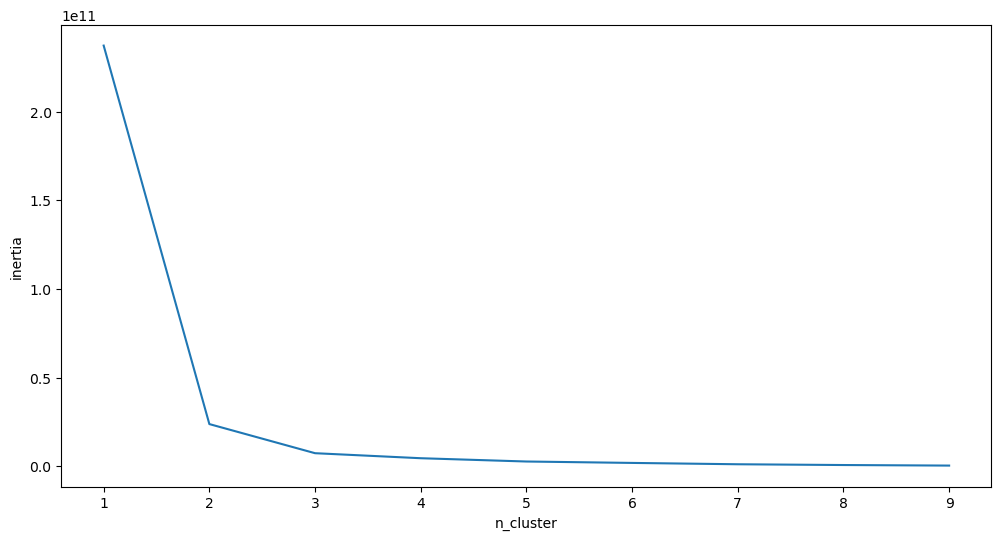

In [92]:
my_kmeans_coude(df_sans_scale)

### Silhouette

Le nombre optimal de cluster est : 2


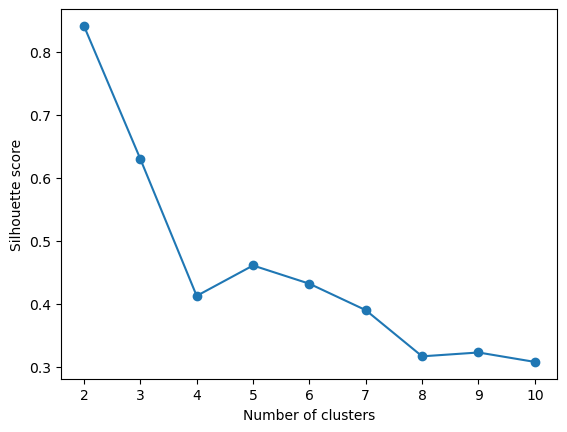

KMeans(max_iter=100, n_clusters=2, random_state=42)

In [93]:
my_silhouette_method(df_sans_scale, 10)

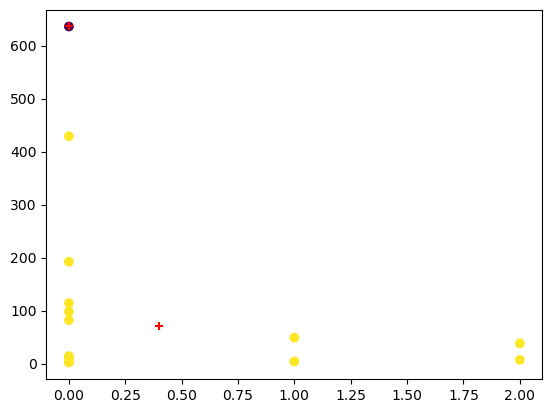

In [94]:
my_kmeans(df_sans_scale, 2)

### Boxplot par groupe

<AxesSubplot:xlabel='cluster', ylabel="Coût des aliments d'origine animale">

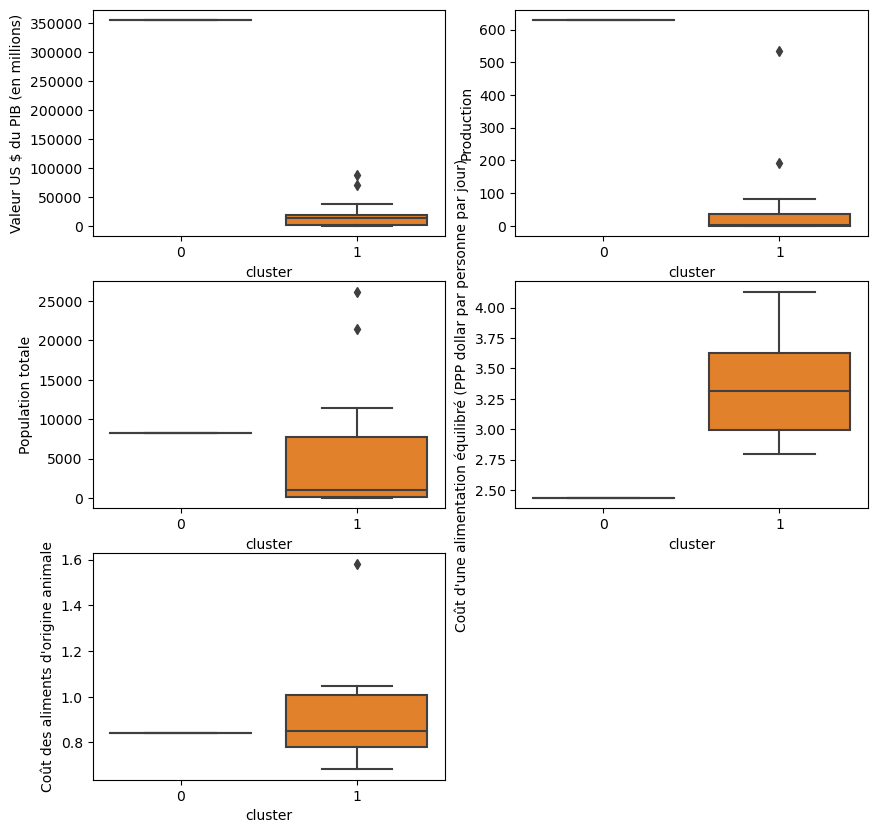

In [95]:
plt.figure(figsize=(10,10))

plt.subplot(321)
sns.boxplot(data=df_sans_scale, x="cluster", y="Valeur US $ du PIB (en millions)")

plt.subplot(322)
sns.boxplot(data=df_sans_scale, x="cluster", y="Production")

plt.subplot(323)
sns.boxplot(data=df_sans_scale, x="cluster", y="Population totale")

plt.subplot(324)
sns.boxplot(data=df_sans_scale, x="cluster", y="Coût d'une alimentation équilibré (PPP dollar par personne par jour)")

plt.subplot(325)
sns.boxplot(data=df_sans_scale, x="cluster", y="Coût des aliments d'origine animale")

### ACP

Explained Variance Ratio : [ 98. 100. 100. 100. 100. 100.]


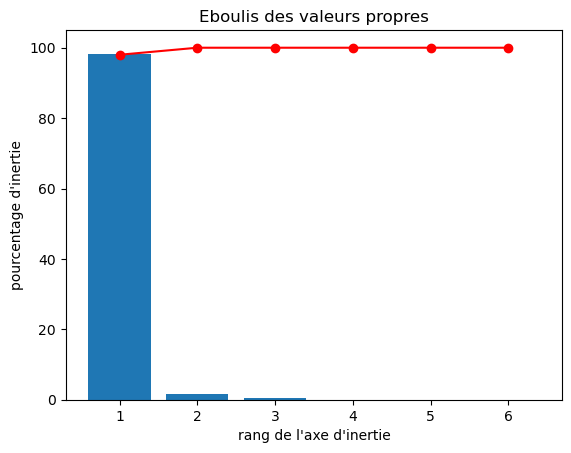

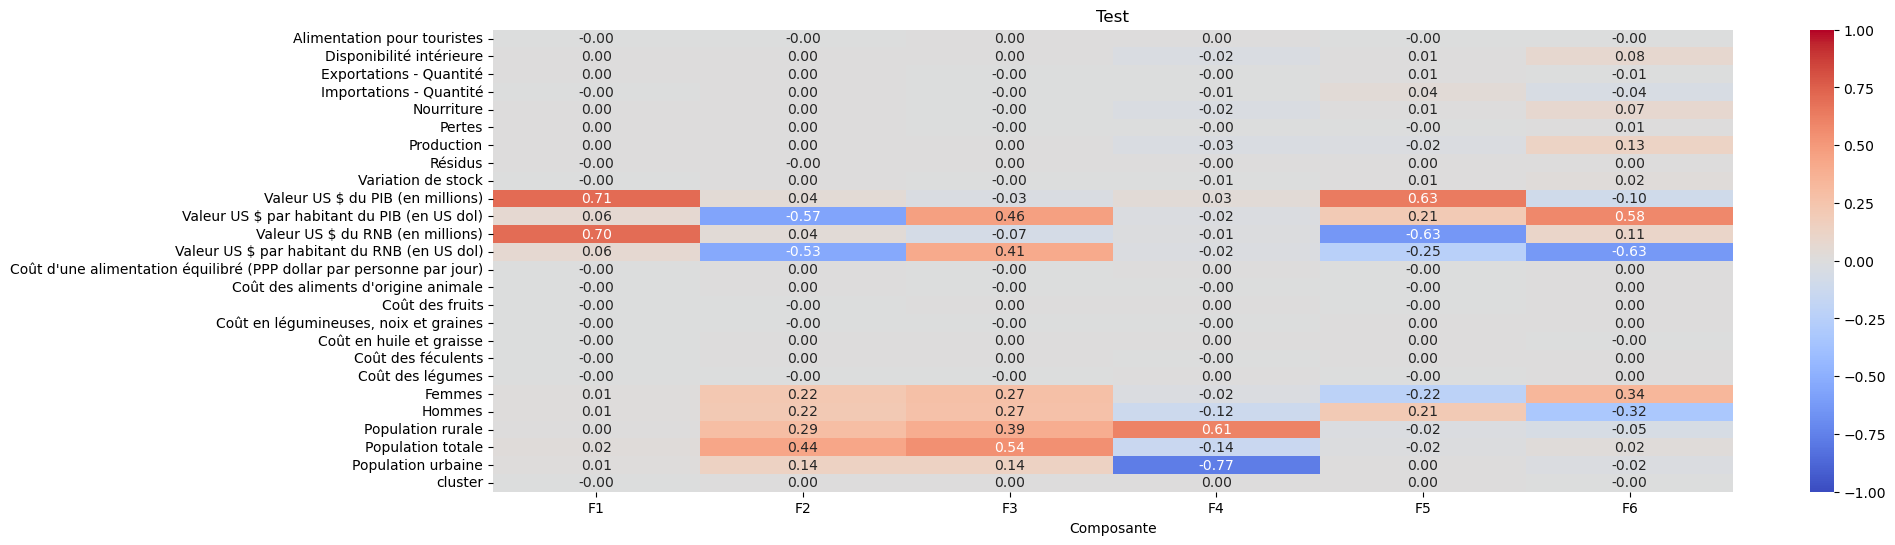

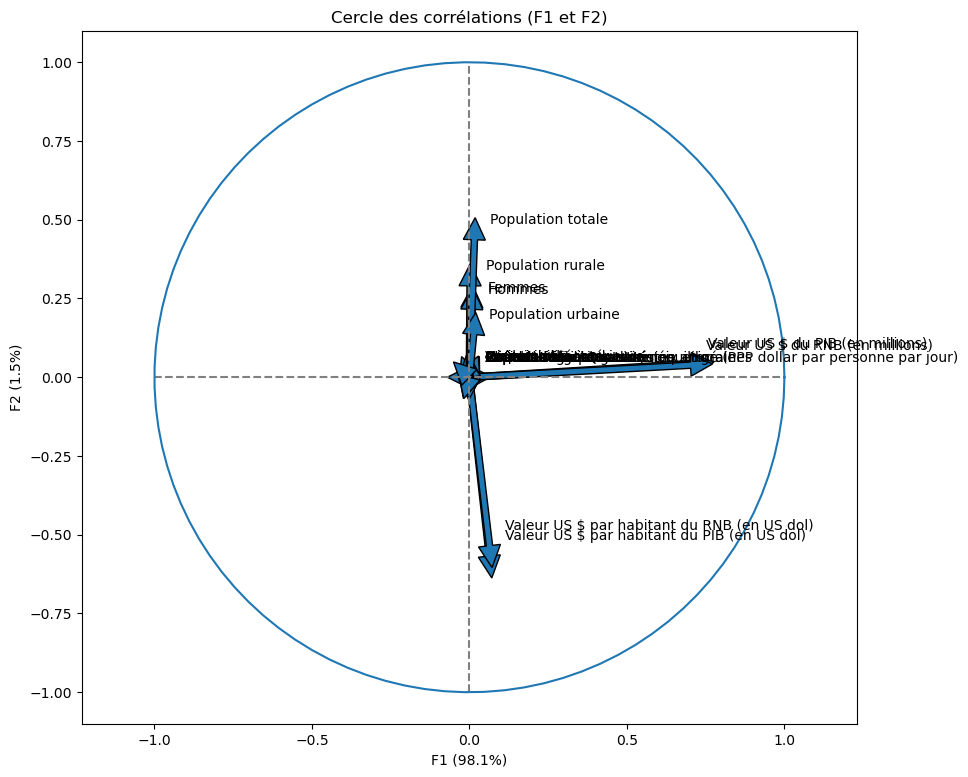

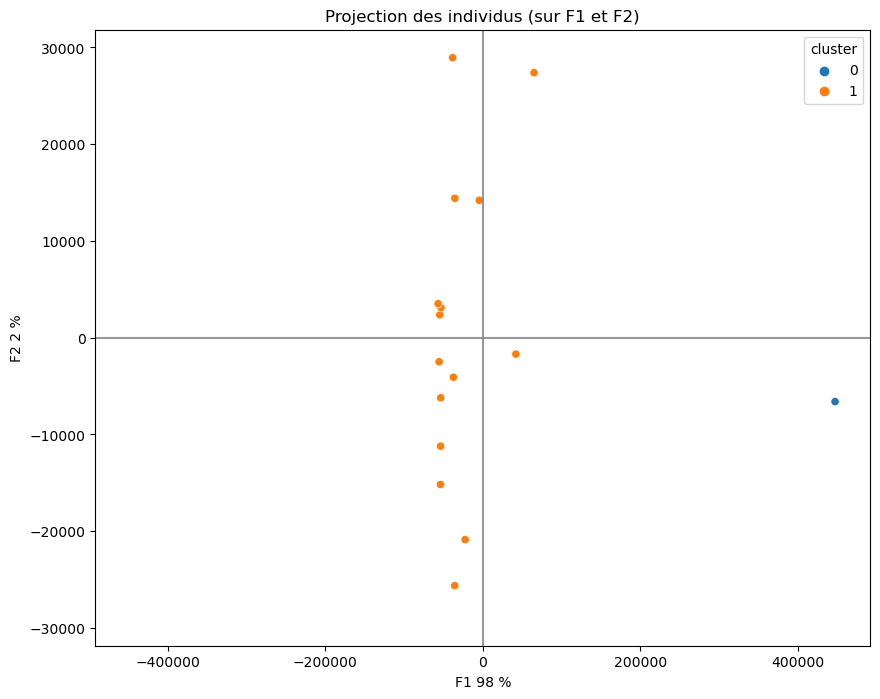

In [96]:
my_pca_proj(df_sans_scale, 6, (0,1), clusters=df_sans_scale["cluster"])

Cluster 1: ['Antigua-et-Barbuda', 'Cabo Verde', 'Chypre', 'Djibouti', 'Malte', 'Maurice', 'Saint-Kitts-et-Nevis', 'Sainte-Lucie', 'Sao Tomé-et-Principe']
Cluster 2: ['Haïti', 'Oman', 'Saint-Vincent-et-les Grenadines']
Cluster 3: ['Madagascar', 'Sri Lanka']
Cluster 4: ['Bolivie (État plurinational de)']
Cluster 5: ['Israël']


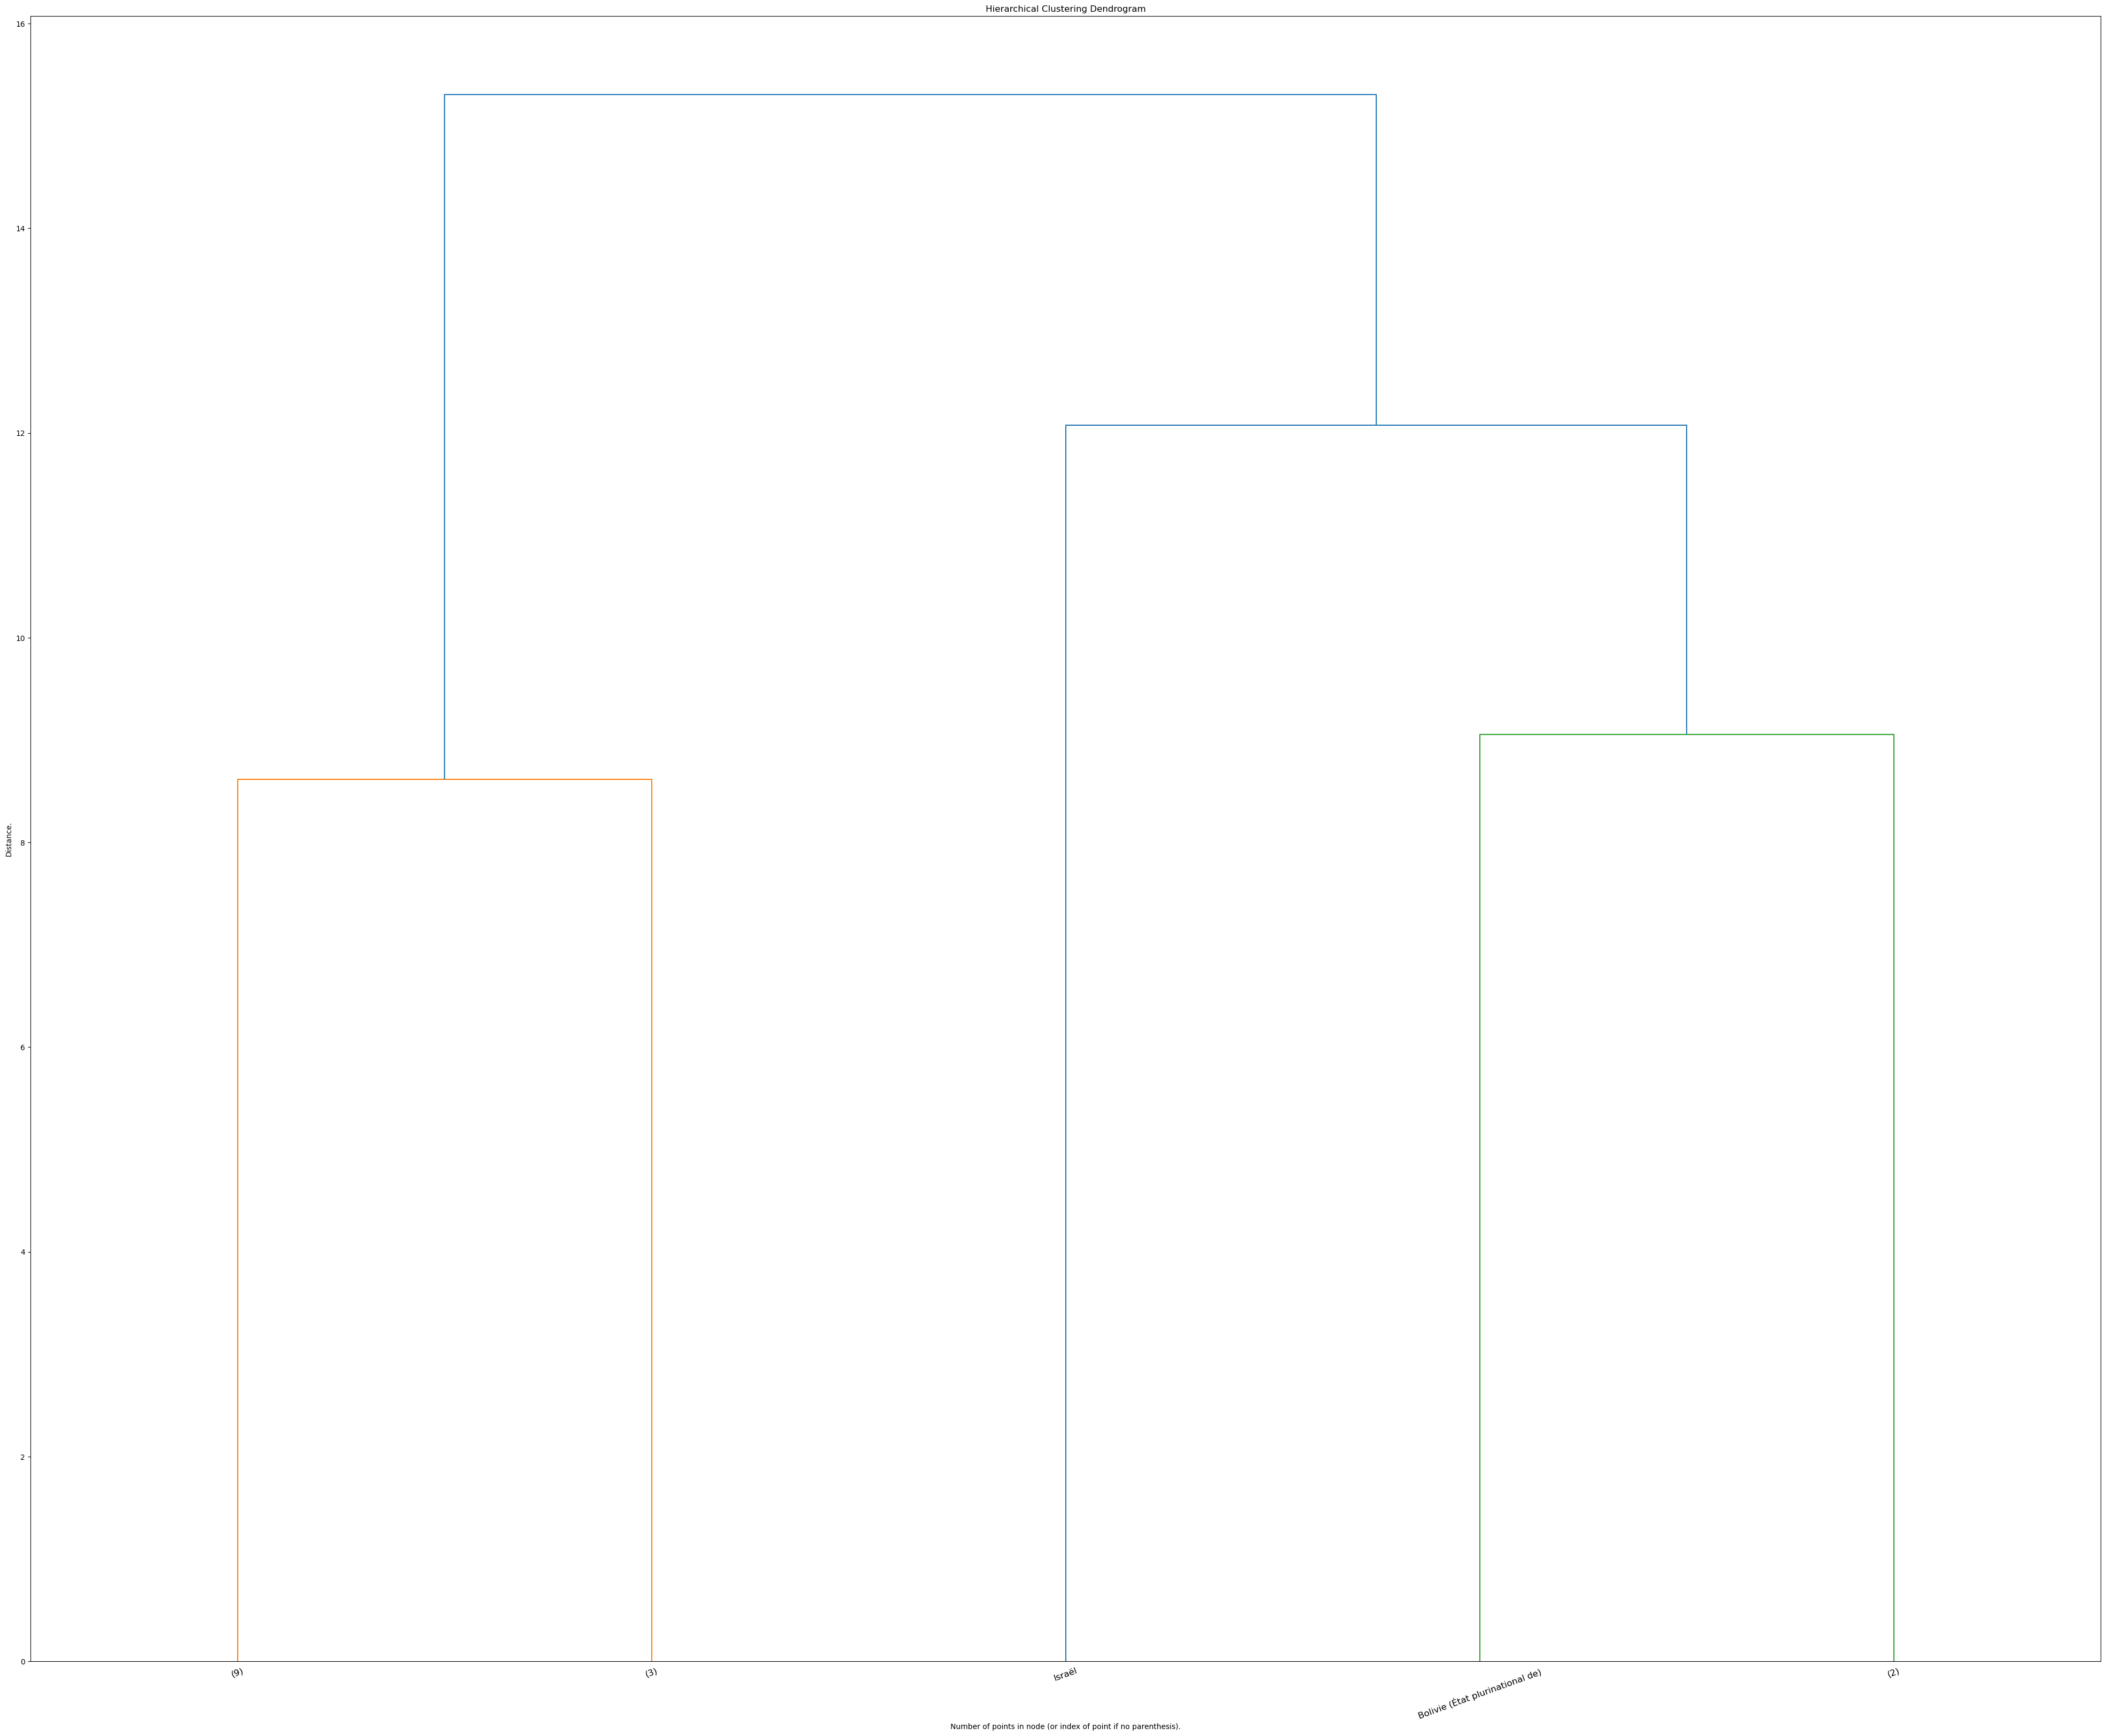

In [97]:
my_dendrogram(df,5)